# Instalaciones

In [1]:
#!pip install pyodbc

In [2]:
#!pip install sodapy

In [3]:
#!pip install imblearn

In [4]:
#!pip install -U scikit-learn

In [5]:
#pip install --upgrade scikit-learn

In [6]:
#conda update scikit-learn

# Librerias

In [3]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sodapy import Socrata
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers.core import Dense
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, RocCurveDisplay
from keras.wrappers.scikit_learn import KerasClassifier
import numpy
from sklearn.model_selection import RandomizedSearchCV, KFold
from keras.layers.core import Dropout
from keras.callbacks import EarlyStopping


# Conexión/desconexión Base de Datos SQL Server

In [8]:
def iniciarSesion():
    server = 'tcp:Miadgpproyectofinal.database.windows.net' 
    database = 'DB_GP_PROYECTO' 
    username = 'admin_miad' 
    password = 'Abc123456789' 
    
    cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
    cursor = cnxn.cursor()
    
    return cnxn, cursor

In [9]:
def cerrarCursor(cursor):
    try:
        cursor.close()
    except:
        pass

In [10]:
# 1. Se inicia la conexion con la base de datos
cnxn, cursor = iniciarSesion()

# 2. Se cierra el cursor
#cerrarCursor(cursor)

# Lectura de datos completa

In [11]:
sql = """
SELECT *
FROM Prod_SabanaAnalitica
"""

In [12]:
df = pd.read_sql(sql,cnxn)
df

,Pro_Entidad,Pro_Nit Entidad,Pro_Departamento Entidad,Pro_Ciudad Entidad,Pro_OrdenEntidad,Pro_Entidad Centralizada,Pro_ID del Proceso,Pro_Referencia del Proceso,Pro_PCI,Pro_ID del Portafolio,...,Con_Valor Pendiente de Pago,Con_Valor Pagado,Con_Valor Amortizado,Con_Valor Pendiente de Amortizacion,Con_Valor Pendiente de Ejecucion,Con_Dias Adicionados,Con_Fecha Inicio Liquidacion,Con_Fecha Fin Liquidacion,Cat_Extraccion,FueMultado
0,811021743,811021743,Antioquia,Medellín,Territorial,No,CO1.REQ.3314776,1127,ND,CO1.BDOS.3228167,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,Cruce Directo ProcesoContrato,None
1,811021743,811021743,Antioquia,Medellín,Territorial,No,CO1.REQ.3613724,1129,ND,CO1.BDOS.3520939,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,Cruce Directo ProcesoContrato,None
2,811021743,811021743,Antioquia,Medellín,Territorial,No,CO1.REQ.4355856,1139,ND,CO1.BDOS.4256735,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,Cruce Directo ProcesoContrato,None
3,ACUEDUCTO METROPOLITANO DE BUCARAMANGA SA ESP,8902001622,No Definido,No Definido,Territorial,Si,CO1.REQ.3648589,CO249-2022,ND,CO1.BDOS.3555063,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,Cruce Directo ProcesoContrato,None
4,ACUEDUCTO METROPOLITANO DE BUCARAMANGA SA ESP,8902001622,No Definido,No Definido,Territorial,Si,CO1.REQ.3775787,CO 293-22,ND,CO1.BDOS.3679782,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,Cruce Directo ProcesoContrato,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46957,Universidad del Atlántico,890102257,Atlántico,Puerto Colombia,Nacional,Descentralizada,No Aplica,No Aplica,No Aplica,No Aplica,...,89804819.0,0.0,0.0,44902409.0,89804819.0,0.0,2023-04-30,2023-06-01,Inconsistencias de Proveedores,None
46958,Universidad del Atlántico,890102257,Atlántico,Puerto Colombia,Nacional,Descentralizada,No Aplica,No Aplica,No Aplica,No Aplica,...,227762890.0,0.0,0.0,113881445.0,227762890.0,0.0,2023-04-30,2023-05-31,Inconsistencias de Proveedores,None
46959,Universidad del Atlántico,890102257,Atlántico,Puerto Colombia,Nacional,Descentralizada,No Aplica,No Aplica,No Aplica,No Aplica,...,99890065.0,0.0,0.0,49945032.0,99890065.0,0.0,2022-04-30,2022-05-31,Inconsistencias de Proveedores,None
46960,Universidad del Atlántico,890102257,Atlántico,Puerto Colombia,Nacional,Descentralizada,No Aplica,No Aplica,No Aplica,No Aplica,...,299447468.0,0.0,0.0,0.0,299447468.0,0.0,2023-05-01,2023-06-01,Inconsistencias de Proveedores,None


In [4]:
df = pd.read_csv('sabana_completa.csv')

In [5]:
num_filas = df.shape[0]
num_columnas = df.shape[1]
print("El DataFrame tiene", num_filas, "filas y", num_columnas, "columnas.")

El DataFrame tiene 46962 filas y 80 columnas.


# Análisis descriptivo

## Valores Nulos

In [6]:
print("El DataFrame tiene", len(df),"registros en total")

El DataFrame tiene 46962 registros en total


La variable FueMultado es la variable de respuesta, se reemplazaran los valores nulos por 0 para todo el análisis que se desea realizar.

In [7]:
# FueMultado es la variable de respuesta
df['FueMultado'] = df['FueMultado'].replace(np.nan, 0)

In [8]:
# Análisis de valores nulos de cada variable
filas=len(df)

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

null_values = df.isnull().sum()
null_variables = null_values[null_values > 0]
null_variables_sorted = null_variables.sort_values(ascending=False)

# Calcular el porcentaje de valores nulos
null_percentages = null_variables_sorted / filas 

# Crear un DataFrame con los resultados
null_df = pd.DataFrame({'Nulos': null_variables_sorted, 'Porcentaje': null_percentages})
num_nulos = null_df.shape[0]

null_df_filtrado = null_df[null_df['Porcentaje'] > 0.12]
num_nulos_mayor_12=null_df_filtrado.shape[0]

print("El DataFrame tiene", num_nulos, "variables con nulos de los cuales ", num_nulos_mayor_12, "tienen un porcentaje de nulos mayor al 12% \n" )
print(null_df)
num_nulos = null_df.shape[0]

El DataFrame tiene 61 variables con nulos de los cuales  30 tienen un porcentaje de nulos mayor al 12% 

                                                    Nulos  Porcentaje
Con_Fecha de Inicio de Ejecucion                    42860    0.912653
Con_Fecha de Fin de Ejecucion                       42749    0.910289
Pro_Fecha de Publicacion (Manifestacion de Inte...  41486    0.883395
Con_Fecha Fin Liquidacion                           37986    0.808867
Con_Fecha Inicio Liquidacion                        37983    0.808803
Pro_Fecha de Publicacion (Fase Borrador)            37129    0.790618
Pro_Fecha Adjudicacion                              30493    0.649312
Con_Fecha de Inicio del Contrato                    28074    0.597802
Con_Fecha de Firma                                  27970    0.595588
Con_Fecha de Fin del Contrato                       26459    0.563413
Con_Valor Pendiente de Ejecucion                    25638    0.545931
Con_Sector                                          255

Nos quedaremos únicamente con las variables que tienen un nivel de completitud mayor al 88%

In [9]:
# Calcular el porcentaje de nulos por columna en el DataFrame filtrado
porcentaje_nulos = df.isnull().mean()
df_filtered = df.loc[:, porcentaje_nulos < 0.12]
porcentaje_nulos_filtered = df_filtered.isnull().mean().sort_values(ascending=False)
print(porcentaje_nulos_filtered)

Pro_Fecha de Ultima Publicación                0.110877
Pro_Fecha de Publicacion del Proceso           0.110877
Pro_Nombre del Adjudicador                     0.109514
Pro_Respuestas al Procedimiento                0.109493
Pro_Conteo de Respuestas a Ofertas             0.109493
Pro_Proveedores Invitados                      0.109493
Pro_Proveedores con Invitacion Directa         0.109493
Pro_Visualizaciones del Procedimiento          0.109493
Pro_Proveedores que Manifestaron Interes       0.109493
Pro_Respuestas Externas                        0.109493
Pro_Proveedores Unicos con Respuestas          0.109493
Pro_Ciudad de la Unidad de Contratación        0.109493
Pro_Numero de Lotes                            0.109493
Pro_Estado del Procedimiento                   0.109493
Pro_ID Estado del Procedimiento                0.109493
Pro_Adjudicado                                 0.109493
Pro_ID Adjudicacion                            0.109493
Pro_Departamento Proveedor                     0

In [10]:
df_filtered.head(20)

,Pro_Entidad,Pro_Nit Entidad,Pro_Departamento Entidad,Pro_Ciudad Entidad,Pro_OrdenEntidad,Pro_Entidad Centralizada,Pro_ID del Proceso,Pro_Referencia del Proceso,Pro_PCI,Pro_ID del Portafolio,Pro_Nombre del Procedimiento,Pro_Fase,Pro_Fecha de Publicacion del Proceso,Pro_Fecha de Ultima Publicación,Pro_Precio Base,Pro_Modalidad de Contratacion,Pro_Justificación Modalidad de Contratación,Pro_Duracion,Pro_Unidad de Duracion,Pro_Ciudad de la Unidad de Contratación,Pro_Nombre de la Unidad de Contratación,Pro_Proveedores Invitados,Pro_Proveedores con Invitacion Directa,Pro_Visualizaciones del Procedimiento,Pro_Proveedores que Manifestaron Interes,Pro_Respuestas al Procedimiento,Pro_Respuestas Externas,Pro_Conteo de Respuestas a Ofertas,Pro_Proveedores Unicos con Respuestas,Pro_Numero de Lotes,Pro_Estado del Procedimiento,Pro_ID Estado del Procedimiento,Pro_Adjudicado,Pro_ID Adjudicacion,Pro_CodigoProveedor,Pro_Departamento Proveedor,Pro_Ciudad Proveedor,Pro_Valor Total Adjudicacion,Pro_Nombre del Adjudicador,Pro_Nombre del Proveedor Adjudicado,Pro_NIT del Proveedor Adjudicado,Pro_Codigo Principal de Categoria,Pro_Estado de Apertura del Proceso,Pro_Tipo de Contrato,Pro_Subtipo de Contrato,Pro_URLProceso,Pro_Codigo Entidad,Pro_Estado Resumen,Cat_Extraccion,FueMultado
0,811021743,811021743,Antioquia,Medellín,Territorial,No,CO1.REQ.3314776,1127,ND,CO1.BDOS.3228167,Servicios de mantenimiento reparaciones y adec...,Presentación de oferta,2022-09-02,2022-09-02,1.251162e+07,Contratación régimen especial,Regla aplicable,30.0,Dias,Medellín,PROCESOS DE CONTRATACIÓN RECTORIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Definido,50.0,No,No Adjudicado,No Adjudicado,No aplica,No aplica,0.000000e+00,No Adjudicado,No Adjudicado,No Adjudicado,V1.72101507,Abierto,Obra,No Especificado,{'url': 'https://community.secop.gov.co/Public...,718522014,Presentación de oferta,Cruce Directo ProcesoContrato,0
1,811021743,811021743,Antioquia,Medellín,Territorial,No,CO1.REQ.3613724,1129,ND,CO1.BDOS.3520939,Adecuaciones y arreglos en las instalaciones d...,Presentación de oferta,2022-11-15,2022-11-15,1.278438e+07,Contratación régimen especial,Regla aplicable,14.0,Dias,Medellín,PROCESOS DE CONTRATACIÓN RECTORIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Definido,50.0,No,No Adjudicado,No Adjudicado,No aplica,No aplica,0.000000e+00,No Adjudicado,No Adjudicado,No Adjudicado,V1.72101510,Abierto,Obra,No Especificado,{'url': 'https://community.secop.gov.co/Public...,718522014,Presentación de oferta,Cruce Directo ProcesoContrato,0
2,811021743,811021743,Antioquia,Medellín,Territorial,No,CO1.REQ.4355856,1139,ND,CO1.BDOS.4256735,Adecuaciones y arreglos en las instalaciones d...,Presentación de oferta,2023-04-04,2023-04-03,1.117430e+07,Contratación régimen especial,Regla aplicable,20.0,Dias,Medellín,PROCESOS DE CONTRATACIÓN RECTORIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Definido,50.0,No,No Adjudicado,No Adjudicado,No aplica,No aplica,0.000000e+00,No Adjudicado,No Adjudicado,No Adjudicado,V1.72151900,Abierto,Obra,No Especificado,{'url': 'https://community.secop.gov.co/Public...,718522014,Presentación de oferta,Cruce Directo ProcesoContrato,0
3,ACUEDUCTO METROPOLITANO DE BUCARAMANGA SA ESP,8902001622,No Definido,No Definido,Territorial,Si,CO1.REQ.3648589,CO249-2022,ND,CO1.BDOS.3555063,construcción de cerramiento perimetral planta ...,Presentación de oferta,2022-11-23,2022-11-23,7.544925e+08,Contratación régimen especial,Regla aplicable,4.0,Meses,Bucaramanga,Contratación,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Definido,50.0,No,No Adjudicado,No Adjudicado,No aplica,No aplica,0.000000e+00,No Adjudicado,No Adjudicado,No Adjudicado,V1.72151900,Abierto,Obra,No Especificado,{'url': 'https://community.secop.gov.co/Public...,718348683,Presentación de oferta,Cruce Directo ProcesoContrato,0
4,ACUEDUCTO METROPOLITANO DE BUCARAMANGA SA ESP,8902001622,No Definido,No Definido,Territorial,Si,CO1.REQ.3775787,CO 293-22,ND,CO1.BDOS.3679782,CONSTRUCCION DE ACOMETIDAS DOMICILIARIAS A NUE...,Presentación de ofert

In [11]:
print(df_filtered.dtypes)

Pro_Entidad                                     object
Pro_Nit Entidad                                  int64
Pro_Departamento Entidad                        object
Pro_Ciudad Entidad                              object
Pro_OrdenEntidad                                object
Pro_Entidad Centralizada                        object
Pro_ID del Proceso                              object
Pro_Referencia del Proceso                      object
Pro_PCI                                         object
Pro_ID del Portafolio                           object
Pro_Nombre del Procedimiento                    object
Pro_Fase                                        object
Pro_Fecha de Publicacion del Proceso            object
Pro_Fecha de Ultima Publicación                 object
Pro_Precio Base                                float64
Pro_Modalidad de Contratacion                   object
Pro_Justificación Modalidad de Contratación     object
Pro_Duracion                                   float64
Pro_Unidad

Revisaremos cómo va quedanodo nuestra base

In [12]:
num_filas = df_filtered.shape[0]
num_columnas = df_filtered.shape[1]
print("El DataFrame tiene", num_filas, "filas y", num_columnas, "columnas.")

El DataFrame tiene 46962 filas y 50 columnas.


de las 88 columnas iniciales,no quedamos ahora con 50 columnas que cumplen el porcentaje de completutud deseado. Ahora procedemos a hacer un análisis descriptivo y estadístico de las variables numericas.

## Análisis descriptivo variables numéricas

In [13]:
# Análisis de estadísticas para variables numéricas
numeric_variables = df_filtered.select_dtypes(include=['int64', 'float64'])
numeric_statistics = numeric_variables.describe()
numeric_statistics

,Pro_Nit Entidad,Pro_Precio Base,Pro_Duracion,Pro_Proveedores Invitados,Pro_Proveedores con Invitacion Directa,Pro_Visualizaciones del Procedimiento,Pro_Proveedores que Manifestaron Interes,Pro_Respuestas al Procedimiento,Pro_Respuestas Externas,Pro_Conteo de Respuestas a Ofertas,Pro_Proveedores Unicos con Respuestas,Pro_Numero de Lotes,Pro_ID Estado del Procedimiento,Pro_Valor Total Adjudicacion,Pro_Codigo Entidad
count,4.696200e+04,4.182000e+04,41820.000000,41820.000000,41820.000000,41820.0,41820.0,41820.000000,41820.000000,41820.0,41820.000000,41820.000000,41820.000000,4.182000e+04,4.696200e+04
mean,1.200189e+09,7.886626e+09,35.063630,78.589383,4.894046,0.0,0.0,4.629005,0.012673,0.0,4.616236,0.396676,69.372429,7.637152e+09,7.034267e+08
std,1.589558e+09,1.297831e+11,84.871694,137.807041,21.622022,0.0,0.0,14.366466,0.225753,0.0,14.359203,2.222539,10.023591,1.913562e+11,4.186704e+06
min,4.653184e+06,-3.971665e+08,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,50.000000,0.000000e+00,7.000430e+08
25%,8.002233e+08,8.255317e+07,3.000000,7.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,70.000000,0.000000e+00,7.007874e+08
50%,8.909003e+08,2.824210e+08,7.000000,44.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,70.000000,0.000000e+00,7.021662e+08
75%,8.999991e+08,9.999934e+08,30.000000,110.000000,0.000000,0.0,0.0,3.000000,0.000000,0.0,3.000000,0.000000,70.000000,1.233574e+08,7.040599e+08
max,9.015642e+09,1.321229e+13,3600.000000,5299.000000,389.000000,0.0,0.0,254.000000,17.000000,0.0,254.000000,38.000000,200.000000,1.328415e+13,7.213340e+08


Se observa que hay variables donde los valores máximos superan el valor del percentil 75%, lo cual pudiera indicar que son outliers. Esto se analizará mas adelante. 

## Análisis variables categoricas

In [14]:
categorical_variables = df_filtered.select_dtypes(include='object')
num_categories = categorical_variables.nunique()
print(num_categories)

Pro_Entidad                                     2545
Pro_Departamento Entidad                          34
Pro_Ciudad Entidad                               517
Pro_OrdenEntidad                                   3
Pro_Entidad Centralizada                           5
Pro_ID del Proceso                             39568
Pro_Referencia del Proceso                     36986
Pro_PCI                                          473
Pro_ID del Portafolio                          24560
Pro_Nombre del Procedimiento                   33592
Pro_Fase                                          11
Pro_Fecha de Publicacion del Proceso            1994
Pro_Fecha de Ultima Publicación                 1895
Pro_Modalidad de Contratacion                      9
Pro_Justificación Modalidad de Contratación       16
Pro_Unidad de Duracion                             4
Pro_Ciudad de la Unidad de Contratación          541
Pro_Nombre de la Unidad de Contratación         2555
Pro_Estado del Procedimiento                  

Como se puede observar hay variables que tienen mas de 1.000 categorías. Estas son variebles de identificaciones, nombres, codigos de adjudicación entre otros. Inicialmente es deseable contar con variables que no tengan muchas categirias. Para este caso, se pone como límite 34 categorias ya que son la cantidad de departamentos que cuenta la base. mas alla de este valor, la variable no será tenida en cuenta.

In [15]:
# Seleccionar variables numéricas y de fecha
numerical_variables = df_filtered.select_dtypes(include=['float', 'int', 'datetime'])

# Seleccionar variables categóricas con menos de 36 categorías
categorical_variables = [col for col in df_filtered.select_dtypes(include=['object']).columns if df_filtered[col].nunique() <= 36]

# Seleccionar las variables finales
df_final = pd.concat([numerical_variables, df_filtered[categorical_variables]], axis=1)


In [16]:
print(df_final.dtypes)

Pro_Precio Base                                float64
Pro_Duracion                                   float64
Pro_Proveedores Invitados                      float64
Pro_Proveedores con Invitacion Directa         float64
Pro_Visualizaciones del Procedimiento          float64
Pro_Proveedores que Manifestaron Interes       float64
Pro_Respuestas al Procedimiento                float64
Pro_Respuestas Externas                        float64
Pro_Conteo de Respuestas a Ofertas             float64
Pro_Proveedores Unicos con Respuestas          float64
Pro_Numero de Lotes                            float64
Pro_ID Estado del Procedimiento                float64
Pro_Valor Total Adjudicacion                   float64
Pro_Departamento Entidad                        object
Pro_OrdenEntidad                                object
Pro_Entidad Centralizada                        object
Pro_Fase                                        object
Pro_Modalidad de Contratacion                   object
Pro_Justif

In [17]:
num_filas = df_final.shape[0]
num_columnas = df_final.shape[1]
print("El DataFrame tiene", num_filas, "filas y", num_columnas, "columnas.")

El DataFrame tiene 46962 filas y 29 columnas.


De las 88 variables disponibles, y luego de aplicar las diferentes condiciones, quedan 31 variables candidatas para usar en el modelo.

Dado que la variable FueMultado es nuestra variable de respuesta, es importante ver la categorias que tiene internamente

In [18]:
print(df_final['FueMultado'].unique())

['0' 'Multado']


En este caso, lo que queremos es que esta avriable sea numerica 0 y 1, para ello se hace la siguiente transformación

In [19]:
# Reemplazar las categorías de "FueMultado" con 0 y 1
df_final['FueMultado'] = df_final['FueMultado'].replace({'0': 0, 'Multado': 1})

In [20]:
df_final['FueMultado'] = df_final['FueMultado'].astype('int64')

Se verifica que la variable de respuesta FueMultado quede en el formato correcto

In [21]:
print(df_final.dtypes)

Pro_Precio Base                                float64
Pro_Duracion                                   float64
Pro_Proveedores Invitados                      float64
Pro_Proveedores con Invitacion Directa         float64
Pro_Visualizaciones del Procedimiento          float64
Pro_Proveedores que Manifestaron Interes       float64
Pro_Respuestas al Procedimiento                float64
Pro_Respuestas Externas                        float64
Pro_Conteo de Respuestas a Ofertas             float64
Pro_Proveedores Unicos con Respuestas          float64
Pro_Numero de Lotes                            float64
Pro_ID Estado del Procedimiento                float64
Pro_Valor Total Adjudicacion                   float64
Pro_Departamento Entidad                        object
Pro_OrdenEntidad                                object
Pro_Entidad Centralizada                        object
Pro_Fase                                        object
Pro_Modalidad de Contratacion                   object
Pro_Justif

Y se valida el numero de nulos de cada variable

In [22]:
null_count = df_final.isnull().sum()
print(null_count)

Pro_Precio Base                                5142
Pro_Duracion                                   5142
Pro_Proveedores Invitados                      5142
Pro_Proveedores con Invitacion Directa         5142
Pro_Visualizaciones del Procedimiento          5142
Pro_Proveedores que Manifestaron Interes       5142
Pro_Respuestas al Procedimiento                5142
Pro_Respuestas Externas                        5142
Pro_Conteo de Respuestas a Ofertas             5142
Pro_Proveedores Unicos con Respuestas          5142
Pro_Numero de Lotes                            5142
Pro_ID Estado del Procedimiento                5142
Pro_Valor Total Adjudicacion                   5142
Pro_Departamento Entidad                          0
Pro_OrdenEntidad                                  0
Pro_Entidad Centralizada                          0
Pro_Fase                                          0
Pro_Modalidad de Contratacion                     0
Pro_Justificación Modalidad de Contratación    5142
Pro_Unidad d

Ahora bien, dado el volumen de de registros, es posible eleiminar aquellos registros nulos, pero que en la variable de respuesta no contengan la categoría 1 (pues es la que indica la multa).

In [23]:
# Crear un DataFrame con FueMultado igual a 0
df_fue_multado_0 = df_final[df_final['FueMultado'] == 0].copy()

# Eliminar registros con nulos del DataFrame con FueMultado igual a 0
df_fue_multado_0.dropna(inplace=True)

# Crear un DataFrame con FueMultado igual a 1
df_fue_multado_1 = df_final[df_final['FueMultado'] == 1].copy()

# Unir ambos DataFrames
df_final2 = pd.concat([df_fue_multado_0, df_fue_multado_1])

Hecho esto, se puede ahoravalidar el porcentaje de nulos que contendrían las variables, y la cantidad de registros restantes.

In [24]:
null_count = df_final2.isnull().sum()
print(null_count)

Pro_Precio Base                                1
Pro_Duracion                                   1
Pro_Proveedores Invitados                      1
Pro_Proveedores con Invitacion Directa         1
Pro_Visualizaciones del Procedimiento          1
Pro_Proveedores que Manifestaron Interes       1
Pro_Respuestas al Procedimiento                1
Pro_Respuestas Externas                        1
Pro_Conteo de Respuestas a Ofertas             1
Pro_Proveedores Unicos con Respuestas          1
Pro_Numero de Lotes                            1
Pro_ID Estado del Procedimiento                1
Pro_Valor Total Adjudicacion                   1
Pro_Departamento Entidad                       0
Pro_OrdenEntidad                               0
Pro_Entidad Centralizada                       0
Pro_Fase                                       0
Pro_Modalidad de Contratacion                  0
Pro_Justificación Modalidad de Contratación    1
Pro_Unidad de Duracion                         1
Pro_Estado del Proce

Se revisa ahora cómo queda finalmente la base

In [25]:
num_filas = df_final2.shape[0]
num_columnas = df_final2.shape[1]
print("El DataFrame tiene", num_filas, "filas y", num_columnas, "columnas.")

El DataFrame tiene 41821 filas y 29 columnas.


# Valores atípicos (outliers)

### Método del rango intercuartílico (IQR) 

Los valores atípicos se definen como aquellos valores que están fuera de 1,5 veces el IQR. 

Metodología:

1) Seleccionar las variables numéricas 

2) Calcular el IQR y los límites inferior y superior para cada variable. 

3) Se utiliza la operación | para calcular los valores atípicos en cada columna

4) Utilizar la operación any(axis=1) para obtener un DataFrame de booleanos que indica qué observaciones tienen al menos un valor atípico.

5) utilizamos la negación (~) para filtrar las observaciones que no contienen valores atípicos.

In [26]:
df_final2['FueMultado'].value_counts()

0    41747
1       74
Name: FueMultado, dtype: int64

In [27]:
# Identificar outliers en variables numéricas
numeric_variables = df_fue_multado_0.select_dtypes(include=['int64', 'float64'])
Q1 = numeric_variables.quantile(0.25)
Q3 = numeric_variables.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (numeric_variables < lower_bound) | (numeric_variables > upper_bound)

# Filtrar outliers en variables numéricas
df_final_sin_atip1 = df_fue_multado_0[~outliers.any(axis=1)]

In [28]:
num_filas = df_final_sin_atip1.shape[0]
num_columnas = df_final_sin_atip1.shape[1]
print("El DataFrame tiene", num_filas, "filas y", num_columnas, "columnas.")

El DataFrame tiene 15858 filas y 29 columnas.


### Método de los límites de Tukey

Los valores atípicos se definen como aquellos que están fuera de los límites inferior y superior calculados como la media menos y más 3 veces la desviación estándar.

Metodología

1) Calcular la media y la desviación estándar

2) Calcular los límites inferior y superior de cada variable, que se establecen en tres desviaciones estándar de la media. 

3) Luego, utilizamos la misma lógica que en el ejemplo anterior para identificar y filtrar outliers.

In [29]:
# Identificar outliers en variables numéricas
numeric_variables = df_fue_multado_0.select_dtypes(include=['int64', 'float64'])
mean = numeric_variables.mean()
std = numeric_variables.std()
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std
outliers = (numeric_variables < lower_bound) | (numeric_variables > upper_bound)

# Filtrar outliers en variables numéricas
df_final_sin_atip2 = df_fue_multado_0[~outliers.any(axis=1)]

In [30]:
num_filas = df_final_sin_atip2.shape[0]
num_columnas = df_final_sin_atip2.shape[1]
print("El DataFrame tiene", num_filas, "filas y", num_columnas, "columnas.")

El DataFrame tiene 36492 filas y 29 columnas.


### Conslusión

Se selecciona el metodo de los límites de Turkey ya que elimina menos registros del total de la base.

In [31]:
# Unir ambos DataFrames
df_final3 = pd.concat([df_final_sin_atip2, df_fue_multado_1])

In [32]:
df_final3['FueMultado'].value_counts()

0    36492
1       74
Name: FueMultado, dtype: int64

# Análisis Visual

### Correlaciíon

In [33]:
# Obtener la matriz de correlación con la función corr()
corr_matrix = df_final3.corr()
# Imprimir la matriz de correlación

corr_matrix

,Pro_Precio Base,Pro_Duracion,Pro_Proveedores Invitados,Pro_Proveedores con Invitacion Directa,Pro_Visualizaciones del Procedimiento,Pro_Proveedores que Manifestaron Interes,Pro_Respuestas al Procedimiento,Pro_Respuestas Externas,Pro_Conteo de Respuestas a Ofertas,Pro_Proveedores Unicos con Respuestas,Pro_Numero de Lotes,Pro_ID Estado del Procedimiento,Pro_Valor Total Adjudicacion,FueMultado
Pro_Precio Base,1.000000,-0.003894,0.075386,-0.038689,NaN,NaN,0.098668,-0.000753,NaN,0.098680,0.213534,0.020913,0.677497,0.025061
Pro_Duracion,-0.003894,1.000000,0.022945,0.002248,NaN,NaN,-0.010359,-0.002370,NaN,-0.010342,0.002521,-0.013552,-0.001560,0.019214
Pro_Proveedores Invitados,0.075386,0.022945,1.000000,-0.123592,NaN,NaN,-0.008838,-0.000637,NaN,-0.008834,0.071524,0.274418,0.001901,0.042775
Pro_Proveedores con Invitacion Directa,-0.038689,0.002248,-0.123592,1.000000,NaN,NaN,0.108037,-0.001454,NaN,0.108054,0.039341,0.098319,-0.022134,0.008632
Pro_Visualizaciones del Procedimiento,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pro_Proveedores que Manifestaron Interes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pro_Respuestas al Procedimiento,0.098668,-0.010359,-0.008838,0.108037,NaN,NaN,1.000000,0.007423,NaN,0.999983,0.280458,0.159878,0.163831,0.028592
Pro_Respuestas Externas,-0.000753,-0.002370,-0.000637,-0.001454,NaN,NaN,0.007423,1.000000,NaN,0.001789,-0.001095,0.001963,-0.000374,0.116926
Pro_Conteo de Respuestas a Ofertas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pro_Proveedores Unicos con Respuestas,0.098680,-0.010342,-0.008834,0.108054,NaN,NaN,0.999983,0.001789,NaN,1.000000,0.280482,0.159871,0.163843,0.027935


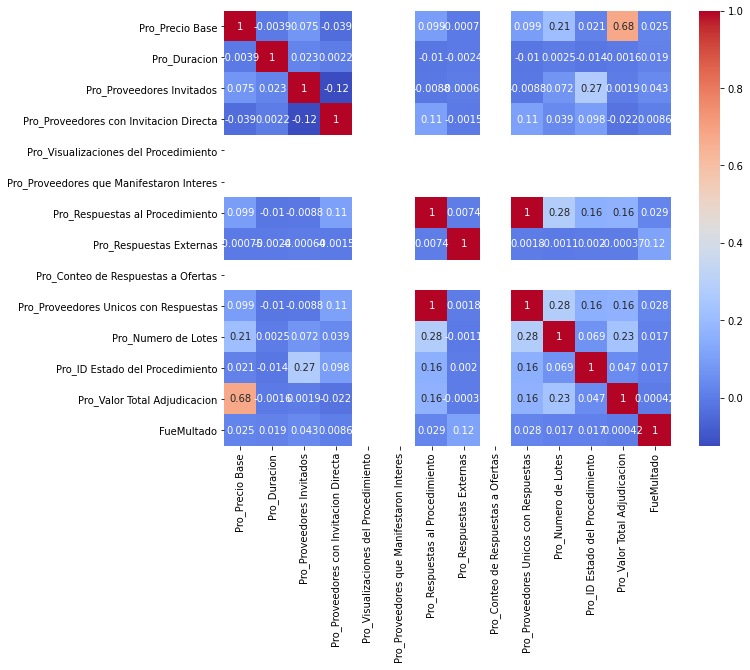

In [34]:
# Crear gráfica de correlación
fig, ax = plt.subplots(figsize=(10, 8)) # Ajustar el tamaño de la figura
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)

# Mostrar gráfica
plt.show()

Las variables numéricas seleccionadas tienen una baja correlación entre ellas.

## Histogramas

In [35]:
df_final4 = df_final3.drop('Pro_Modalidad de Contratacion', axis=1)
df_final4 = df_final4.drop('Pro_Unidad de Duracion', axis=1)


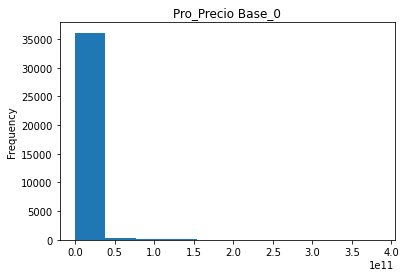

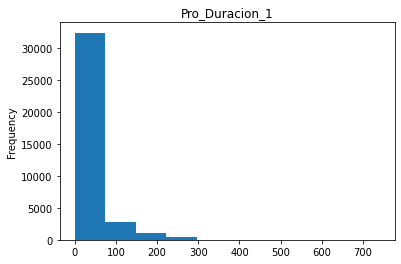

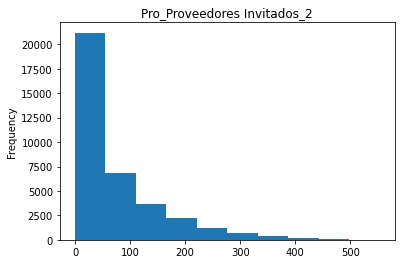

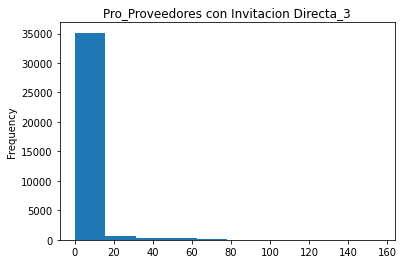

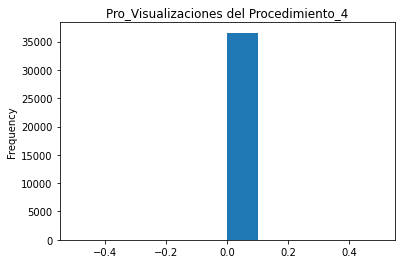

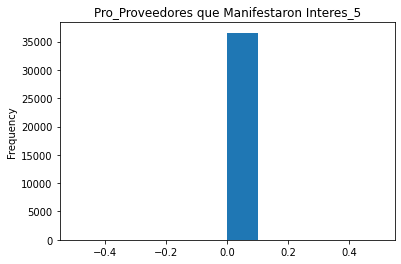

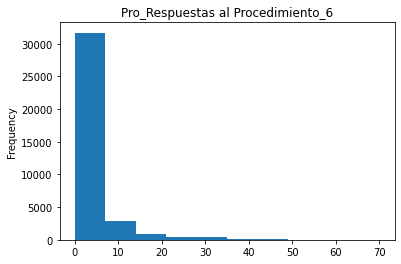

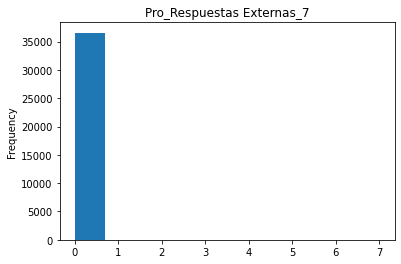

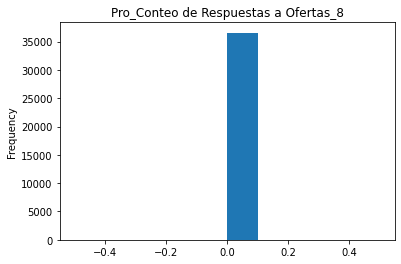

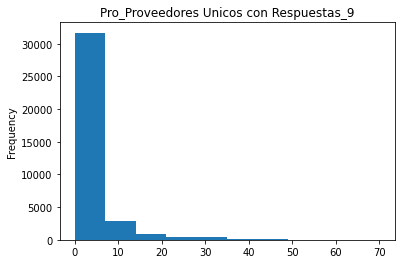

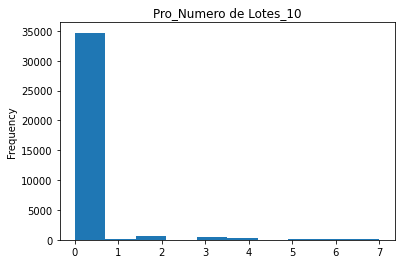

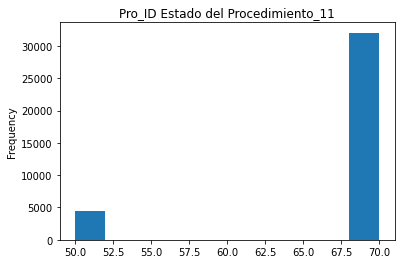

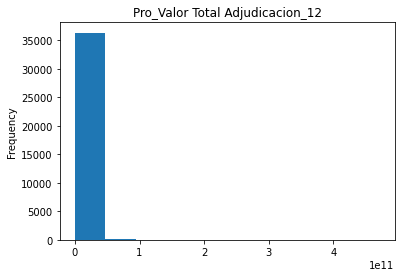

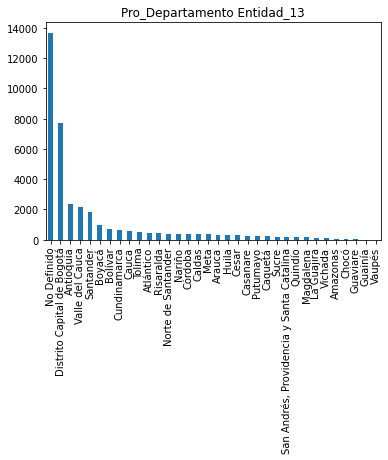

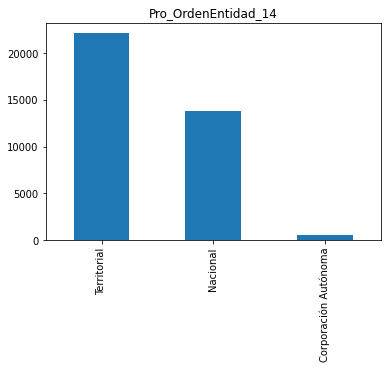

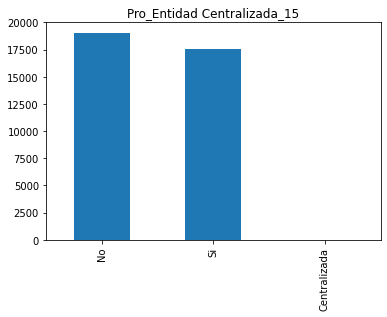

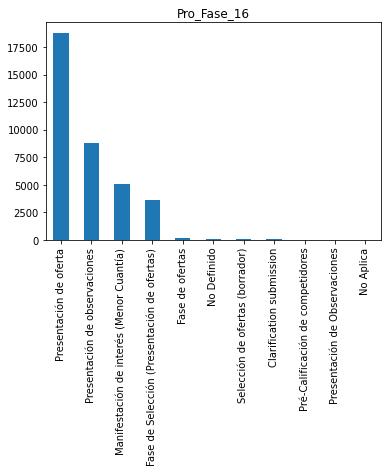

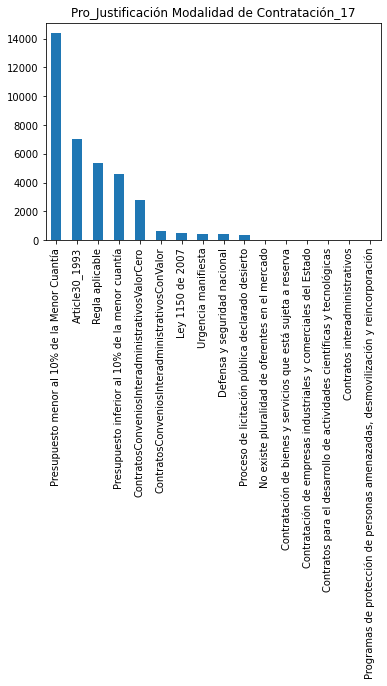

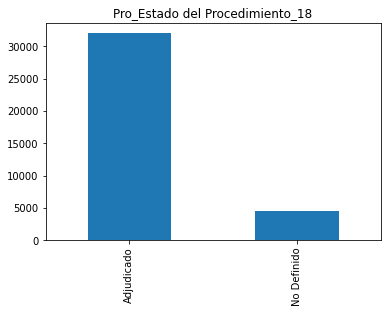

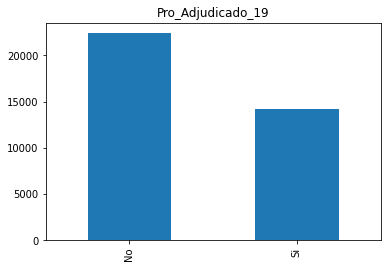

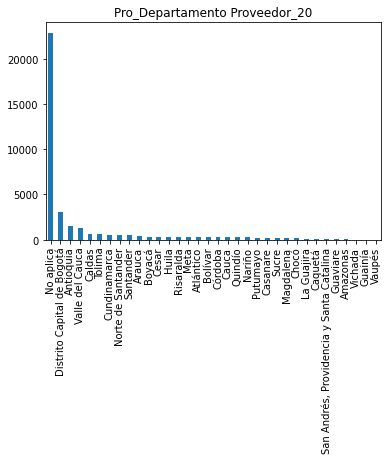

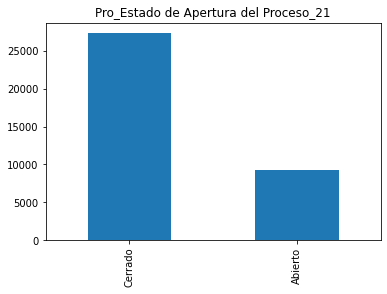

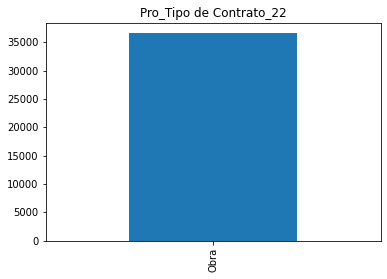

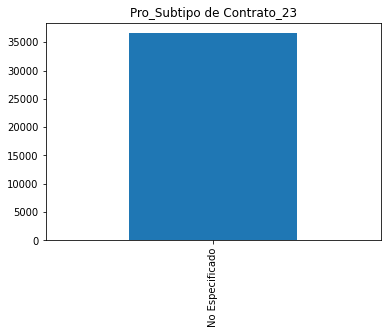

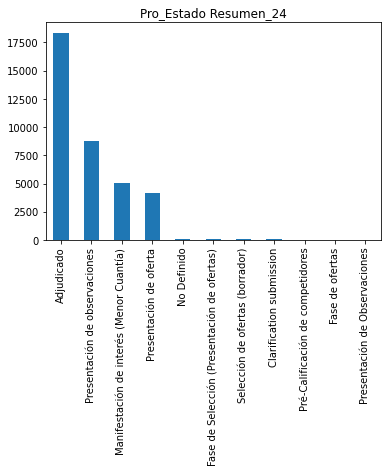

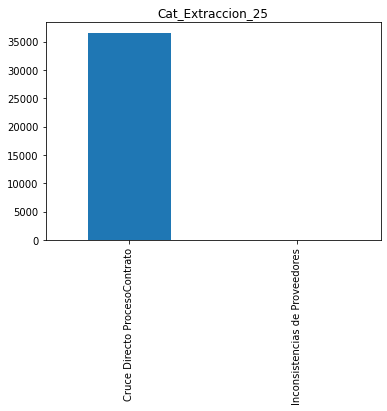

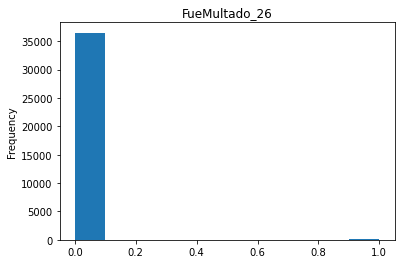

In [36]:
# Iterar sobre las columnas del DataFrame y hacer un histograma para cada variable
# Renombrar columnas con un número consecutivo
df_final4.columns = [f"{col}_{i}" for i, col in enumerate(df_final4.columns)]

for col in df_final4.columns:
    if df_final4[col].dtype == "object":
        # Si la columna es categórica, hacer un gráfico de barras
        plt.figure()
        df_final4[col].value_counts().plot(kind="bar")
        plt.title(col)
        plt.show()
    else:
        # Si la columna es numérica, hacer un histograma
        plt.figure()
        df_final4[col].plot.hist()
        plt.title(col)
        plt.show()

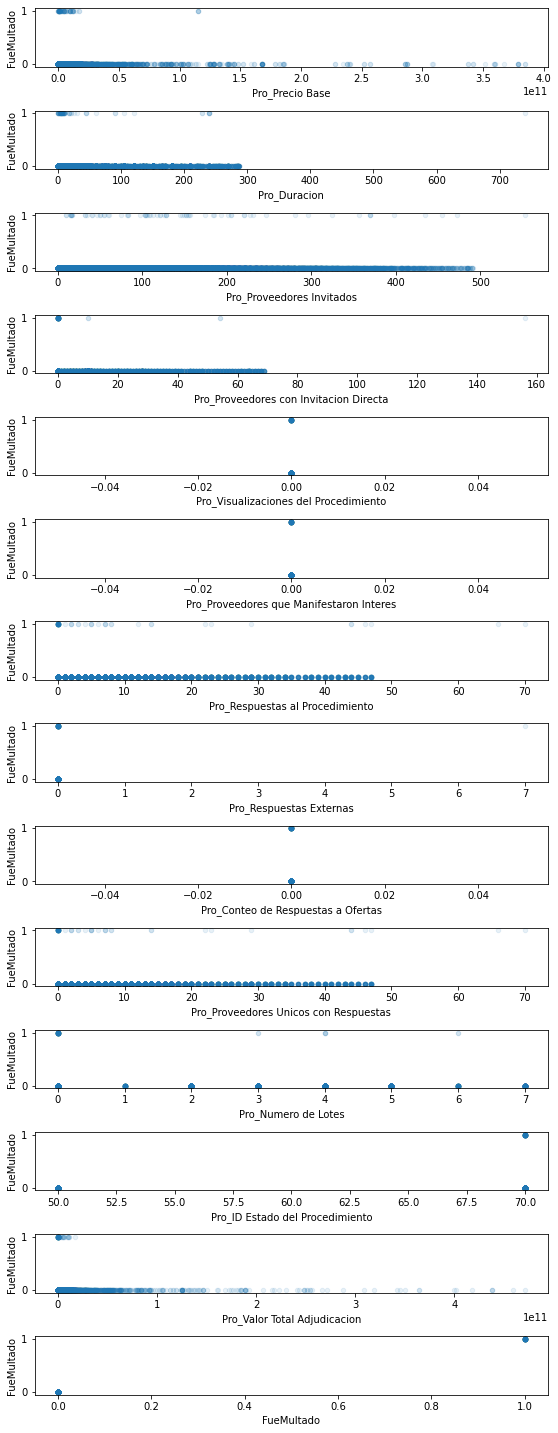

In [37]:
# Seleccionamos solo las columnas numéricas
num_cols = df_final3.select_dtypes(include='number').columns

# Creamos una figura y un eje
fig, ax = plt.subplots(nrows=len(num_cols), figsize=(8, 20))

# Iteramos a través de cada columna numérica y graficamos
for i, col in enumerate(num_cols):
    df_final3.plot.scatter(x=col, y='FueMultado', ax=ax[i], alpha=0.1)
    
# Ajustamos los subplots
plt.tight_layout()

# Mostramos la gráfica
plt.show()

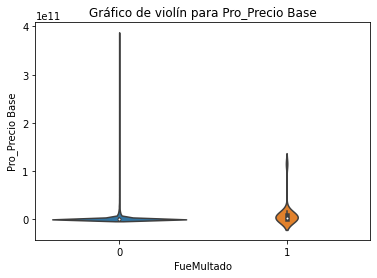

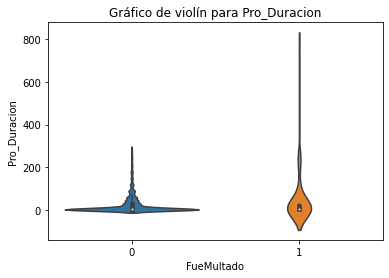

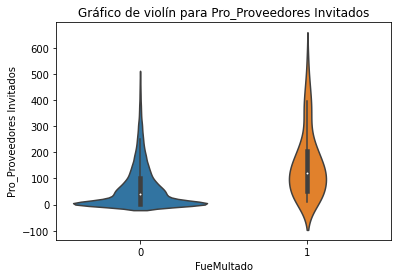

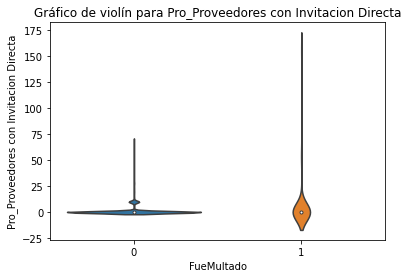

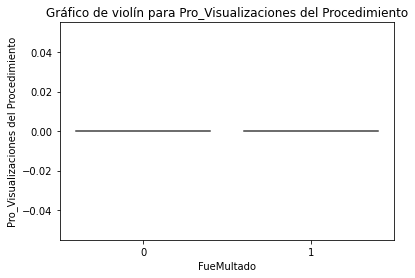

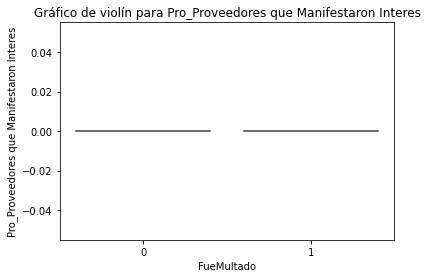

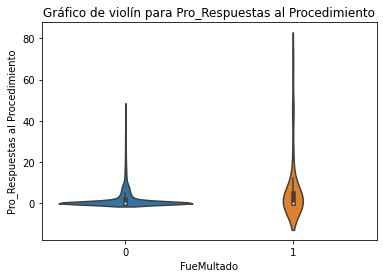

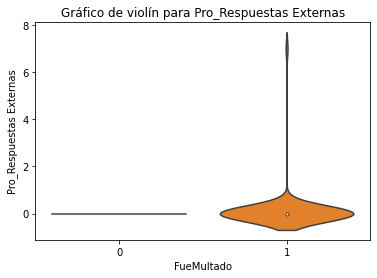

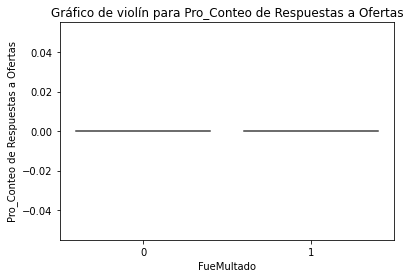

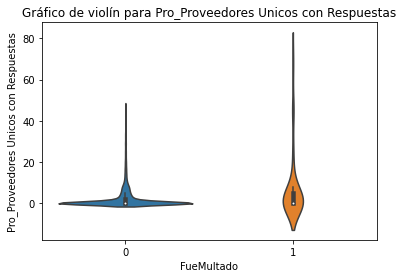

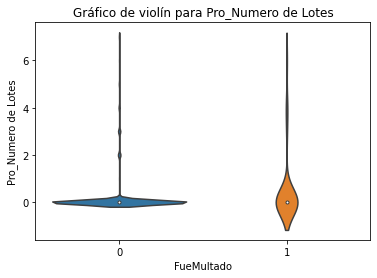

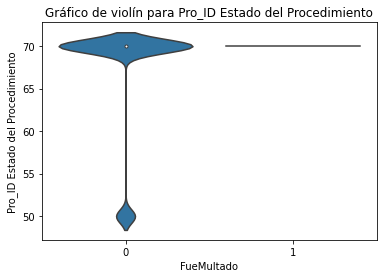

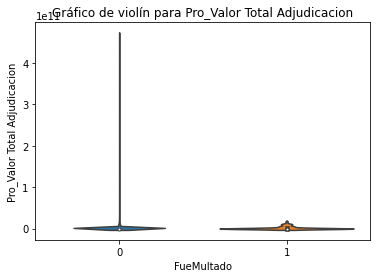

In [38]:
# Seleccionamos solo las variables numéricas del data frame
df_numeric = df_final3.select_dtypes(include=[float, int])

# Hacemos un loop por cada variable numérica
for col in df_numeric.columns:
    # Creamos el gráfico de violín utilizando Seaborn
    sns.violinplot(x='FueMultado', y=col, data=df_final3)
    plt.title(f'Gráfico de violín para {col}')
    plt.show()

# Implementación de Modelos

## Random Forest Classifier & Over Sampling

In [40]:
df_final3 = df_final3.drop(['Pro_Fecha de Ultima Publicación', 'Pro_Fecha de Publicacion del Proceso'], axis=1)

In [41]:
# Seleccionar las columnas que son categóricas
cat_cols = df_final3.select_dtypes(include=['object']).columns.tolist()

# Convertir las variables categóricas en dummies y eliminar una columna
df_dummies = pd.get_dummies(df_final3, columns=cat_cols, drop_first=True)

In [42]:
df_dummies = df_dummies.fillna(0)

In [82]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba:

from sklearn.model_selection import train_test_split

X=df_dummies.drop('FueMultado', axis=1)
Y=df_dummies['FueMultado']
# X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=123, stratify=Y)
X_train, X_dev, y_train, y_dev = train_test_split(X,Y, test_size=0.2, random_state=123, stratify = Y)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.2, random_state=123, stratify = y_train)

print('División de clases en datos Dev')
print(y_dev.value_counts())
print()
print('División de clases en datos Train')
print(y_train.value_counts())
print()
print('División de clases en datos Test')
print(y_test.value_counts())

División de clases en datos Dev
0    7299
1      15
Name: FueMultado, dtype: int64

División de clases en datos Train
0    23354
1       47
Name: FueMultado, dtype: int64

División de clases en datos Test
0    5839
1      12
Name: FueMultado, dtype: int64


In [83]:
# Realizar un rebalanceo de la variable de respuesta para solucionar el problema de desbalanceo:

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

smote = SMOTE(random_state=123)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [84]:
# Realizar una normalización de las variables numéricas:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res.select_dtypes(include=[np.number]))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=[np.number]))

In [85]:
# Realizar una reducción de dimensionalidad mediante PCA:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95, random_state=42)
X_train_res_pca = pca.fit_transform(X_train_res_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [86]:
# Seleccionar las características más importantes mediante un modelo de selección de características (por ejemplo, un modelo de regresión logística con regularización L1):

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
logistic = LogisticRegression(penalty='l1', solver='saga', random_state=42, max_iter=10000)
selector = SelectFromModel(logistic, max_features=10, threshold=-np.inf)
selector.fit(X_train_res_pca, y_train_res)
X_train_res_pca_selected = selector.transform(X_train_res_pca)
X_test_pca_selected = selector.transform(X_test_pca)

In [87]:
print("Características seleccionadas:", X_test_pca_selected)

Características seleccionadas: [[-0.37884982  1.47659731 -0.40811891 ... -2.48662828  3.23470714
  -1.00949595]
 [ 0.52806694 -1.18476865  0.8415828  ... -0.52291874 -0.1179312
  -0.75101917]
 [-0.44175414 -2.70497228  0.61837805 ... -0.1403557  -0.30384828
   0.27272401]
 ...
 [-0.6841586  -4.0138933   0.92457502 ... -0.19480812  0.06343579
   0.57705083]
 [-0.10890226 -3.02733798  0.25175709 ...  1.32374069  1.66850485
  -0.11342727]
 [-1.51170638 -1.37306847 -0.14828319 ...  0.04172041 -0.06498105
   0.8368069 ]]


In [88]:
log_reg_sel = LogisticRegression(penalty='l1', solver='liblinear')
log_reg_sel.fit(X_train_res_pca_selected, y_train_res)
print("Precisión en los datos de prueba:", log_reg_sel.score(X_test_pca_selected, y_test))

Precisión en los datos de prueba: 0.8757477354298411


In [51]:
# Entrenar un modelo de clasificación con los datos de entrenamiento seleccionados:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_res_pca_selected, y_train_res)

RandomForestClassifier(random_state=42)

In [52]:
# Evaluar el modelo de clasificación con los datos de prueba:

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,recall_score
y_pred = rfc.predict_proba(X_test_pca_selected)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)

y_pred_bin = (rfc.predict_proba(X_test_pca_selected)[:, 1] > 0.5).astype(int)
print(classification_report(y_test, y_pred_bin))
print(confusion_matrix(y_test, y_pred_bin))
print("Recall score: ", recall_score(y_test, y_pred_bin))
print("ROC AUC score: ", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5839
           1       0.33      0.25      0.29        12

    accuracy                           1.00      5851
   macro avg       0.67      0.62      0.64      5851
weighted avg       1.00      1.00      1.00      5851

[[5833    6]
 [   9    3]]
Recall score:  0.25
ROC AUC score:  0.7425715019695154


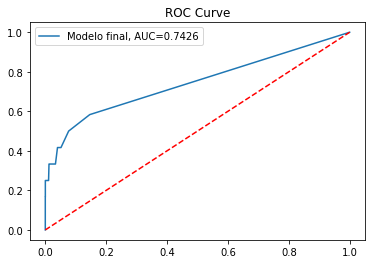

In [53]:
# Ploteando cada roc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, RocCurveDisplay

roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)

plt.plot(fpr,tpr,label="Modelo final, AUC="+str(round(roc_auc,4)))

plt.title("ROC Curve")
plt.legend()
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)", color = 'red')
plt.show()

Se tratará de mejorar el modelo haciendo uso de GridSearchCV

## Random Forest Classifier & GridSearchCV & Over Sampling

In [56]:
# Entrenar un modelo de clasificación con los datos de entrenamiento seleccionados:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}
rfc = RandomForestClassifier(random_state=42)
grid = RandomizedSearchCV(rfc, cv=KFold(3), param_distributions=param_grid, refit = False, n_jobs=-1
                    , n_iter=15, verbose=20, scoring=['accuracy', 'precision', 'recall'])
#                             n_iter=15, n_jobs=1, scoring=['accuracy', 'precision', 'recall']
grid.fit(X_train_res_pca_selected, y_train_res)
# rfc_best = grid.best_estimator_

Fitting 3 folds for each of 15 candidates, totalling 45 fits


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(random_state=42), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   refit=False, scoring=['accuracy', 'precision', 'recall'],
                   verbose=20)

In [57]:
cv_results_df = pd.DataFrame(grid.cv_results_)
cv_results_df.to_csv('gridsearchRFC_OS.csv')

In [58]:
cv_results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_depth,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_precision,split1_test_precision,split2_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,74.703023,17.033635,1.173928,0.601614,200,10,None,"{'n_estimators': 200, 'min_samples_split': 10,...",0.996275,0.998330,0.999679,0.998095,0.001400,7,0.275862,0.998195,1.0,0.758019,0.340937,6,0.50000,0.998452,0.999679,0.832710,0.235262,10
1,110.277963,29.165976,2.411430,1.140751,300,10,None,"{'n_estimators': 300, 'min_samples_split': 10,...",0.996403,0.998266,0.999679,0.998116,0.001341,6,0.285714,0.998194,1.0,0.761303,0.336293,5,0.50000,0.998323,0.999679,0.832667,0.235232,13
2,28.444500,1.083371,0.649545,0.466730,100,10,10,"{'n_estimators': 100, 'min_samples_split': 10,...",0.980796,0.995889,0.999358,0.992014,0.008058,10,0.053512,0.993201,1.0,0.682237,0.444585,10,0.50000,0.998581,0.999358,0.832646,0.235217,14
3,19.072215,0.430213,0.227999,0.022100,100,5,5,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.815607,0.975271,0.875458,0.888779,0.065860,14,0.007289,0.954927,1.0,0.654072,0.457715,15,0.65625,0.997420,0.875458,0.843043,0.141156,4
4,37.480846,9.950669,0.695760,0.568080,100,5,None,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.996275,0.998330,0.999872,0.998159,0.001473,5,0.275862,0.998195,1.0,0.758019,0.340937,6,0.50000,0.998452,0.999872,0.832775,0.235308,7


In [89]:
# Evaluar el modelo de clasificación con los datos de prueba:

y_pred = rfc_best.predict_proba(X_test_pca_selected)[:, 1]
y_pred_bin = (rfc_best.predict_proba(X_test_pca_selected)[:, 1] > 0.5).astype(int)

print(classification_report(y_test, y_pred_bin))
print(confusion_matrix(y_test, y_pred_bin))
print("Recall score: ", recall_score(y_test, y_pred_bin))
print("ROC AUC score: ", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73      7690
           1       0.00      0.80      0.01        15

    accuracy                           0.57      7705
   macro avg       0.50      0.69      0.37      7705
weighted avg       1.00      0.57      0.73      7705

[[4414 3276]
 [   3   12]]
Recall score:  0.8
ROC AUC score:  0.7075119202427396


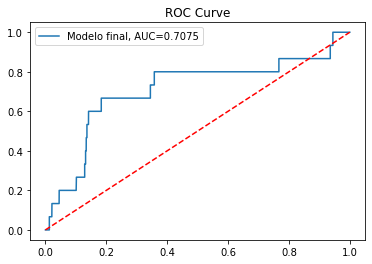

In [90]:
# Ploteando cada roc
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)

plt.plot(fpr,tpr,label="Modelo final, AUC="+str(round(roc_auc,4)))

plt.title("ROC Curve")
plt.legend()
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)", color = 'red')
plt.show()

## Random Forest Classifier & Under Sampling

In [59]:
# Realizar un rebalanceo de la variable de respuesta para solucionar el problema de desbalanceo:

from imblearn.under_sampling import NearMiss

nm = NearMiss()
X_train_res, y_train_res = nm.fit_resample(X_train, y_train)

In [60]:
# Realizar una normalización de las variables numéricas:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res.select_dtypes(include=[np.number]))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=[np.number]))

In [61]:
# Realizar una reducción de dimensionalidad mediante PCA:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95, random_state=42)
X_train_res_pca = pca.fit_transform(X_train_res_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [62]:
# Seleccionar las características más importantes mediante un modelo de selección de características (por ejemplo, un modelo de regresión logística con regularización L1):

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
logistic = LogisticRegression(penalty='l1', solver='saga', random_state=42, max_iter=10000)
selector = SelectFromModel(logistic, max_features=10, threshold=-np.inf)
selector.fit(X_train_res_pca, y_train_res)
X_train_res_pca_selected = selector.transform(X_train_res_pca)
X_test_pca_selected = selector.transform(X_test_pca)

In [63]:
log_reg_sel = LogisticRegression(penalty='l1', solver='liblinear')
log_reg_sel.fit(X_train_res_pca_selected, y_train_res)
print("Precisión en los datos de prueba:", log_reg_sel.score(X_test_pca_selected, y_test))

Precisión en los datos de prueba: 0.3722440608443001


In [64]:
# Entrenar un modelo de clasificación con los datos de entrenamiento seleccionados:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_res_pca_selected, y_train_res)

RandomForestClassifier(random_state=42)

In [65]:
# Evaluar el modelo de clasificación con los datos de prueba:

y_pred = rfc.predict_proba(X_test_pca_selected)[:, 1]
y_pred_bin = (rfc.predict_proba(X_test_pca_selected)[:, 1] > 0.5).astype(int)
print(classification_report(y_test, y_pred_bin))
print(confusion_matrix(y_test, y_pred_bin))
print("Recall score: ", recall_score(y_test, y_pred_bin))
print("ROC AUC score: ", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.15      0.26      5839
           1       0.00      0.92      0.00        12

    accuracy                           0.15      5851
   macro avg       0.50      0.53      0.13      5851
weighted avg       1.00      0.15      0.26      5851

[[ 888 4951]
 [   1   11]]
Recall score:  0.9166666666666666
ROC AUC score:  0.7277287777587487


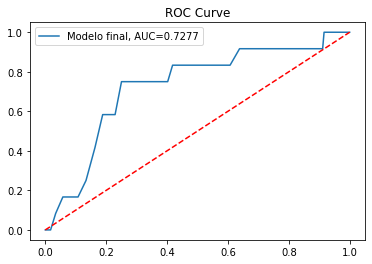

In [66]:
# Ploteando cada roc
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)

plt.plot(fpr,tpr,label="Modelo final, AUC="+str(round(roc_auc,4)))

plt.title("ROC Curve")
plt.legend()
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)", color = 'red')
plt.show()

## Random Forest Classifier & GridSearchCV & Under Sampling

In [67]:
# Entrenar un modelo de clasificación con los datos de entrenamiento seleccionados:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}
rfc = RandomForestClassifier(random_state=42)
# grid = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
grid = RandomizedSearchCV(rfc, cv=KFold(3), param_distributions=param_grid, refit = False, n_jobs=-1
                    , n_iter=15, verbose=20, scoring=['accuracy', 'precision', 'recall'])
grid.fit(X_train_res_pca_selected, y_train_res)
# rfc_best = grid.best_estimator_

Fitting 3 folds for each of 15 candidates, totalling 45 fits


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(random_state=42), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   refit=False, scoring=['accuracy', 'precision', 'recall'],
                   verbose=20)

In [69]:
cv_results_df = pd.DataFrame(grid.cv_results_)
cv_results_df.to_csv('gridsearchRFC_US.csv')

In [70]:
cv_results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_depth,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_precision,split1_test_precision,split2_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,0.261468,0.017287,0.035106,0.015698,100,5,10,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.75000,0.935484,0.903226,0.862903,0.080914,4,0.0,1.0,1.0,0.666667,0.471405,1,0.0,0.875,0.903226,0.592742,0.419290,10
1,0.264137,0.032231,0.027105,0.004381,100,2,10,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.75000,0.935484,0.903226,0.862903,0.080914,4,0.0,1.0,1.0,0.666667,0.471405,1,0.0,0.875,0.903226,0.592742,0.419290,10
2,0.311109,0.033478,0.026676,0.003773,100,10,10,"{'n_estimators': 100, 'min_samples_split': 10,...",0.68750,0.935484,0.935484,0.852823,0.116901,10,0.0,1.0,1.0,0.666667,0.471405,1,0.0,0.875,0.935484,0.603495,0.427449,1
3,0.765797,0.011320,0.078276,0.016074,300,2,None,"{'n_estimators': 300, 'min_samples_split': 2, ...",0.75000,0.935484,0.903226,0.862903,0.080914,4,0.0,1.0,1.0,0.666667,0.471405,1,0.0,0.875,0.903226,0.592742,0.419290,10
4,0.781847,0.022948,0.061352,0.009982,300,10,10,"{'n_estimators': 300, 'min_samples_split': 10,...",0.71875,0.935484,0.935484,0.863239,0.102169,1,0.0,1.0,1.0,0.666667,0.471405,1,0.0,0.875,0.935484,0.603495,0.427449,1


In [92]:
# Evaluar el modelo de clasificación con los datos de prueba:

y_pred = rfc_best.predict_proba(X_test_pca_selected)[:, 1]
y_pred_bin = (rfc_best.predict_proba(X_test_pca_selected)[:, 1] > 0.5).astype(int)

print(classification_report(y_test, y_pred_bin))
print(confusion_matrix(y_test, y_pred_bin))
print("Recall score: ", recall_score(y_test, y_pred_bin))
print("ROC AUC score: ", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73      7690
           1       0.00      0.80      0.01        15

    accuracy                           0.57      7705
   macro avg       0.50      0.69      0.37      7705
weighted avg       1.00      0.57      0.73      7705

[[4414 3276]
 [   3   12]]
Recall score:  0.8
ROC AUC score:  0.7075119202427396


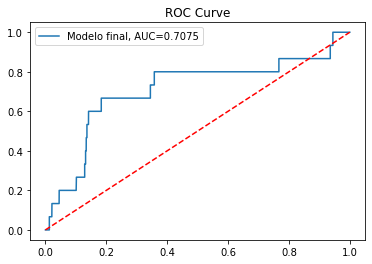

In [93]:
# Ploteando cada roc
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)

plt.plot(fpr,tpr,label="Modelo final, AUC="+str(round(roc_auc,4)))

plt.title("ROC Curve")
plt.legend()
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)", color = 'red')
plt.show()

## Redes neuronales & GridSearchCV & Pesos por clase

In [71]:
#Se calculan los pesos para cada clase que se utilizaran para manejar el desbalanceo de clases
neg, pos = np.bincount(Y)
total = Y.shape[0]
weight_for_0 = (1 / neg) * (total / 2.0)    #Mantiene los pesos totales originales
weight_for_1 = (1 / pos) * (total / 2.0)
class_weight = {0: weight_for_0, 1: weight_for_1}

In [72]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=[np.number]))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=[np.number]))
X_dev_scaled = scaler.transform(X_test.select_dtypes(include=[np.number]))

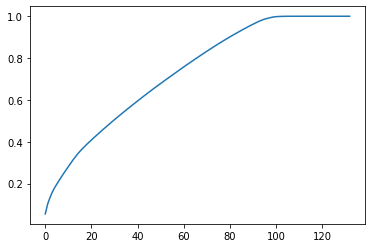

In [73]:
pca_sample = PCA()
sample = pca_sample.fit_transform(X_train_scaled)
plt.plot(np.cumsum(pca_sample.explained_variance_ratio_))

In [74]:
# Realizar una reducción de dimensionalidad mediante PCA:
pca = PCA(n_components=0.95, random_state=1234)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [75]:
X_train_pca.shape

(23401, 89)

In [76]:
def build_keras_base(hidden_layers_1 = 512, hidden_layers_2 = 8, perdida = 'binary_crossentropy', dropout_param = 0.5, lr = 0.01, decay = 0):
    opt = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999,  decay=decay)
    
    model_opt = Sequential()
    model_opt.add(Dense(hidden_layers_1, activation='relu', input_dim=X_train_pca.shape[1]))
    if dropout_param>0:
        model_opt.add(Dropout(dropout_param))
    model_opt.add(Dense(hidden_layers_2, activation='relu'))
    if dropout_param>0:
        model_opt.add(Dropout(dropout_param))
    model_opt.add(Dense(1, activation='sigmoid'))
    model_opt.compile(optimizer = opt, loss = perdida, metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    return model_opt

In [77]:
model_keras = KerasClassifier(build_fn=build_keras_base, epochs=350, batch_size=256, verbose=1)

In [78]:
lr=[1e-2, 1e-3, 1e-4]
decay=[1e-6,1e-9,0]
# hidden_layers_1=[[64,4], [128,8], [256,4], [512, 10]] 
hidden_layers_1=[64, 128, 256, 512] 
hidden_layers_2=[4, 8, 16] 
perdida = ['binary_crossentropy', 'poisson']
dropout_param = [0, 0.1, 0.2, 0.3]

param_grid = dict(
                    hidden_layers_1 = hidden_layers_1, hidden_layers_2 = hidden_layers_2, perdida =perdida, dropout_param=dropout_param
                    , lr = lr, decay= decay
                 )

In [79]:
grid = RandomizedSearchCV(estimator=model_keras, cv=KFold(3), param_distributions=param_grid, refit = False, 
                          verbose=20,  n_iter=15, n_jobs=1, scoring=['accuracy', 'precision', 'recall'])

In [80]:
grid_result = grid.fit(X_train_pca, y_train, class_weight=class_weight)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV 1/3; 1/15] START decay=1e-06, dropout_param=0.3, hidden_layers_1=64, hidden_layers_2=8, lr=0.001, perdida=binary_crossentropy
Epoch 1/350
61/61 [==============================] - 2s 2ms/step - loss: 1.2133 - accuracy: 0.7851 - precision: 0.0011 - recall: 0.0936    
Epoch 2/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6497 - accuracy: 0.7980 - precision: 0.0064 - recall: 0.6183  
Epoch 3/350
61/61 [==============================] - 0s 2ms/step - loss: 0.8157 - accuracy: 0.7094 - precision: 0.0061 - recall: 0.5983  
Epoch 4/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4798 - accuracy: 0.7157 - precision: 0.0057 - recall: 0.7939  
Epoch 5/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.7439 - precision: 0.0053 - recall: 0.7411  
Epoch 6/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4408 - accuracy: 0.7529 - precision: 0.007

61/61 [==============================] - 0s 2ms/step - loss: 0.1183 - accuracy: 0.9168 - precision: 0.0273 - recall: 0.9839  
Epoch 59/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1380 - accuracy: 0.9262 - precision: 0.0237 - recall: 0.8979  
Epoch 60/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9146 - precision: 0.0259 - recall: 0.9824
Epoch 61/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1444 - accuracy: 0.9097 - precision: 0.0202 - recall: 0.9677  
Epoch 62/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1259 - accuracy: 0.9207 - precision: 0.0256 - recall: 0.9677  
Epoch 63/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1596 - accuracy: 0.9232 - precision: 0.0261 - recall: 0.9743
Epoch 64/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9143 - precision: 0.0304 - recall: 0.9839  
Epoch 65/350
61/61 [========================

61/61 [==============================] - 0s 2ms/step - loss: 0.1002 - accuracy: 0.9514 - precision: 0.0511 - recall: 1.0000
Epoch 118/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1031 - accuracy: 0.9512 - precision: 0.0528 - recall: 0.9839  
Epoch 119/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0743 - accuracy: 0.9525 - precision: 0.0374 - recall: 0.9677  
Epoch 120/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1297 - accuracy: 0.9513 - precision: 0.0462 - recall: 0.9677  
Epoch 121/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0664 - accuracy: 0.9516 - precision: 0.0425 - recall: 0.9516  
Epoch 122/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0817 - accuracy: 0.9568 - precision: 0.0555 - recall: 0.9677  
Epoch 123/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0711 - accuracy: 0.9540 - precision: 0.0437 - recall: 0.9839  
Epoch 124/350
61/61 [===============

61/61 [==============================] - 0s 2ms/step - loss: 0.0719 - accuracy: 0.9621 - precision: 0.0599 - recall: 1.0000
Epoch 177/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0952 - accuracy: 0.9574 - precision: 0.0461 - recall: 1.0000
Epoch 178/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0872 - accuracy: 0.9547 - precision: 0.0471 - recall: 1.0000
Epoch 179/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0729 - accuracy: 0.9581 - precision: 0.0422 - recall: 0.9516  
Epoch 180/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0647 - accuracy: 0.9591 - precision: 0.0384 - recall: 0.8871  
Epoch 181/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0605 - accuracy: 0.9626 - precision: 0.0469 - recall: 0.9955
Epoch 182/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0640 - accuracy: 0.9592 - precision: 0.0463 - recall: 0.9355  
Epoch 183/350
61/61 [=====================

61/61 [==============================] - 0s 2ms/step - loss: 0.0650 - accuracy: 0.9651 - precision: 0.0603 - recall: 0.9839  
Epoch 236/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0504 - accuracy: 0.9650 - precision: 0.0599 - recall: 1.0000
Epoch 237/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0513 - accuracy: 0.9647 - precision: 0.0449 - recall: 0.9194  
Epoch 238/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0687 - accuracy: 0.9607 - precision: 0.0521 - recall: 1.0000
Epoch 239/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9621 - precision: 0.0559 - recall: 1.0000
Epoch 240/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9654 - precision: 0.0539 - recall: 0.8964  
Epoch 241/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0610 - accuracy: 0.9593 - precision: 0.0620 - recall: 1.0000
Epoch 242/350
61/61 [=====================

61/61 [==============================] - 0s 2ms/step - loss: 0.0684 - accuracy: 0.9622 - precision: 0.0465 - recall: 0.9355  
Epoch 295/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0548 - accuracy: 0.9652 - precision: 0.0619 - recall: 0.9727  
Epoch 296/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0738 - accuracy: 0.9555 - precision: 0.0409 - recall: 0.9839  
Epoch 297/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0800 - accuracy: 0.9627 - precision: 0.0464 - recall: 0.9839  
Epoch 298/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0646 - accuracy: 0.9644 - precision: 0.0849 - recall: 1.0000
Epoch 299/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0553 - accuracy: 0.9656 - precision: 0.0708 - recall: 1.0000
Epoch 300/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0594 - accuracy: 0.9649 - precision: 0.0554 - recall: 1.0000
Epoch 301/350
61/61 [===================

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


31/31 [==============================] - 0s 805us/step
[CV 1/3; 1/15] END decay=1e-06, dropout_param=0.3, hidden_layers_1=64, hidden_layers_2=8, lr=0.001, perdida=binary_crossentropy; accuracy: (test=0.981) precision: (test=0.034) recall: (test=0.385) total time=  49.2s
[CV 2/3; 1/15] START decay=1e-06, dropout_param=0.3, hidden_layers_1=64, hidden_layers_2=8, lr=0.001, perdida=binary_crossentropy
Epoch 1/350
61/61 [==============================] - 2s 3ms/step - loss: 0.7800 - accuracy: 0.7104 - precision_1: 0.0031 - recall_1: 0.4524   
Epoch 2/350
61/61 [==============================] - 0s 4ms/step - loss: 0.7587 - accuracy: 0.7603 - precision_1: 0.0017 - recall_1: 0.2383  
Epoch 3/350
61/61 [==============================] - 0s 3ms/step - loss: 0.5166 - accuracy: 0.7262 - precision_1: 0.0043 - recall_1: 0.7177 
Epoch 4/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5766 - accuracy: 0.7300 - precision_1: 0.0047 - recall_1: 0.6652 
Epoch 5/350
61/61 [=============

61/61 [==============================] - 0s 2ms/step - loss: 0.1053 - accuracy: 0.9247 - precision_1: 0.0145 - recall_1: 0.8387  
Epoch 56/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1432 - accuracy: 0.9306 - precision_1: 0.0182 - recall_1: 0.8072  
Epoch 57/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1356 - accuracy: 0.9308 - precision_1: 0.0274 - recall_1: 0.9596
Epoch 58/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1289 - accuracy: 0.9326 - precision_1: 0.0299 - recall_1: 1.0000
Epoch 59/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1337 - accuracy: 0.9342 - precision_1: 0.0262 - recall_1: 1.0000
Epoch 60/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1392 - accuracy: 0.9398 - precision_1: 0.0271 - recall_1: 0.8860  
Epoch 61/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1021 - accuracy: 0.9370 - precision_1: 0.0231 - recall_1: 0.9516  
Epoch 62/350
61/61

61/61 [==============================] - 0s 2ms/step - loss: 0.0790 - accuracy: 0.9656 - precision_1: 0.0587 - recall_1: 1.0000
Epoch 113/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0582 - accuracy: 0.9691 - precision_1: 0.0464 - recall_1: 1.0000
Epoch 114/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.9601 - precision_1: 0.0431 - recall_1: 0.9355  
Epoch 115/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0651 - accuracy: 0.9592 - precision_1: 0.0546 - recall_1: 0.9839  
Epoch 116/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0728 - accuracy: 0.9673 - precision_1: 0.0600 - recall_1: 0.9677  
Epoch 117/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0796 - accuracy: 0.9567 - precision_1: 0.0453 - recall_1: 1.0000
Epoch 118/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0900 - accuracy: 0.9583 - precision_1: 0.0532 - recall_1: 0.9839  
Epoch 119/35

61/61 [==============================] - 0s 2ms/step - loss: 0.0680 - accuracy: 0.9696 - precision_1: 0.0561 - recall_1: 0.9428  
Epoch 170/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0499 - accuracy: 0.9666 - precision_1: 0.0626 - recall_1: 1.0000
Epoch 171/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0984 - accuracy: 0.9666 - precision_1: 0.0467 - recall_1: 0.8892  
Epoch 172/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0549 - accuracy: 0.9643 - precision_1: 0.0479 - recall_1: 0.9355  
Epoch 173/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9682 - precision_1: 0.0411 - recall_1: 0.8871  
Epoch 174/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0546 - accuracy: 0.9689 - precision_1: 0.0446 - recall_1: 1.0000
Epoch 175/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0782 - accuracy: 0.9686 - precision_1: 0.0418 - recall_1: 0.8578  
Epoch 176/

61/61 [==============================] - 0s 2ms/step - loss: 0.0466 - accuracy: 0.9683 - precision_1: 0.0448 - recall_1: 0.9194  
Epoch 227/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0522 - accuracy: 0.9678 - precision_1: 0.0472 - recall_1: 0.9839  
Epoch 228/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0566 - accuracy: 0.9739 - precision_1: 0.0552 - recall_1: 0.9298  
Epoch 229/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9743 - precision_1: 0.0700 - recall_1: 0.9355  
Epoch 230/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0497 - accuracy: 0.9745 - precision_1: 0.0667 - recall_1: 1.0000
Epoch 231/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0407 - accuracy: 0.9708 - precision_1: 0.0672 - recall_1: 1.0000
Epoch 232/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 0.9747 - precision_1: 0.0780 - recall_1: 0.9839  
Epoch 233/

61/61 [==============================] - 0s 2ms/step - loss: 0.1818 - accuracy: 0.9690 - precision_1: 0.0569 - recall_1: 0.9180  
Epoch 284/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0489 - accuracy: 0.9683 - precision_1: 0.0514 - recall_1: 0.9516  
Epoch 285/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0461 - accuracy: 0.9700 - precision_1: 0.0809 - recall_1: 1.0000
Epoch 286/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.9706 - precision_1: 0.0655 - recall_1: 1.0000
Epoch 287/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0603 - accuracy: 0.9662 - precision_1: 0.0541 - recall_1: 1.0000
Epoch 288/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1239 - accuracy: 0.9674 - precision_1: 0.0629 - recall_1: 0.9201 
Epoch 289/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0661 - accuracy: 0.9631 - precision_1: 0.0391 - recall_1: 1.0000
Epoch 290/350
6

61/61 [==============================] - 0s 2ms/step - loss: 0.0368 - accuracy: 0.9723 - precision_1: 0.0542 - recall_1: 0.9516  
Epoch 341/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0355 - accuracy: 0.9755 - precision_1: 0.0729 - recall_1: 0.9516  
Epoch 342/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 0.9774 - precision_1: 0.0890 - recall_1: 1.0000
Epoch 343/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0423 - accuracy: 0.9784 - precision_1: 0.0654 - recall_1: 1.0000
Epoch 344/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0367 - accuracy: 0.9761 - precision_1: 0.0535 - recall_1: 0.9839  
Epoch 345/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0363 - accuracy: 0.9780 - precision_1: 0.0971 - recall_1: 1.0000
Epoch 346/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0425 - accuracy: 0.9789 - precision_1: 0.1052 - recall_1: 0.9928
Epoch 347/350


C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/350
61/61 [==============================] - 1s 3ms/step - loss: 0.8476 - accuracy: 0.6584 - precision_2: 0.0012 - recall_2: 0.2952    
Epoch 2/350
61/61 [==============================] - 0s 3ms/step - loss: 0.6657 - accuracy: 0.6581 - precision_2: 0.0031 - recall_2: 0.5438 
Epoch 3/350
61/61 [==============================] - 0s 3ms/step - loss: 0.9553 - accuracy: 0.6948 - precision_2: 0.0044 - recall_2: 0.6964 
Epoch 4/350
61/61 [==============================] - 0s 3ms/step - loss: 0.6292 - accuracy: 0.6966 - precision_2: 0.0033 - recall_2: 0.4875 
Epoch 5/350
61/61 [==============================] - 0s 3ms/step - loss: 0.5484 - accuracy: 0.7326 - precision_2: 0.0059 - recall_2: 0.7537
Epoch 6/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6335 - accuracy: 0.7537 - precision_2: 0.0058 - recall_2: 0.5761
Epoch 7/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4032 - accuracy: 0.7529 - precision_2: 0.0095 - recall_2: 0.8922
Epoch 8/350
6

61/61 [==============================] - 0s 2ms/step - loss: 0.1295 - accuracy: 0.9292 - precision_2: 0.0267 - recall_2: 0.9667  
Epoch 59/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1227 - accuracy: 0.9281 - precision_2: 0.0214 - recall_2: 0.8723  
Epoch 60/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1645 - accuracy: 0.9219 - precision_2: 0.0349 - recall_2: 0.9538  
Epoch 61/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1272 - accuracy: 0.9286 - precision_2: 0.0224 - recall_2: 0.8871  
Epoch 62/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1145 - accuracy: 0.9299 - precision_2: 0.0249 - recall_2: 0.9677  
Epoch 63/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1235 - accuracy: 0.9315 - precision_2: 0.0382 - recall_2: 1.0000
Epoch 64/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1201 - accuracy: 0.9368 - precision_2: 0.0343 - recall_2: 0.9985
Epoch 65/350
61/

61/61 [==============================] - 0s 2ms/step - loss: 0.0873 - accuracy: 0.9621 - precision_2: 0.0607 - recall_2: 1.0000
Epoch 116/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1062 - accuracy: 0.9628 - precision_2: 0.0736 - recall_2: 1.0000
Epoch 117/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0559 - accuracy: 0.9645 - precision_2: 0.0352 - recall_2: 0.8065  
Epoch 118/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0595 - accuracy: 0.9620 - precision_2: 0.0522 - recall_2: 0.9839  
Epoch 119/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0612 - accuracy: 0.9663 - precision_2: 0.0492 - recall_2: 0.9839  
Epoch 120/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0586 - accuracy: 0.9645 - precision_2: 0.0521 - recall_2: 1.0000
Epoch 121/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0630 - accuracy: 0.9674 - precision_2: 0.0661 - recall_2: 0.9839  
Epoch 122/35

61/61 [==============================] - 0s 2ms/step - loss: 0.0492 - accuracy: 0.9749 - precision_2: 0.0751 - recall_2: 1.0000
Epoch 173/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0739 - accuracy: 0.9718 - precision_2: 0.0669 - recall_2: 0.9839  
Epoch 174/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0583 - accuracy: 0.9715 - precision_2: 0.0820 - recall_2: 1.0000
Epoch 175/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 0.9749 - precision_2: 0.0800 - recall_2: 1.0000
Epoch 176/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0757 - accuracy: 0.9731 - precision_2: 0.0538 - recall_2: 0.9176  
Epoch 177/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0467 - accuracy: 0.9722 - precision_2: 0.0526 - recall_2: 0.9677  
Epoch 178/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0744 - accuracy: 0.9686 - precision_2: 0.0659 - recall_2: 0.9839  
Epoch 179/35

61/61 [==============================] - 0s 2ms/step - loss: 0.0539 - accuracy: 0.9736 - precision_2: 0.0770 - recall_2: 1.0000
Epoch 230/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0454 - accuracy: 0.9767 - precision_2: 0.0822 - recall_2: 0.9839  
Epoch 231/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0435 - accuracy: 0.9762 - precision_2: 0.0660 - recall_2: 0.9839  
Epoch 232/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0753 - accuracy: 0.9721 - precision_2: 0.0698 - recall_2: 0.9647
Epoch 233/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0608 - accuracy: 0.9740 - precision_2: 0.0601 - recall_2: 0.9320  
Epoch 234/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0641 - accuracy: 0.9733 - precision_2: 0.0980 - recall_2: 1.0000
Epoch 235/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0431 - accuracy: 0.9747 - precision_2: 0.0690 - recall_2: 0.9677  
Epoch 236/35

61/61 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 0.9751 - precision_2: 0.0591 - recall_2: 0.9839  
Epoch 287/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0410 - accuracy: 0.9746 - precision_2: 0.0625 - recall_2: 0.9516  
Epoch 288/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0486 - accuracy: 0.9765 - precision_2: 0.0760 - recall_2: 0.9516  
Epoch 289/350
61/61 [==============================] - 1s 13ms/step - loss: 0.0378 - accuracy: 0.9800 - precision_2: 0.1051 - recall_2: 0.9839
Epoch 290/350
61/61 [==============================] - 1s 13ms/step - loss: 0.0368 - accuracy: 0.9766 - precision_2: 0.1017 - recall_2: 0.9677
Epoch 291/350
61/61 [==============================] - 1s 13ms/step - loss: 0.0390 - accuracy: 0.9783 - precision_2: 0.0987 - recall_2: 1.0000
Epoch 292/350
61/61 [==============================] - 1s 13ms/step - loss: 0.0588 - accuracy: 0.9797 - precision_2: 0.0950 - recall_2: 0.9923
Epoch 293/

61/61 [==============================] - 0s 2ms/step - loss: 0.0474 - accuracy: 0.9762 - precision_2: 0.0927 - recall_2: 0.9839  
Epoch 344/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0398 - accuracy: 0.9780 - precision_2: 0.0848 - recall_2: 1.0000
Epoch 345/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0471 - accuracy: 0.9776 - precision_2: 0.1027 - recall_2: 1.0000
Epoch 346/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0396 - accuracy: 0.9766 - precision_2: 0.0835 - recall_2: 1.0000
Epoch 347/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0378 - accuracy: 0.9788 - precision_2: 0.0961 - recall_2: 0.9839  
Epoch 348/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 0.9813 - precision_2: 0.0979 - recall_2: 1.0000
Epoch 349/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0474 - accuracy: 0.9748 - precision_2: 0.0655 - recall_2: 0.9839  
Epoch 350/350


C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/350
61/61 [==============================] - 2s 7ms/step - loss: 1.8008 - accuracy: 0.8341 - precision_3: 0.0053 - recall_3: 0.2626
Epoch 2/350
61/61 [==============================] - 0s 6ms/step - loss: 0.5012 - accuracy: 0.8139 - precision_3: 0.0081 - recall_3: 0.7855
Epoch 3/350
61/61 [==============================] - 0s 8ms/step - loss: 0.3457 - accuracy: 0.7922 - precision_3: 0.0067 - recall_3: 0.7848
Epoch 4/350
61/61 [==============================] - 0s 7ms/step - loss: 0.2949 - accuracy: 0.8442 - precision_3: 0.0109 - recall_3: 0.8756
Epoch 5/350
61/61 [==============================] - 0s 7ms/step - loss: 0.3484 - accuracy: 0.8463 - precision_3: 0.0110 - recall_3: 0.8192
Epoch 6/350
61/61 [==============================] - 0s 6ms/step - loss: 0.2776 - accuracy: 0.8560 - precision_3: 0.0113 - recall_3: 0.8863
Epoch 7/350
61/61 [==============================] - ETA: 0s - loss: 0.2355 - accuracy: 0.8663 - precision_3: 0.0101 - recall_3: 0.9153   - 0s 6ms/step - loss: 

61/61 [==============================] - 0s 6ms/step - loss: 0.1429 - accuracy: 0.9410 - precision_3: 0.0394 - recall_3: 1.0000
Epoch 59/350
61/61 [==============================] - 0s 7ms/step - loss: 0.1262 - accuracy: 0.9428 - precision_3: 0.0411 - recall_3: 1.0000
Epoch 60/350
61/61 [==============================] - 0s 7ms/step - loss: 0.0822 - accuracy: 0.9506 - precision_3: 0.0359 - recall_3: 0.9643
Epoch 61/350
61/61 [==============================] - 0s 7ms/step - loss: 0.1580 - accuracy: 0.9476 - precision_3: 0.0306 - recall_3: 0.8493
Epoch 62/350
61/61 [==============================] - 0s 7ms/step - loss: 0.1205 - accuracy: 0.9347 - precision_3: 0.0371 - recall_3: 1.0000
Epoch 63/350
61/61 [==============================] - 0s 7ms/step - loss: 0.0917 - accuracy: 0.9454 - precision_3: 0.0352 - recall_3: 0.9839
Epoch 64/350
61/61 [==============================] - 0s 6ms/step - loss: 0.1182 - accuracy: 0.9426 - precision_3: 0.0293 - recall_3: 0.8897
Epoch 65/350
61/61 [======

61/61 [==============================] - 0s 6ms/step - loss: 0.0856 - accuracy: 0.9464 - precision_3: 0.0326 - recall_3: 0.9032
Epoch 117/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0838 - accuracy: 0.9490 - precision_3: 0.0347 - recall_3: 1.0000
Epoch 118/350
61/61 [==============================] - 0s 6ms/step - loss: 0.1189 - accuracy: 0.9559 - precision_3: 0.0632 - recall_3: 1.0000
Epoch 119/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0869 - accuracy: 0.9580 - precision_3: 0.0558 - recall_3: 1.0000
Epoch 120/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0757 - accuracy: 0.9612 - precision_3: 0.0510 - recall_3: 1.0000
Epoch 121/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1253 - accuracy: 0.9554 - precision_3: 0.0439 - recall_3: 0.8959
Epoch 122/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0875 - accuracy: 0.9566 - precision_3: 0.0506 - recall_3: 0.9839
Epoch 123/350
61/61 

61/61 [==============================] - 0s 4ms/step - loss: 0.0689 - accuracy: 0.9619 - precision_3: 0.0446 - recall_3: 0.9631
Epoch 173/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0728 - accuracy: 0.9664 - precision_3: 0.0610 - recall_3: 0.9355
Epoch 174/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0856 - accuracy: 0.9714 - precision_3: 0.0885 - recall_3: 0.9767
Epoch 175/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0677 - accuracy: 0.9618 - precision_3: 0.0463 - recall_3: 0.9355
Epoch 176/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0831 - accuracy: 0.9640 - precision_3: 0.0659 - recall_3: 0.9927
Epoch 177/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0923 - accuracy: 0.9434 - precision_3: 0.0329 - recall_3: 0.9839
Epoch 178/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0742 - accuracy: 0.9565 - precision_3: 0.0435 - recall_3: 0.9839
Epoch 179/350
61/61 

61/61 [==============================] - 0s 4ms/step - loss: 0.0708 - accuracy: 0.9586 - precision_3: 0.0429 - recall_3: 0.9032
Epoch 228/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0741 - accuracy: 0.9693 - precision_3: 0.0626 - recall_3: 0.9758
Epoch 229/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1084 - accuracy: 0.9634 - precision_3: 0.0621 - recall_3: 0.9707
Epoch 230/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0784 - accuracy: 0.9548 - precision_3: 0.0484 - recall_3: 1.0000
Epoch 231/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0711 - accuracy: 0.9640 - precision_3: 0.0554 - recall_3: 0.9677
Epoch 232/350
61/61 [==============================] - 0s 7ms/step - loss: 0.0843 - accuracy: 0.9654 - precision_3: 0.0643 - recall_3: 1.0000
Epoch 233/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0813 - accuracy: 0.9723 - precision_3: 0.0739 - recall_3: 0.9679
Epoch 234/350
61/61 

61/61 [==============================] - 0s 6ms/step - loss: 0.0523 - accuracy: 0.9679 - precision_3: 0.0585 - recall_3: 1.0000
Epoch 285/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0772 - accuracy: 0.9703 - precision_3: 0.0786 - recall_3: 0.9839
Epoch 286/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0752 - accuracy: 0.9724 - precision_3: 0.0728 - recall_3: 0.9839
Epoch 287/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0829 - accuracy: 0.9713 - precision_3: 0.0792 - recall_3: 1.0000
Epoch 288/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0454 - accuracy: 0.9701 - precision_3: 0.0656 - recall_3: 0.9516
Epoch 289/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0433 - accuracy: 0.9739 - precision_3: 0.0535 - recall_3: 0.8226
Epoch 290/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0736 - accuracy: 0.9763 - precision_3: 0.0860 - recall_3: 0.9885
Epoch 291/350
61/61 

61/61 [==============================] - 0s 6ms/step - loss: 0.0449 - accuracy: 0.9738 - precision_3: 0.0633 - recall_3: 0.9032
Epoch 342/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0483 - accuracy: 0.9740 - precision_3: 0.0664 - recall_3: 0.9839
Epoch 343/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0658 - accuracy: 0.9763 - precision_3: 0.1041 - recall_3: 1.0000
Epoch 344/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0476 - accuracy: 0.9801 - precision_3: 0.1154 - recall_3: 1.0000
Epoch 345/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0437 - accuracy: 0.9734 - precision_3: 0.0630 - recall_3: 1.0000
Epoch 346/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0560 - accuracy: 0.9774 - precision_3: 0.0966 - recall_3: 1.0000
Epoch 347/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0401 - accuracy: 0.9764 - precision_3: 0.0667 - recall_3: 0.9194
Epoch 348/350
61/61 

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



Epoch 1/350
61/61 [==============================] - 2s 5ms/step - loss: 0.7644 - accuracy: 0.9366 - precision_4: 0.0045 - recall_4: 0.1405
Epoch 2/350
61/61 [==============================] - 0s 5ms/step - loss: 0.4263 - accuracy: 0.8812 - precision_4: 0.0057 - recall_4: 0.4318
Epoch 3/350
61/61 [==============================] - 0s 6ms/step - loss: 0.5151 - accuracy: 0.8152 - precision_4: 0.0088 - recall_4: 0.6968
Epoch 4/350
61/61 [==============================] - 0s 5ms/step - loss: 0.2809 - accuracy: 0.8487 - precision_4: 0.0092 - recall_4: 0.8745
Epoch 5/350
61/61 [==============================] - 0s 5ms/step - loss: 0.3979 - accuracy: 0.8414 - precision_4: 0.0132 - recall_4: 0.9028
Epoch 6/350
61/61 [==============================] - 0s 5ms/step - loss: 0.2634 - accuracy: 0.8774 - precision_4: 0.0120 - recall_4: 0.8838
Epoch 7/350
61/61 [==============================] - 0s 4ms/step - loss: 0.2918 - accuracy: 0.8695 - precision_4: 0.0115 - recall_4: 0.8099
Epoch 8/350
61/61 [

61/61 [==============================] - 0s 5ms/step - loss: 0.0891 - accuracy: 0.9731 - precision_4: 0.0619 - recall_4: 0.9677
Epoch 60/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0573 - accuracy: 0.9691 - precision_4: 0.0523 - recall_4: 1.0000
Epoch 61/350
61/61 [==============================] - 1s 9ms/step - loss: 0.0708 - accuracy: 0.9743 - precision_4: 0.0647 - recall_4: 0.9736
Epoch 62/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0565 - accuracy: 0.9760 - precision_4: 0.0692 - recall_4: 0.9561
Epoch 63/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0772 - accuracy: 0.9545 - precision_4: 0.0471 - recall_4: 1.0000
Epoch 64/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0763 - accuracy: 0.9669 - precision_4: 0.0374 - recall_4: 0.9516
Epoch 65/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0778 - accuracy: 0.9677 - precision_4: 0.0470 - recall_4: 0.9677
Epoch 66/350
61/61 [======

61/61 [==============================] - 0s 5ms/step - loss: 0.0669 - accuracy: 0.9759 - precision_4: 0.0601 - recall_4: 0.9677
Epoch 118/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0548 - accuracy: 0.9748 - precision_4: 0.0534 - recall_4: 0.9591
Epoch 119/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0637 - accuracy: 0.9704 - precision_4: 0.0500 - recall_4: 0.9516
Epoch 120/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0617 - accuracy: 0.9687 - precision_4: 0.0538 - recall_4: 0.9839
Epoch 121/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0587 - accuracy: 0.9758 - precision_4: 0.0814 - recall_4: 1.0000
Epoch 122/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0599 - accuracy: 0.9772 - precision_4: 0.0528 - recall_4: 0.9165
Epoch 123/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0629 - accuracy: 0.9622 - precision_4: 0.0363 - recall_4: 0.9355
Epoch 124/350
61/61 

61/61 [==============================] - 1s 9ms/step - loss: 0.0586 - accuracy: 0.9729 - precision_4: 0.0653 - recall_4: 0.9846
Epoch 174/350
61/61 [==============================] - 0s 7ms/step - loss: 0.0791 - accuracy: 0.9721 - precision_4: 0.0593 - recall_4: 1.0000
Epoch 175/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0578 - accuracy: 0.9772 - precision_4: 0.0808 - recall_4: 1.0000
Epoch 176/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0511 - accuracy: 0.9760 - precision_4: 0.0676 - recall_4: 0.9839
Epoch 177/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0346 - accuracy: 0.9823 - precision_4: 0.0646 - recall_4: 0.9839
Epoch 178/350
61/61 [==============================] - 0s 7ms/step - loss: 0.0705 - accuracy: 0.9676 - precision_4: 0.0552 - recall_4: 0.9677
Epoch 179/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0552 - accuracy: 0.9765 - precision_4: 0.0573 - recall_4: 0.9677
Epoch 180/350
61/61 

61/61 [==============================] - 0s 8ms/step - loss: 0.0531 - accuracy: 0.9720 - precision_4: 0.0608 - recall_4: 1.0000
Epoch 231/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0663 - accuracy: 0.9752 - precision_4: 0.0748 - recall_4: 0.9868
Epoch 232/350
61/61 [==============================] - 0s 7ms/step - loss: 0.0510 - accuracy: 0.9714 - precision_4: 0.0702 - recall_4: 1.0000
Epoch 233/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0539 - accuracy: 0.9751 - precision_4: 0.0809 - recall_4: 1.0000
Epoch 234/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1529 - accuracy: 0.9732 - precision_4: 0.0566 - recall_4: 0.9142
Epoch 235/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0488 - accuracy: 0.9739 - precision_4: 0.0792 - recall_4: 0.9839
Epoch 236/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0713 - accuracy: 0.9772 - precision_4: 0.0769 - recall_4: 0.9420
Epoch 237/350
61/61 

61/61 [==============================] - 2s 26ms/step - loss: 0.0432 - accuracy: 0.9793 - precision_4: 0.0709 - recall_4: 0.9355
Epoch 288/350
61/61 [==============================] - 2s 27ms/step - loss: 0.0776 - accuracy: 0.9736 - precision_4: 0.0590 - recall_4: 0.9103
Epoch 289/350
61/61 [==============================] - 1s 9ms/step - loss: 0.0428 - accuracy: 0.9772 - precision_4: 0.0819 - recall_4: 0.9677
Epoch 290/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0632 - accuracy: 0.9799 - precision_4: 0.0809 - recall_4: 0.9685
Epoch 291/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0553 - accuracy: 0.9739 - precision_4: 0.0656 - recall_4: 1.0000
Epoch 292/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0408 - accuracy: 0.9809 - precision_4: 0.0859 - recall_4: 0.9839
Epoch 293/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0818 - accuracy: 0.9720 - precision_4: 0.0770 - recall_4: 1.0000
Epoch 294/350
61/6

61/61 [==============================] - 0s 4ms/step - loss: 0.0387 - accuracy: 0.9788 - precision_4: 0.1014 - recall_4: 1.0000
Epoch 344/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0432 - accuracy: 0.9822 - precision_4: 0.1058 - recall_4: 0.9839
Epoch 345/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0322 - accuracy: 0.9836 - precision_4: 0.0938 - recall_4: 0.9677
Epoch 346/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0429 - accuracy: 0.9788 - precision_4: 0.0576 - recall_4: 0.9355
Epoch 347/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0489 - accuracy: 0.9790 - precision_4: 0.0909 - recall_4: 0.9839
Epoch 348/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0387 - accuracy: 0.9829 - precision_4: 0.1022 - recall_4: 0.9839
Epoch 349/350
61/61 [==============================] - 0s 7ms/step - loss: 0.0396 - accuracy: 0.9840 - precision_4: 0.1142 - recall_4: 0.9677
Epoch 350/350
31/31 

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



[CV 3/3; 2/15] START decay=1e-06, dropout_param=0.3, hidden_layers_1=512, hidden_layers_2=16, lr=0.001, perdida=binary_crossentropy
Epoch 1/350
61/61 [==============================] - 2s 6ms/step - loss: 0.9215 - accuracy: 0.8387 - precision_5: 0.0036 - recall_5: 0.2622
Epoch 2/350
61/61 [==============================] - 0s 7ms/step - loss: 0.4658 - accuracy: 0.8063 - precision_5: 0.0054 - recall_5: 0.6024
Epoch 3/350
61/61 [==============================] - 0s 7ms/step - loss: 0.4600 - accuracy: 0.8032 - precision_5: 0.0079 - recall_5: 0.8244
Epoch 4/350
61/61 [==============================] - 0s 5ms/step - loss: 0.3739 - accuracy: 0.7800 - precision_5: 0.0113 - recall_5: 0.9152
Epoch 5/350
61/61 [==============================] - 0s 6ms/step - loss: 0.2330 - accuracy: 0.8453 - precision_5: 0.0090 - recall_5: 0.9047
Epoch 6/350
61/61 [==============================] - 0s 5ms/step - loss: 0.2466 - accuracy: 0.8416 - precision_5: 0.0113 - recall_5: 0.9240
Epoch 7/350
61/61 [========

61/61 [==============================] - 1s 14ms/step - loss: 0.0844 - accuracy: 0.9584 - precision_5: 0.0501 - recall_5: 0.9839 - ETA: 0s - loss: 0.0865 - accuracy: 0.9662 - precision_5: 0.0660 - recall
Epoch 58/350
61/61 [==============================] - 0s 8ms/step - loss: 0.0672 - accuracy: 0.9614 - precision_5: 0.0428 - recall_5: 0.9677
Epoch 59/350
61/61 [==============================] - 0s 8ms/step - loss: 0.0981 - accuracy: 0.9653 - precision_5: 0.0545 - recall_5: 0.9785
Epoch 60/350
61/61 [==============================] - 0s 8ms/step - loss: 0.1125 - accuracy: 0.9507 - precision_5: 0.0418 - recall_5: 0.9611
Epoch 61/350
61/61 [==============================] - 0s 7ms/step - loss: 0.0950 - accuracy: 0.9439 - precision_5: 0.0303 - recall_5: 0.9677
Epoch 62/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0691 - accuracy: 0.9547 - precision_5: 0.0357 - recall_5: 0.9839
Epoch 63/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0883 - accuracy

61/61 [==============================] - 0s 5ms/step - loss: 0.0541 - accuracy: 0.9694 - precision_5: 0.0592 - recall_5: 0.9839
Epoch 115/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0564 - accuracy: 0.9684 - precision_5: 0.0657 - recall_5: 0.9980
Epoch 116/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0455 - accuracy: 0.9749 - precision_5: 0.0562 - recall_5: 0.8871
Epoch 117/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0615 - accuracy: 0.9720 - precision_5: 0.0815 - recall_5: 1.0000
Epoch 118/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0639 - accuracy: 0.9697 - precision_5: 0.0434 - recall_5: 0.9032
Epoch 119/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0522 - accuracy: 0.9689 - precision_5: 0.0598 - recall_5: 0.9516
Epoch 120/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0645 - accuracy: 0.9712 - precision_5: 0.0631 - recall_5: 0.9935
Epoch 121/350
61/61 

61/61 [==============================] - 0s 5ms/step - loss: 0.0559 - accuracy: 0.9715 - precision_5: 0.0749 - recall_5: 0.9839
Epoch 172/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0648 - accuracy: 0.9687 - precision_5: 0.0465 - recall_5: 0.8548
Epoch 173/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0575 - accuracy: 0.9678 - precision_5: 0.0455 - recall_5: 0.9516
Epoch 174/350
61/61 [==============================] - 0s 6ms/step - loss: 0.1126 - accuracy: 0.9617 - precision_5: 0.0530 - recall_5: 0.8925
Epoch 175/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0477 - accuracy: 0.9712 - precision_5: 0.0589 - recall_5: 1.0000
Epoch 176/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0463 - accuracy: 0.9749 - precision_5: 0.0608 - recall_5: 1.0000
Epoch 177/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0483 - accuracy: 0.9696 - precision_5: 0.0798 - recall_5: 0.9677
Epoch 178/350
61/61 

61/61 [==============================] - 0s 8ms/step - loss: 0.0448 - accuracy: 0.9787 - precision_5: 0.0973 - recall_5: 0.9839
Epoch 229/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0377 - accuracy: 0.9788 - precision_5: 0.0876 - recall_5: 1.0000
Epoch 230/350
61/61 [==============================] - 0s 6ms/step - loss: 0.2116 - accuracy: 0.9794 - precision_5: 0.0877 - recall_5: 0.9246
Epoch 231/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0452 - accuracy: 0.9790 - precision_5: 0.1139 - recall_5: 1.0000
Epoch 232/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0544 - accuracy: 0.9787 - precision_5: 0.1042 - recall_5: 0.9677
Epoch 233/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0603 - accuracy: 0.9829 - precision_5: 0.1088 - recall_5: 0.9597
Epoch 234/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0522 - accuracy: 0.9729 - precision_5: 0.0714 - recall_5: 0.9677
Epoch 235/350
61/61 

61/61 [==============================] - 0s 4ms/step - loss: 0.0370 - accuracy: 0.9796 - precision_5: 0.1125 - recall_5: 1.0000
Epoch 286/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0559 - accuracy: 0.9803 - precision_5: 0.1072 - recall_5: 1.0000
Epoch 287/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0453 - accuracy: 0.9807 - precision_5: 0.0871 - recall_5: 0.9604
Epoch 288/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0420 - accuracy: 0.9773 - precision_5: 0.0896 - recall_5: 1.0000
Epoch 289/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0469 - accuracy: 0.9772 - precision_5: 0.0755 - recall_5: 1.0000
Epoch 290/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0468 - accuracy: 0.9770 - precision_5: 0.0879 - recall_5: 1.0000
Epoch 291/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0373 - accuracy: 0.9827 - precision_5: 0.1177 - recall_5: 0.9769
Epoch 292/350
61/61 

61/61 [==============================] - 2s 31ms/step - loss: 0.0436 - accuracy: 0.9826 - precision_5: 0.1060 - recall_5: 1.0000: 1s - loss: 0.0492 - accuracy: 0.9806 - precision_5: 0.1026 - recall_5:  - ETA: 0s - loss: 0.0454 - accuracy: 0.9816 - precision_5: 0.1024 - recall_5: 1.000 - ETA: 0s - loss: 0.0448 - accuracy: 0.9817 - precision_5: 0.1024 - recall_5 - ETA: 0s - loss: 0.0436 - accuracy: 0.9824 - precision_5: 0.1053 - recall_5: 1.0
Epoch 343/350
61/61 [==============================] - 2s 30ms/step - loss: 0.0362 - accuracy: 0.9797 - precision_5: 0.0600 - recall_5: 0.9324- ETA: 1s - loss: 0.0245 - accuracy: 0.9833 - precision_5: 
Epoch 344/350
61/61 [==============================] - 1s 19ms/step - loss: 0.0726 - accuracy: 0.9719 - precision_5: 0.0718 - recall_5: 1.0000: 1s - loss: 0.0877 - accuracy: 0.9703 - precision_5: 0.0635 - recall_5: 1. - ETA: 0s - loss: 0.0825 - accuracy: 0.9707 - precision_5: 0.0651 - recall_5:
Epoch 345/350
61/61 [==============================] - 0s

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



Epoch 1/350
61/61 [==============================] - 2s 4ms/step - loss: 2.0432 - accuracy: 0.9462 - precision_6: 0.0047 - recall_6: 0.1082   
Epoch 2/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5728 - accuracy: 0.7488 - precision_6: 0.0093 - recall_6: 0.8047
Epoch 3/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4459 - accuracy: 0.8125 - precision_6: 0.0122 - recall_6: 0.9145
Epoch 4/350
61/61 [==============================] - 0s 4ms/step - loss: 0.3384 - accuracy: 0.8114 - precision_6: 0.0095 - recall_6: 0.9666
Epoch 5/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4531 - accuracy: 0.7770 - precision_6: 0.0131 - recall_6: 0.9520
Epoch 6/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5756 - accuracy: 0.7991 - precision_6: 0.0089 - recall_6: 0.8829
Epoch 7/350
61/61 [==============================] - 0s 4ms/step - loss: 0.3173 - accuracy: 0.8037 - precision_6: 0.0106 - recall_6: 0.9490
Epoch 8/350
61/6

61/61 [==============================] - 0s 2ms/step - loss: 0.2385 - accuracy: 0.8265 - precision_6: 0.0123 - recall_6: 0.9677  
Epoch 59/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2477 - accuracy: 0.8624 - precision_6: 0.0223 - recall_6: 1.0000
Epoch 60/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3452 - accuracy: 0.8556 - precision_6: 0.0195 - recall_6: 0.9362
Epoch 61/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.8746 - precision_6: 0.0177 - recall_6: 0.9839  
Epoch 62/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1954 - accuracy: 0.8645 - precision_6: 0.0170 - recall_6: 0.9927
Epoch 63/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2089 - accuracy: 0.8552 - precision_6: 0.0141 - recall_6: 0.9803  
Epoch 64/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1791 - accuracy: 0.8564 - precision_6: 0.0095 - recall_6: 0.9677  
Epoch 65/350
61/61

61/61 [==============================] - 0s 3ms/step - loss: 0.1462 - accuracy: 0.8948 - precision_6: 0.0210 - recall_6: 0.9677  
Epoch 116/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1714 - accuracy: 0.8930 - precision_6: 0.0242 - recall_6: 1.0000
Epoch 117/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1513 - accuracy: 0.8989 - precision_6: 0.0164 - recall_6: 0.9304
Epoch 118/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.8932 - precision_6: 0.0240 - recall_6: 0.9839  
Epoch 119/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1522 - accuracy: 0.9037 - precision_6: 0.0192 - recall_6: 0.9421  
Epoch 120/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1808 - accuracy: 0.8830 - precision_6: 0.0182 - recall_6: 0.9818
Epoch 121/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1724 - accuracy: 0.8843 - precision_6: 0.0198 - recall_6: 1.0000
Epoch 122/350


61/61 [==============================] - 0s 2ms/step - loss: 0.1797 - accuracy: 0.8892 - precision_6: 0.0200 - recall_6: 0.9677  
Epoch 173/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1684 - accuracy: 0.8969 - precision_6: 0.0264 - recall_6: 1.0000
Epoch 174/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3453 - accuracy: 0.9053 - precision_6: 0.0227 - recall_6: 0.9617  
Epoch 175/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2271 - accuracy: 0.8964 - precision_6: 0.0196 - recall_6: 0.9057  
Epoch 176/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1412 - accuracy: 0.9065 - precision_6: 0.0196 - recall_6: 0.9244  
Epoch 177/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1275 - accuracy: 0.9068 - precision_6: 0.0158 - recall_6: 0.9516  
Epoch 178/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1536 - accuracy: 0.9136 - precision_6: 0.0217 - recall_6: 0.9966
Epoch 179/

61/61 [==============================] - 0s 2ms/step - loss: 0.3184 - accuracy: 0.9089 - precision_6: 0.0232 - recall_6: 0.9230  
Epoch 230/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2121 - accuracy: 0.8964 - precision_6: 0.0202 - recall_6: 0.9783
Epoch 231/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1596 - accuracy: 0.9067 - precision_6: 0.0184 - recall_6: 0.9393  
Epoch 232/350
61/61 [==============================] - 0s 2ms/step - loss: 2.3503 - accuracy: 0.8987 - precision_6: 0.0298 - recall_6: 0.9023
Epoch 233/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1843 - accuracy: 0.9052 - precision_6: 0.0236 - recall_6: 0.9579  
Epoch 234/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1697 - accuracy: 0.9001 - precision_6: 0.0303 - recall_6: 0.9839  
Epoch 235/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3228 - accuracy: 0.9064 - precision_6: 0.0213 - recall_6: 0.9595
Epoch 236/35

61/61 [==============================] - 0s 3ms/step - loss: 0.1779 - accuracy: 0.9335 - precision_6: 0.0270 - recall_6: 0.9089 
Epoch 287/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1993 - accuracy: 0.9265 - precision_6: 0.0423 - recall_6: 0.9688
Epoch 288/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1525 - accuracy: 0.9143 - precision_6: 0.0250 - recall_6: 0.9920
Epoch 289/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1494 - accuracy: 0.9110 - precision_6: 0.0256 - recall_6: 0.9663 
Epoch 290/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1549 - accuracy: 0.9199 - precision_6: 0.0292 - recall_6: 0.9677 
Epoch 291/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1173 - accuracy: 0.9257 - precision_6: 0.0242 - recall_6: 0.9839  
Epoch 292/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1607 - accuracy: 0.9256 - precision_6: 0.0228 - recall_6: 0.8687 
Epoch 293/350


61/61 [==============================] - 0s 3ms/step - loss: 0.2041 - accuracy: 0.9192 - precision_6: 0.0274 - recall_6: 0.9575
Epoch 343/350
61/61 [==============================] - 0s 5ms/step - loss: 0.3718 - accuracy: 0.9125 - precision_6: 0.0252 - recall_6: 0.9729
Epoch 344/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1457 - accuracy: 0.9176 - precision_6: 0.0236 - recall_6: 0.9991
Epoch 345/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1799 - accuracy: 0.9080 - precision_6: 0.0264 - recall_6: 1.0000
Epoch 346/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1419 - accuracy: 0.9129 - precision_6: 0.0175 - recall_6: 0.9516  
Epoch 347/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1454 - accuracy: 0.9142 - precision_6: 0.0281 - recall_6: 0.9677  
Epoch 348/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1388 - accuracy: 0.9182 - precision_6: 0.0251 - recall_6: 0.9976
Epoch 349/350
61

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/350
61/61 [==============================] - 2s 3ms/step - loss: 1.1888 - accuracy: 0.8860 - precision_7: 0.0025 - recall_7: 0.1233   
Epoch 2/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5134 - accuracy: 0.6763 - precision_7: 0.0054 - recall_7: 0.8460 
Epoch 3/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5230 - accuracy: 0.7435 - precision_7: 0.0061 - recall_7: 0.7809
Epoch 4/350
61/61 [==============================] - 0s 4ms/step - loss: 0.3647 - accuracy: 0.8005 - precision_7: 0.0085 - recall_7: 0.8955
Epoch 5/350
61/61 [==============================] - 0s 4ms/step - loss: 0.3510 - accuracy: 0.7632 - precision_7: 0.0067 - recall_7: 0.8851 
Epoch 6/350
61/61 [==============================] - 0s 4ms/step - loss: 0.3270 - accuracy: 0.8161 - precision_7: 0.0092 - recall_7: 0.9258 
Epoch 7/350
61/61 [==============================] - 0s 3ms/step - loss: 0.3311 - accuracy: 0.8069 - precision_7: 0.0098 - recall_7: 1.0000
Epoch 8/350
61

61/61 [==============================] - 0s 2ms/step - loss: 0.3147 - accuracy: 0.9226 - precision_7: 0.0224 - recall_7: 0.9518
Epoch 58/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1538 - accuracy: 0.9207 - precision_7: 0.0209 - recall_7: 0.9274  
Epoch 59/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1836 - accuracy: 0.8751 - precision_7: 0.0155 - recall_7: 1.0000
Epoch 60/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1212 - accuracy: 0.9125 - precision_7: 0.0146 - recall_7: 0.9194  
Epoch 61/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1660 - accuracy: 0.9154 - precision_7: 0.0192 - recall_7: 0.8899  
Epoch 62/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1279 - accuracy: 0.9247 - precision_7: 0.0250 - recall_7: 0.9194  
Epoch 63/350
61/61 [==============================] - 0s 3ms/step - loss: 0.2843 - accuracy: 0.9186 - precision_7: 0.0226 - recall_7: 0.8781  
Epoch 64/350
61/

61/61 [==============================] - 0s 2ms/step - loss: 0.1377 - accuracy: 0.9376 - precision_7: 0.0309 - recall_7: 0.9664
Epoch 115/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2341 - accuracy: 0.9263 - precision_7: 0.0214 - recall_7: 0.9167  
Epoch 116/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1504 - accuracy: 0.9241 - precision_7: 0.0311 - recall_7: 1.0000
Epoch 117/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1329 - accuracy: 0.9269 - precision_7: 0.0261 - recall_7: 0.9303  
Epoch 118/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1306 - accuracy: 0.9317 - precision_7: 0.0241 - recall_7: 0.9235  
Epoch 119/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1039 - accuracy: 0.9354 - precision_7: 0.0237 - recall_7: 0.9355  
Epoch 120/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1362 - accuracy: 0.9469 - precision_7: 0.0226 - recall_7: 0.9008  
Epoch 121/

61/61 [==============================] - 0s 4ms/step - loss: 0.1066 - accuracy: 0.9359 - precision_7: 0.0282 - recall_7: 1.0000
Epoch 172/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1026 - accuracy: 0.9436 - precision_7: 0.0297 - recall_7: 0.9065
Epoch 173/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1034 - accuracy: 0.9343 - precision_7: 0.0281 - recall_7: 0.9839
Epoch 174/350
61/61 [==============================] - 0s 4ms/step - loss: 0.2707 - accuracy: 0.9264 - precision_7: 0.0257 - recall_7: 0.8244
Epoch 175/350
61/61 [==============================] - 0s 4ms/step - loss: 0.3210 - accuracy: 0.9293 - precision_7: 0.0248 - recall_7: 0.9274
Epoch 176/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1264 - accuracy: 0.9310 - precision_7: 0.0289 - recall_7: 1.0000
Epoch 177/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1079 - accuracy: 0.9373 - precision_7: 0.0296 - recall_7: 0.9677 
Epoch 178/350
61/61

Epoch 228/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0658 - accuracy: 0.9660 - precision_7: 0.0454 - recall_7: 0.9983
Epoch 229/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0651 - accuracy: 0.9651 - precision_7: 0.0457 - recall_7: 0.9516  
Epoch 230/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2015 - accuracy: 0.9605 - precision_7: 0.0408 - recall_7: 0.9692  
Epoch 231/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0908 - accuracy: 0.9563 - precision_7: 0.0276 - recall_7: 0.9197 
Epoch 232/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0851 - accuracy: 0.9589 - precision_7: 0.0570 - recall_7: 1.0000
Epoch 233/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1357 - accuracy: 0.9577 - precision_7: 0.0371 - recall_7: 0.9416 
Epoch 234/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0824 - accuracy: 0.9607 - precision_7: 0.0424 - recall_7: 0.9706


61/61 [==============================] - 0s 3ms/step - loss: 0.0915 - accuracy: 0.9575 - precision_7: 0.0479 - recall_7: 1.0000
Epoch 286/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0630 - accuracy: 0.9674 - precision_7: 0.0435 - recall_7: 0.9677  
Epoch 287/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0902 - accuracy: 0.9627 - precision_7: 0.0610 - recall_7: 1.0000
Epoch 288/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0770 - accuracy: 0.9650 - precision_7: 0.0316 - recall_7: 0.8135  
Epoch 289/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1045 - accuracy: 0.9583 - precision_7: 0.0468 - recall_7: 0.9839  
Epoch 290/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2876 - accuracy: 0.9498 - precision_7: 0.0221 - recall_7: 0.7944  
Epoch 291/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0925 - accuracy: 0.9541 - precision_7: 0.0453 - recall_7: 0.9839  
Epoch 292/

61/61 [==============================] - 0s 2ms/step - loss: 0.0930 - accuracy: 0.9533 - precision_7: 0.0408 - recall_7: 0.9839  
Epoch 343/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0733 - accuracy: 0.9562 - precision_7: 0.0309 - recall_7: 0.9194  
Epoch 344/350
61/61 [==============================] - 0s 3ms/step - loss: 0.3171 - accuracy: 0.9524 - precision_7: 0.0379 - recall_7: 0.9735
Epoch 345/350
61/61 [==============================] - 0s 3ms/step - loss: 0.7880 - accuracy: 0.9532 - precision_7: 0.0390 - recall_7: 0.9048
Epoch 346/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0913 - accuracy: 0.9516 - precision_7: 0.0257 - recall_7: 0.9313  
Epoch 347/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1456 - accuracy: 0.9490 - precision_7: 0.0383 - recall_7: 0.9754
Epoch 348/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0956 - accuracy: 0.9503 - precision_7: 0.0381 - recall_7: 0.9930
Epoch 349/350


C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/350
61/61 [==============================] - 2s 4ms/step - loss: 2.0061 - accuracy: 0.8715 - precision_8: 0.0020 - recall_8: 0.1267   
Epoch 2/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4141 - accuracy: 0.6924 - precision_8: 0.0060 - recall_8: 0.8563
Epoch 3/350
61/61 [==============================] - 0s 4ms/step - loss: 0.3909 - accuracy: 0.8099 - precision_8: 0.0057 - recall_8: 0.6445
Epoch 4/350
61/61 [==============================] - 0s 4ms/step - loss: 0.3031 - accuracy: 0.8107 - precision_8: 0.0098 - recall_8: 0.9604 
Epoch 5/350
61/61 [==============================] - 0s 4ms/step - loss: 0.3723 - accuracy: 0.8163 - precision_8: 0.0072 - recall_8: 0.8100 
Epoch 6/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4003 - accuracy: 0.7501 - precision_8: 0.0090 - recall_8: 0.8934 
Epoch 7/350
61/61 [==============================] - 0s 4ms/step - loss: 0.2613 - accuracy: 0.8296 - precision_8: 0.0102 - recall_8: 0.9532 
Epoch 8/350
6

61/61 [==============================] - 0s 2ms/step - loss: 0.1332 - accuracy: 0.9026 - precision_8: 0.0248 - recall_8: 0.9839  
Epoch 59/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6148 - accuracy: 0.8967 - precision_8: 0.0166 - recall_8: 0.8636  
Epoch 60/350
61/61 [==============================] - 0s 2ms/step - loss: 1.1554 - accuracy: 0.9248 - precision_8: 0.0202 - recall_8: 0.8117  
Epoch 61/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1865 - accuracy: 0.9228 - precision_8: 0.0223 - recall_8: 0.8368  
Epoch 62/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.8907 - precision_8: 0.0196 - recall_8: 0.8519
Epoch 63/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1686 - accuracy: 0.9021 - precision_8: 0.0166 - recall_8: 0.9004  
Epoch 64/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9107 - precision_8: 0.0209 - recall_8: 0.9712
Epoch 65/350
61/

61/61 [==============================] - 0s 3ms/step - loss: 0.1178 - accuracy: 0.9190 - precision_8: 0.0228 - recall_8: 1.0000
Epoch 116/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1509 - accuracy: 0.9367 - precision_8: 0.0422 - recall_8: 0.9915
Epoch 117/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1692 - accuracy: 0.9094 - precision_8: 0.0200 - recall_8: 0.9185
Epoch 118/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1048 - accuracy: 0.9330 - precision_8: 0.0299 - recall_8: 1.0000
Epoch 119/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1005 - accuracy: 0.9429 - precision_8: 0.0385 - recall_8: 0.9818 
Epoch 120/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1606 - accuracy: 0.9224 - precision_8: 0.0311 - recall_8: 0.9975
Epoch 121/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1263 - accuracy: 0.9330 - precision_8: 0.0321 - recall_8: 0.9835
Epoch 122/350
61/61

61/61 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9463 - precision_8: 0.0325 - recall_8: 0.9284  
Epoch 173/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1109 - accuracy: 0.9336 - precision_8: 0.0325 - recall_8: 1.0000
Epoch 174/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0897 - accuracy: 0.9488 - precision_8: 0.0362 - recall_8: 0.9794  
Epoch 175/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1327 - accuracy: 0.9272 - precision_8: 0.0288 - recall_8: 0.9500  
Epoch 176/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1175 - accuracy: 0.9412 - precision_8: 0.0349 - recall_8: 0.9516  
Epoch 177/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0910 - accuracy: 0.9473 - precision_8: 0.0341 - recall_8: 0.9677  
Epoch 178/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1387 - accuracy: 0.9409 - precision_8: 0.0385 - recall_8: 0.9430
Epoch 179/

61/61 [==============================] - 0s 4ms/step - loss: 0.6184 - accuracy: 0.9471 - precision_8: 0.0316 - recall_8: 0.8982 
Epoch 229/350
61/61 [==============================] - 0s 4ms/step - loss: 2.2138 - accuracy: 0.9443 - precision_8: 0.0375 - recall_8: 0.8827 
Epoch 230/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1368 - accuracy: 0.9205 - precision_8: 0.0295 - recall_8: 0.9803 
Epoch 231/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1327 - accuracy: 0.9314 - precision_8: 0.0301 - recall_8: 0.9677 
Epoch 232/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1406 - accuracy: 0.9416 - precision_8: 0.0278 - recall_8: 0.9110
Epoch 233/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4958 - accuracy: 0.9218 - precision_8: 0.0221 - recall_8: 0.8848
Epoch 234/350
61/61 [==============================] - 0s 4ms/step - loss: 0.2713 - accuracy: 0.9401 - precision_8: 0.0342 - recall_8: 0.9353
Epoch 235/350
61

61/61 [==============================] - 0s 2ms/step - loss: 0.1095 - accuracy: 0.9397 - precision_8: 0.0283 - recall_8: 0.9974
Epoch 286/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3784 - accuracy: 0.9356 - precision_8: 0.0288 - recall_8: 0.9428
Epoch 287/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1245 - accuracy: 0.9390 - precision_8: 0.0320 - recall_8: 1.0000
Epoch 288/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1314 - accuracy: 0.9452 - precision_8: 0.0307 - recall_8: 0.9593
Epoch 289/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1816 - accuracy: 0.9518 - precision_8: 0.0348 - recall_8: 0.9642
Epoch 290/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1932 - accuracy: 0.9373 - precision_8: 0.0301 - recall_8: 0.9709
Epoch 291/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9295 - precision_8: 0.0277 - recall_8: 0.9304  
Epoch 292/350
61/6

61/61 [==============================] - 0s 2ms/step - loss: 0.0887 - accuracy: 0.9504 - precision_8: 0.0439 - recall_8: 1.0000
Epoch 343/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1407 - accuracy: 0.9561 - precision_8: 0.0367 - recall_8: 0.9275  
Epoch 344/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1022 - accuracy: 0.9445 - precision_8: 0.0366 - recall_8: 0.9761  
Epoch 345/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1199 - accuracy: 0.9409 - precision_8: 0.0334 - recall_8: 0.9882
Epoch 346/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0922 - accuracy: 0.9466 - precision_8: 0.0344 - recall_8: 0.9839  
Epoch 347/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1027 - accuracy: 0.9448 - precision_8: 0.0411 - recall_8: 1.0000
Epoch 348/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0897 - accuracy: 0.9476 - precision_8: 0.0295 - recall_8: 0.9839  
Epoch 349/35

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/350
61/61 [==============================] - 1s 4ms/step - loss: 2.1929 - accuracy: 0.9244 - precision_9: 0.0112 - recall_9: 0.2898   
Epoch 2/350
61/61 [==============================] - 0s 3ms/step - loss: 0.8691 - accuracy: 0.7560 - precision_9: 0.0073 - recall_9: 0.8622 
Epoch 3/350
61/61 [==============================] - 0s 4ms/step - loss: 0.8552 - accuracy: 0.7832 - precision_9: 0.0076 - recall_9: 0.8230 
Epoch 4/350
61/61 [==============================] - 0s 4ms/step - loss: 0.7477 - accuracy: 0.7571 - precision_9: 0.0103 - recall_9: 0.9820 
Epoch 5/350
61/61 [==============================] - 0s 4ms/step - loss: 0.7428 - accuracy: 0.7956 - precision_9: 0.0111 - recall_9: 0.9123 
Epoch 6/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5958 - accuracy: 0.7525 - precision_9: 0.0078 - recall_9: 0.9516 
Epoch 7/350
61/61 [==============================] - 0s 4ms/step - loss: 0.8652 - accuracy: 0.8430 - precision_9: 0.0150 - recall_9: 0.9668
Epoch 8/350


61/61 [==============================] - 0s 3ms/step - loss: 0.5414 - accuracy: 0.8139 - precision_9: 0.0096 - recall_9: 0.9355  
Epoch 58/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6586 - accuracy: 0.8226 - precision_9: 0.0123 - recall_9: 0.9766
Epoch 59/350
61/61 [==============================] - 0s 3ms/step - loss: 0.6376 - accuracy: 0.8268 - precision_9: 0.0127 - recall_9: 1.0000
Epoch 60/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5530 - accuracy: 0.8177 - precision_9: 0.0099 - recall_9: 0.9183
Epoch 61/350
61/61 [==============================] - 0s 3ms/step - loss: 0.6284 - accuracy: 0.8165 - precision_9: 0.0111 - recall_9: 0.9527 
Epoch 62/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6029 - accuracy: 0.8024 - precision_9: 0.0102 - recall_9: 1.0000
Epoch 63/350
61/61 [==============================] - 0s 2ms/step - loss: 0.7187 - accuracy: 0.8151 - precision_9: 0.0136 - recall_9: 0.9355  
Epoch 64/350
61/61 [=

61/61 [==============================] - 0s 4ms/step - loss: 0.7046 - accuracy: 0.7696 - precision_9: 0.0103 - recall_9: 0.9839
Epoch 115/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6822 - accuracy: 0.7700 - precision_9: 0.0092 - recall_9: 0.9755
Epoch 116/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6546 - accuracy: 0.7774 - precision_9: 0.0097 - recall_9: 0.9804
Epoch 117/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6465 - accuracy: 0.7671 - precision_9: 0.0091 - recall_9: 0.9839 
Epoch 118/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5381 - accuracy: 0.7737 - precision_9: 0.0076 - recall_9: 0.9355 
Epoch 119/350
61/61 [==============================] - 0s 4ms/step - loss: 0.7032 - accuracy: 0.7840 - precision_9: 0.0110 - recall_9: 0.9677 
Epoch 120/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5888 - accuracy: 0.8017 - precision_9: 0.0099 - recall_9: 0.9839 
Epoch 121/350
61

61/61 [==============================] - 0s 4ms/step - loss: 0.4392 - accuracy: 0.8253 - precision_9: 0.0079 - recall_9: 0.8387
Epoch 172/350
61/61 [==============================] - 0s 4ms/step - loss: 0.7564 - accuracy: 0.8299 - precision_9: 0.0149 - recall_9: 0.9965
Epoch 173/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5036 - accuracy: 0.8262 - precision_9: 0.0096 - recall_9: 0.9839
Epoch 174/350
61/61 [==============================] - 0s 3ms/step - loss: 0.7070 - accuracy: 0.8251 - precision_9: 0.0141 - recall_9: 1.0000
Epoch 175/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4935 - accuracy: 0.8323 - precision_9: 0.0099 - recall_9: 0.9516
Epoch 176/350
61/61 [==============================] - 0s 4ms/step - loss: 1.2622 - accuracy: 0.8381 - precision_9: 0.0140 - recall_9: 0.9337
Epoch 177/350
61/61 [==============================] - 0s 4ms/step - loss: 0.7194 - accuracy: 0.8521 - precision_9: 0.0130 - recall_9: 0.9738
Epoch 178/350
61/61 

61/61 [==============================] - 0s 3ms/step - loss: 1.0341 - accuracy: 0.0022 - precision_9: 0.0022 - recall_9: 0.9677     
Epoch 229/350
61/61 [==============================] - 0s 2ms/step - loss: 1.0846 - accuracy: 0.0024 - precision_9: 0.0024 - recall_9: 0.9677      
Epoch 230/350
61/61 [==============================] - 0s 2ms/step - loss: 0.9262 - accuracy: 0.0017 - precision_9: 0.0017 - recall_9: 0.9516      
Epoch 231/350
61/61 [==============================] - 0s 2ms/step - loss: 1.0282 - accuracy: 0.0021 - precision_9: 0.0021 - recall_9: 1.0000
Epoch 232/350
61/61 [==============================] - 0s 3ms/step - loss: 1.0770 - accuracy: 0.0023 - precision_9: 0.0023 - recall_9: 0.9839      
Epoch 233/350
61/61 [==============================] - 0s 2ms/step - loss: 1.0557 - accuracy: 0.0022 - precision_9: 0.0022 - recall_9: 1.0000
Epoch 234/350
61/61 [==============================] - 0s 2ms/step - loss: 0.9732 - accuracy: 0.0019 - precision_9: 0.0019 - recall_9: 0.98

61/61 [==============================] - 0s 2ms/step - loss: 0.9942 - accuracy: 0.0020 - precision_9: 0.0020 - recall_9: 0.9839      
Epoch 285/350
61/61 [==============================] - 0s 3ms/step - loss: 0.9339 - accuracy: 0.0018 - precision_9: 0.0018 - recall_9: 0.9516      
Epoch 286/350
61/61 [==============================] - 0s 3ms/step - loss: 0.9336 - accuracy: 0.0018 - precision_9: 0.0018 - recall_9: 0.9194      
Epoch 287/350
61/61 [==============================] - 0s 3ms/step - loss: 1.1584 - accuracy: 0.0027 - precision_9: 0.0027 - recall_9: 1.0000
Epoch 288/350
61/61 [==============================] - 0s 3ms/step - loss: 0.9069 - accuracy: 0.0016 - precision_9: 0.0016 - recall_9: 0.9355      
Epoch 289/350
61/61 [==============================] - 0s 3ms/step - loss: 0.9617 - accuracy: 0.0019 - precision_9: 0.0019 - recall_9: 0.9839      
Epoch 290/350
61/61 [==============================] - 0s 3ms/step - loss: 1.1717 - accuracy: 0.0027 - precision_9: 0.0027 - recall_

61/61 [==============================] - 0s 2ms/step - loss: 0.9732 - accuracy: 0.0019 - precision_9: 0.0019 - recall_9: 0.9516      
Epoch 341/350
61/61 [==============================] - 0s 2ms/step - loss: 0.9110 - accuracy: 0.0017 - precision_9: 0.0017 - recall_9: 0.9839      
Epoch 342/350
61/61 [==============================] - 0s 3ms/step - loss: 1.1890 - accuracy: 0.0028 - precision_9: 0.0028 - recall_9: 0.9839      
Epoch 343/350
61/61 [==============================] - 0s 3ms/step - loss: 1.1583 - accuracy: 0.0027 - precision_9: 0.0027 - recall_9: 1.0000
Epoch 344/350
61/61 [==============================] - 0s 3ms/step - loss: 0.9536 - accuracy: 0.0019 - precision_9: 0.0018 - recall_9: 0.8710     
Epoch 345/350
61/61 [==============================] - 0s 3ms/step - loss: 0.8290 - accuracy: 0.5765 - precision_9: 0.0052 - recall_9: 0.9475  
Epoch 346/350
61/61 [==============================] - 0s 2ms/step - loss: 1.8978 - accuracy: 0.8446 - precision_9: 0.0119 - recall_9: 0.

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/350
61/61 [==============================] - 1s 3ms/step - loss: 1.1146 - accuracy: 0.9013 - precision_10: 0.0020 - recall_10: 0.1374   
Epoch 2/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6488 - accuracy: 0.7327 - precision_10: 0.0068 - recall_10: 0.9586
Epoch 3/350
61/61 [==============================] - 0s 4ms/step - loss: 0.3992 - accuracy: 0.8127 - precision_10: 0.0060 - recall_10: 0.8226 
Epoch 4/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5923 - accuracy: 0.7988 - precision_10: 0.0094 - recall_10: 0.9891
Epoch 5/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5640 - accuracy: 0.8125 - precision_10: 0.0097 - recall_10: 1.0000
Epoch 6/350
61/61 [==============================] - 0s 3ms/step - loss: 0.5449 - accuracy: 0.8493 - precision_10: 0.0099 - recall_10: 0.8726
Epoch 7/350
61/61 [==============================] - 0s 3ms/step - loss: 0.8163 - accuracy: 0.7691 - precision_10: 0.0119 - recall_10: 1.0000
Ep

61/61 [==============================] - 0s 3ms/step - loss: 0.4634 - accuracy: 0.8292 - precision_10: 0.0088 - recall_10: 1.0000
Epoch 59/350
61/61 [==============================] - 0s 3ms/step - loss: 0.5651 - accuracy: 0.8348 - precision_10: 0.0110 - recall_10: 0.9882
Epoch 60/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5598 - accuracy: 0.7652 - precision_10: 0.0077 - recall_10: 1.0000
Epoch 61/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5213 - accuracy: 0.8161 - precision_10: 0.0093 - recall_10: 0.9620 
Epoch 62/350
61/61 [==============================] - 0s 3ms/step - loss: 0.6202 - accuracy: 0.8021 - precision_10: 0.0106 - recall_10: 0.9839 
Epoch 63/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5356 - accuracy: 0.8240 - precision_10: 0.0092 - recall_10: 0.9376 
Epoch 64/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4395 - accuracy: 0.8159 - precision_10: 0.0077 - recall_10: 0.8710 
Epoch 65

61/61 [==============================] - 0s 4ms/step - loss: 0.4970 - accuracy: 0.8044 - precision_10: 0.0083 - recall_10: 0.9516 
Epoch 116/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5237 - accuracy: 0.8448 - precision_10: 0.0115 - recall_10: 0.9839 
Epoch 117/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4600 - accuracy: 0.8596 - precision_10: 0.0111 - recall_10: 1.0000
Epoch 118/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6811 - accuracy: 0.8729 - precision_10: 0.0177 - recall_10: 0.9940
Epoch 119/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4659 - accuracy: 0.8749 - precision_10: 0.0126 - recall_10: 0.9509 
Epoch 120/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4742 - accuracy: 0.8657 - precision_10: 0.0122 - recall_10: 0.9839 
Epoch 121/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4773 - accuracy: 0.8750 - precision_10: 0.0133 - recall_10: 0.9677 
E

61/61 [==============================] - 0s 3ms/step - loss: 0.4695 - accuracy: 0.8514 - precision_10: 0.0106 - recall_10: 0.9516 
Epoch 172/350
61/61 [==============================] - 0s 3ms/step - loss: 0.6688 - accuracy: 0.8704 - precision_10: 0.0135 - recall_10: 0.9752
Epoch 173/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4036 - accuracy: 0.8942 - precision_10: 0.0131 - recall_10: 0.9194 
Epoch 174/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4193 - accuracy: 0.9048 - precision_10: 0.0138 - recall_10: 0.9247 
Epoch 175/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5279 - accuracy: 0.8664 - precision_10: 0.0132 - recall_10: 0.9262 
Epoch 176/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6328 - accuracy: 0.8626 - precision_10: 0.0117 - recall_10: 0.9030 
Epoch 177/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6036 - accuracy: 0.8247 - precision_10: 0.0118 - recall_10: 1.0000
E

61/61 [==============================] - 0s 4ms/step - loss: 0.4819 - accuracy: 0.8704 - precision_10: 0.0129 - recall_10: 0.9194 
Epoch 228/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5836 - accuracy: 0.8651 - precision_10: 0.0118 - recall_10: 0.8896 
Epoch 229/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4330 - accuracy: 0.8631 - precision_10: 0.0107 - recall_10: 0.9839 
Epoch 230/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4735 - accuracy: 0.8853 - precision_10: 0.0144 - recall_10: 0.9677 
Epoch 231/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5235 - accuracy: 0.8815 - precision_10: 0.0156 - recall_10: 0.9839 
Epoch 232/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5847 - accuracy: 0.8787 - precision_10: 0.0166 - recall_10: 0.9375 
Epoch 233/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5293 - accuracy: 0.8407 - precision_10: 0.0115 - recall_10: 0.9516 

61/61 [==============================] - 0s 3ms/step - loss: 0.5143 - accuracy: 0.8801 - precision_10: 0.0151 - recall_10: 1.0000
Epoch 284/350
61/61 [==============================] - 0s 3ms/step - loss: 0.4860 - accuracy: 0.8804 - precision_10: 0.0142 - recall_10: 0.9677 
Epoch 285/350
61/61 [==============================] - 0s 3ms/step - loss: 0.8104 - accuracy: 0.8911 - precision_10: 0.0165 - recall_10: 0.9439 
Epoch 286/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6659 - accuracy: 0.9021 - precision_10: 0.0235 - recall_10: 0.9925
Epoch 287/350
61/61 [==============================] - 0s 3ms/step - loss: 0.6831 - accuracy: 0.8649 - precision_10: 0.0132 - recall_10: 0.8817 
Epoch 288/350
61/61 [==============================] - 0s 3ms/step - loss: 0.6599 - accuracy: 0.8654 - precision_10: 0.0081 - recall_10: 0.7668 
Epoch 289/350
61/61 [==============================] - 0s 4ms/step - loss: 0.9863 - accuracy: 0.8769 - precision_10: 0.0128 - recall_10: 0.8946 
E

61/61 [==============================] - 0s 4ms/step - loss: 0.4836 - accuracy: 0.9102 - precision_10: 0.0194 - recall_10: 1.0000
Epoch 340/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6648 - accuracy: 0.9142 - precision_10: 0.0201 - recall_10: 0.9750
Epoch 341/350
61/61 [==============================] - 0s 4ms/step - loss: 0.7066 - accuracy: 0.9177 - precision_10: 0.0306 - recall_10: 0.9871
Epoch 342/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4778 - accuracy: 0.9114 - precision_10: 0.0192 - recall_10: 0.9032 
Epoch 343/350
61/61 [==============================] - 0s 4ms/step - loss: 0.3683 - accuracy: 0.9127 - precision_10: 0.0148 - recall_10: 1.0000
Epoch 344/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4864 - accuracy: 0.9156 - precision_10: 0.0189 - recall_10: 0.9943
Epoch 345/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5552 - accuracy: 0.9202 - precision_10: 0.0259 - recall_10: 0.9983
Epoch

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



[CV 3/3; 4/15] START decay=1e-09, dropout_param=0.1, hidden_layers_1=64, hidden_layers_2=16, lr=0.01, perdida=poisson
Epoch 1/350
61/61 [==============================] - 1s 3ms/step - loss: 1.4073 - accuracy: 0.8772 - precision_11: 0.0037 - recall_11: 0.2727  
Epoch 2/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6238 - accuracy: 0.6247 - precision_11: 0.0039 - recall_11: 0.8154 
Epoch 3/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6248 - accuracy: 0.7470 - precision_11: 0.0065 - recall_11: 0.8694
Epoch 4/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5781 - accuracy: 0.7610 - precision_11: 0.0076 - recall_11: 0.9985
Epoch 5/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5207 - accuracy: 0.7748 - precision_11: 0.0070 - recall_11: 0.9372 
Epoch 6/350
61/61 [==============================] - 0s 4ms/step - loss: 0.8775 - accuracy: 0.7418 - precision_11: 0.0100 - recall_11: 0.9880
Epoch 7/350
61/61 [======

61/61 [==============================] - 0s 4ms/step - loss: 0.7185 - accuracy: 0.7225 - precision_11: 0.0061 - recall_11: 0.9478 
Epoch 58/350
61/61 [==============================] - 0s 3ms/step - loss: 0.6651 - accuracy: 0.7122 - precision_11: 0.0073 - recall_11: 0.9839 
Epoch 59/350
61/61 [==============================] - 0s 3ms/step - loss: 0.5857 - accuracy: 0.7414 - precision_11: 0.0071 - recall_11: 0.9516 
Epoch 60/350
61/61 [==============================] - 0s 3ms/step - loss: 0.5776 - accuracy: 0.7611 - precision_11: 0.0077 - recall_11: 1.0000
Epoch 61/350
61/61 [==============================] - 0s 3ms/step - loss: 0.8499 - accuracy: 0.7505 - precision_11: 0.0063 - recall_11: 0.8980 
Epoch 62/350
61/61 [==============================] - 0s 3ms/step - loss: 0.5515 - accuracy: 0.7496 - precision_11: 0.0069 - recall_11: 0.9355 
Epoch 63/350
61/61 [==============================] - 0s 4ms/step - loss: 0.9110 - accuracy: 0.7770 - precision_11: 0.0090 - recall_11: 0.9616
Epoch 6

61/61 [==============================] - 0s 2ms/step - loss: 0.6242 - accuracy: 0.7657 - precision_11: 0.0087 - recall_11: 1.0000
Epoch 115/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5399 - accuracy: 0.7640 - precision_11: 0.0065 - recall_11: 0.9591
Epoch 116/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.7134 - precision_11: 0.0075 - recall_11: 1.0000
Epoch 117/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6353 - accuracy: 0.7255 - precision_11: 0.0073 - recall_11: 1.0000
Epoch 118/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6144 - accuracy: 0.7262 - precision_11: 0.0070 - recall_11: 0.9839  
Epoch 119/350
61/61 [==============================] - 0s 2ms/step - loss: 0.9412 - accuracy: 0.7019 - precision_11: 0.0068 - recall_11: 0.9001  
Epoch 120/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5821 - accuracy: 0.7123 - precision_11: 0.0061 - recall_11: 0.9516  


61/61 [==============================] - 0s 2ms/step - loss: 0.5446 - accuracy: 0.7541 - precision_11: 0.0066 - recall_11: 0.9818  
Epoch 171/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.7663 - precision_11: 0.0083 - recall_11: 0.9882
Epoch 172/350
61/61 [==============================] - 0s 2ms/step - loss: 0.7170 - accuracy: 0.7769 - precision_11: 0.0103 - recall_11: 0.9803  
Epoch 173/350
61/61 [==============================] - 0s 2ms/step - loss: 1.4566 - accuracy: 0.7776 - precision_11: 0.0075 - recall_11: 0.8759  
Epoch 174/350
61/61 [==============================] - 0s 2ms/step - loss: 0.7636 - accuracy: 0.7907 - precision_11: 0.0092 - recall_11: 0.9783
Epoch 175/350
61/61 [==============================] - 0s 2ms/step - loss: 1.0879 - accuracy: 0.7946 - precision_11: 0.0100 - recall_11: 0.8997  
Epoch 176/350
61/61 [==============================] - 0s 2ms/step - loss: 0.9736 - accuracy: 0.7806 - precision_11: 0.0097 - recall_11: 0.958

61/61 [==============================] - 0s 2ms/step - loss: 0.5911 - accuracy: 0.8121 - precision_11: 0.0105 - recall_11: 0.9677  
Epoch 227/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6177 - accuracy: 0.8169 - precision_11: 0.0115 - recall_11: 1.0000
Epoch 228/350
61/61 [==============================] - 0s 2ms/step - loss: 0.7618 - accuracy: 0.8152 - precision_11: 0.0119 - recall_11: 0.9604  
Epoch 229/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5580 - accuracy: 0.7998 - precision_11: 0.0092 - recall_11: 1.0000
Epoch 230/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5386 - accuracy: 0.8103 - precision_11: 0.0094 - recall_11: 0.9516  
Epoch 231/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4858 - accuracy: 0.8298 - precision_11: 0.0094 - recall_11: 0.9194  
Epoch 232/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6082 - accuracy: 0.8382 - precision_11: 0.0128 - recall_11: 0.983

61/61 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.8186 - precision_11: 0.0119 - recall_11: 0.9839
Epoch 283/350
61/61 [==============================] - 0s 2ms/step - loss: 0.7314 - accuracy: 0.6499 - precision_11: 0.0060 - recall_11: 0.9363  
Epoch 284/350
61/61 [==============================] - 0s 2ms/step - loss: 0.8771 - accuracy: 0.3627 - precision_11: 0.0036 - recall_11: 1.0000
Epoch 285/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6407 - accuracy: 0.6670 - precision_11: 0.0058 - recall_11: 0.9839  
Epoch 286/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.6986 - precision_11: 0.0057 - recall_11: 0.9395  
Epoch 287/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5650 - accuracy: 0.7103 - precision_11: 0.0058 - recall_11: 0.9355  
Epoch 288/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6018 - accuracy: 0.7371 - precision_11: 0.0068 - recall_11: 0.980

61/61 [==============================] - 0s 2ms/step - loss: 1.1249 - accuracy: 0.0025 - precision_11: 0.0025 - recall_11: 1.0000
Epoch 339/350
61/61 [==============================] - 0s 2ms/step - loss: 0.9530 - accuracy: 0.0018 - precision_11: 0.0018 - recall_11: 0.9516      
Epoch 340/350
61/61 [==============================] - 0s 2ms/step - loss: 1.0544 - accuracy: 0.0022 - precision_11: 0.0022 - recall_11: 0.9516      
Epoch 341/350
61/61 [==============================] - 0s 2ms/step - loss: 1.0458 - accuracy: 0.0022 - precision_11: 0.0022 - recall_11: 0.9839      
Epoch 342/350
61/61 [==============================] - 0s 2ms/step - loss: 0.9356 - accuracy: 0.0018 - precision_11: 0.0018 - recall_11: 0.9839      
Epoch 343/350
61/61 [==============================] - 0s 2ms/step - loss: 1.1064 - accuracy: 0.0025 - precision_11: 0.0025 - recall_11: 0.9839      
Epoch 344/350
61/61 [==============================] - 0s 2ms/step - loss: 0.9938 - accuracy: 0.0020 - precision_11: 0.0

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/350
61/61 [==============================] - 2s 4ms/step - loss: 0.9590 - accuracy: 0.7374 - precision_12: 0.0036 - recall_12: 0.3212  
Epoch 2/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6176 - accuracy: 0.7656 - precision_12: 0.0016 - recall_12: 0.2053 
Epoch 3/350
61/61 [==============================] - 0s 4ms/step - loss: 0.8198 - accuracy: 0.7663 - precision_12: 0.0064 - recall_12: 0.5426 
Epoch 4/350
61/61 [==============================] - 0s 3ms/step - loss: 0.7420 - accuracy: 0.7814 - precision_12: 0.0047 - recall_12: 0.4038 
Epoch 5/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6084 - accuracy: 0.7867 - precision_12: 0.0083 - recall_12: 0.7194
Epoch 6/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5728 - accuracy: 0.7879 - precision_12: 0.0065 - recall_12: 0.6911
Epoch 7/350
61/61 [==============================] - 0s 3ms/step - loss: 0.5173 - accuracy: 0.8005 - precision_12: 0.0051 - recall_12: 0.5928
E

61/61 [==============================] - 0s 3ms/step - loss: 0.1964 - accuracy: 0.8821 - precision_12: 0.0167 - recall_12: 0.8985 
Epoch 59/350
61/61 [==============================] - 0s 3ms/step - loss: 0.2195 - accuracy: 0.8857 - precision_12: 0.0154 - recall_12: 0.8960 
Epoch 60/350
61/61 [==============================] - 0s 3ms/step - loss: 0.3512 - accuracy: 0.8847 - precision_12: 0.0173 - recall_12: 0.7391 
Epoch 61/350
61/61 [==============================] - 0s 3ms/step - loss: 0.2533 - accuracy: 0.8811 - precision_12: 0.0155 - recall_12: 0.8105 
Epoch 62/350
61/61 [==============================] - 0s 3ms/step - loss: 0.2219 - accuracy: 0.8854 - precision_12: 0.0165 - recall_12: 0.9146
Epoch 63/350
61/61 [==============================] - 0s 4ms/step - loss: 0.2386 - accuracy: 0.8890 - precision_12: 0.0202 - recall_12: 1.0000
Epoch 64/350
61/61 [==============================] - 0s 4ms/step - loss: 0.2751 - accuracy: 0.8853 - precision_12: 0.0204 - recall_12: 0.8773
Epoch 65

61/61 [==============================] - 0s 4ms/step - loss: 0.1979 - accuracy: 0.9078 - precision_12: 0.0256 - recall_12: 0.9280
Epoch 116/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1510 - accuracy: 0.9184 - precision_12: 0.0281 - recall_12: 0.9800 
Epoch 117/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1747 - accuracy: 0.9171 - precision_12: 0.0253 - recall_12: 0.9776
Epoch 118/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1884 - accuracy: 0.9152 - precision_12: 0.0235 - recall_12: 0.8786 
Epoch 119/350
61/61 [==============================] - 0s 3ms/step - loss: 0.2383 - accuracy: 0.9144 - precision_12: 0.0254 - recall_12: 0.9839 
Epoch 120/350
61/61 [==============================] - 0s 3ms/step - loss: 0.2505 - accuracy: 0.9135 - precision_12: 0.0236 - recall_12: 0.9824 
Epoch 121/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1910 - accuracy: 0.9156 - precision_12: 0.0310 - recall_12: 0.9873
Ep

61/61 [==============================] - 0s 4ms/step - loss: 0.1567 - accuracy: 0.9265 - precision_12: 0.0273 - recall_12: 0.9345 
Epoch 172/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1359 - accuracy: 0.9321 - precision_12: 0.0297 - recall_12: 0.9466
Epoch 173/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1577 - accuracy: 0.9317 - precision_12: 0.0339 - recall_12: 0.9839 
Epoch 174/350
61/61 [==============================] - 0s 5ms/step - loss: 0.2340 - accuracy: 0.9331 - precision_12: 0.0317 - recall_12: 0.9089
Epoch 175/350
61/61 [==============================] - 0s 3ms/step - loss: 0.2024 - accuracy: 0.9331 - precision_12: 0.0325 - recall_12: 1.0000
Epoch 176/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1763 - accuracy: 0.9373 - precision_12: 0.0390 - recall_12: 0.9500
Epoch 177/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1751 - accuracy: 0.9362 - precision_12: 0.0370 - recall_12: 0.9866
Epoc

61/61 [==============================] - 0s 4ms/step - loss: 0.2197 - accuracy: 0.9424 - precision_12: 0.0439 - recall_12: 0.9839
Epoch 228/350
61/61 [==============================] - 0s 5ms/step - loss: 0.2378 - accuracy: 0.9442 - precision_12: 0.0388 - recall_12: 1.0000
Epoch 229/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1233 - accuracy: 0.9432 - precision_12: 0.0361 - recall_12: 0.9671
Epoch 230/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1599 - accuracy: 0.9454 - precision_12: 0.0374 - recall_12: 0.9677 
Epoch 231/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1624 - accuracy: 0.9453 - precision_12: 0.0441 - recall_12: 1.0000
Epoch 232/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1072 - accuracy: 0.9498 - precision_12: 0.0385 - recall_12: 1.0000
Epoch 233/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0893 - accuracy: 0.9502 - precision_12: 0.0305 - recall_12: 1.0000
Epoch

61/61 [==============================] - 0s 4ms/step - loss: 0.1484 - accuracy: 0.9546 - precision_12: 0.0426 - recall_12: 1.0000
Epoch 284/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1114 - accuracy: 0.9579 - precision_12: 0.0474 - recall_12: 0.9474
Epoch 285/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0907 - accuracy: 0.9523 - precision_12: 0.0372 - recall_12: 0.9839
Epoch 286/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0887 - accuracy: 0.9573 - precision_12: 0.0518 - recall_12: 1.0000
Epoch 287/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1045 - accuracy: 0.9574 - precision_12: 0.0406 - recall_12: 0.9793 
Epoch 288/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0879 - accuracy: 0.9548 - precision_12: 0.0419 - recall_12: 1.0000
Epoch 289/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0914 - accuracy: 0.9572 - precision_12: 0.0387 - recall_12: 0.9677 
Epoc

61/61 [==============================] - 0s 3ms/step - loss: 0.1175 - accuracy: 0.9622 - precision_12: 0.0443 - recall_12: 0.9516 
Epoch 340/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0816 - accuracy: 0.9599 - precision_12: 0.0414 - recall_12: 0.9516
Epoch 341/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1430 - accuracy: 0.9597 - precision_12: 0.0519 - recall_12: 0.9726
Epoch 342/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0928 - accuracy: 0.9604 - precision_12: 0.0400 - recall_12: 0.9516
Epoch 343/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0972 - accuracy: 0.9592 - precision_12: 0.0522 - recall_12: 1.0000
Epoch 344/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0984 - accuracy: 0.9605 - precision_12: 0.0476 - recall_12: 0.9414
Epoch 345/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0806 - accuracy: 0.9562 - precision_12: 0.0468 - recall_12: 0.9839
Epoch

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



[CV 2/3; 5/15] START decay=0, dropout_param=0.2, hidden_layers_1=256, hidden_layers_2=4, lr=0.0001, perdida=binary_crossentropy
Epoch 1/350
61/61 [==============================] - 1s 4ms/step - loss: 0.6382 - accuracy: 0.3134 - precision_13: 0.0018 - recall_13: 0.7032
Epoch 2/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5245 - accuracy: 0.4409 - precision_13: 0.0017 - recall_13: 0.7555
Epoch 3/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5702 - accuracy: 0.5181 - precision_13: 0.0027 - recall_13: 0.8012
Epoch 4/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5804 - accuracy: 0.5787 - precision_13: 0.0028 - recall_13: 0.7061
Epoch 5/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6392 - accuracy: 0.6347 - precision_13: 0.0033 - recall_13: 0.6316
Epoch 6/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5999 - accuracy: 0.6730 - precision_13: 0.0043 - recall_13: 0.7226
Epoch 7/350
61/61 [

61/61 [==============================] - 0s 3ms/step - loss: 0.2483 - accuracy: 0.8874 - precision_13: 0.0155 - recall_13: 0.9941
Epoch 58/350
61/61 [==============================] - 0s 5ms/step - loss: 0.2151 - accuracy: 0.8926 - precision_13: 0.0147 - recall_13: 0.9503
Epoch 59/350
61/61 [==============================] - 0s 4ms/step - loss: 0.2378 - accuracy: 0.8894 - precision_13: 0.0139 - recall_13: 0.8662
Epoch 60/350
61/61 [==============================] - 0s 5ms/step - loss: 0.2642 - accuracy: 0.8889 - precision_13: 0.0135 - recall_13: 0.8693
Epoch 61/350
61/61 [==============================] - 0s 4ms/step - loss: 0.2158 - accuracy: 0.8944 - precision_13: 0.0109 - recall_13: 0.8090
Epoch 62/350
61/61 [==============================] - 0s 6ms/step - loss: 0.2753 - accuracy: 0.8947 - precision_13: 0.0128 - recall_13: 0.7773
Epoch 63/350
61/61 [==============================] - 0s 5ms/step - loss: 0.2388 - accuracy: 0.8934 - precision_13: 0.0172 - recall_13: 1.0000
Epoch 64/350

61/61 [==============================] - 0s 3ms/step - loss: 0.1688 - accuracy: 0.9430 - precision_13: 0.0275 - recall_13: 0.8646 
Epoch 115/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1717 - accuracy: 0.9406 - precision_13: 0.0265 - recall_13: 0.9450 
Epoch 116/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1323 - accuracy: 0.9440 - precision_13: 0.0308 - recall_13: 1.0000
Epoch 117/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1854 - accuracy: 0.9451 - precision_13: 0.0267 - recall_13: 0.9558 
Epoch 118/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1738 - accuracy: 0.9360 - precision_13: 0.0391 - recall_13: 0.9930
Epoch 119/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1528 - accuracy: 0.9426 - precision_13: 0.0235 - recall_13: 0.8719 
Epoch 120/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1546 - accuracy: 0.9375 - precision_13: 0.0251 - recall_13: 0.9677 
E

61/61 [==============================] - 0s 4ms/step - loss: 0.1118 - accuracy: 0.9578 - precision_13: 0.0392 - recall_13: 0.9473 
Epoch 171/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1189 - accuracy: 0.9625 - precision_13: 0.0477 - recall_13: 1.0000
Epoch 172/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1380 - accuracy: 0.9606 - precision_13: 0.0470 - recall_13: 1.0000
Epoch 173/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1486 - accuracy: 0.9603 - precision_13: 0.0528 - recall_13: 0.9536
Epoch 174/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1306 - accuracy: 0.9621 - precision_13: 0.0277 - recall_13: 0.7091
Epoch 175/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1208 - accuracy: 0.9641 - precision_13: 0.0437 - recall_13: 0.9355 
Epoch 176/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1895 - accuracy: 0.9579 - precision_13: 0.0463 - recall_13: 0.8677
Epoc

61/61 [==============================] - 0s 4ms/step - loss: 0.1512 - accuracy: 0.9695 - precision_13: 0.0549 - recall_13: 0.9119
Epoch 227/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1226 - accuracy: 0.9719 - precision_13: 0.0809 - recall_13: 1.0000
Epoch 228/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0975 - accuracy: 0.9729 - precision_13: 0.0508 - recall_13: 0.9988
Epoch 229/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1067 - accuracy: 0.9678 - precision_13: 0.0598 - recall_13: 1.0000
Epoch 230/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1091 - accuracy: 0.9699 - precision_13: 0.0585 - recall_13: 0.9817
Epoch 231/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1337 - accuracy: 0.9701 - precision_13: 0.0719 - recall_13: 1.0000
Epoch 232/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1378 - accuracy: 0.9697 - precision_13: 0.0665 - recall_13: 0.9312 
Epoch

61/61 [==============================] - 0s 3ms/step - loss: 0.0929 - accuracy: 0.9732 - precision_13: 0.0742 - recall_13: 1.0000
Epoch 283/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0890 - accuracy: 0.9770 - precision_13: 0.0599 - recall_13: 0.9355 
Epoch 284/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0869 - accuracy: 0.9785 - precision_13: 0.0802 - recall_13: 0.9839 
Epoch 285/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0893 - accuracy: 0.9769 - precision_13: 0.0768 - recall_13: 0.9677 
Epoch 286/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0886 - accuracy: 0.9774 - precision_13: 0.0738 - recall_13: 0.9677 
Epoch 287/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0901 - accuracy: 0.9760 - precision_13: 0.0748 - recall_13: 0.9839 
Epoch 288/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0977 - accuracy: 0.9765 - precision_13: 0.0671 - recall_13: 0.9677 


61/61 [==============================] - 0s 3ms/step - loss: 0.1167 - accuracy: 0.9830 - precision_13: 0.1146 - recall_13: 1.0000
Epoch 339/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0971 - accuracy: 0.9792 - precision_13: 0.0956 - recall_13: 1.0000
Epoch 340/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1014 - accuracy: 0.9784 - precision_13: 0.0978 - recall_13: 1.0000
Epoch 341/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0867 - accuracy: 0.9801 - precision_13: 0.0732 - recall_13: 0.9839 
Epoch 342/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0773 - accuracy: 0.9803 - precision_13: 0.0716 - recall_13: 0.9677 
Epoch 343/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0822 - accuracy: 0.9790 - precision_13: 0.0834 - recall_13: 1.0000
Epoch 344/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0759 - accuracy: 0.9787 - precision_13: 0.0607 - recall_13: 0.8871 
Epo

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/350
61/61 [==============================] - 1s 4ms/step - loss: 0.9845 - accuracy: 0.7324 - precision_14: 0.0020 - recall_14: 0.1842  
Epoch 2/350
61/61 [==============================] - 0s 5ms/step - loss: 1.0323 - accuracy: 0.7100 - precision_14: 0.0034 - recall_14: 0.3482
Epoch 3/350
61/61 [==============================] - 0s 5ms/step - loss: 0.8596 - accuracy: 0.7024 - precision_14: 0.0027 - recall_14: 0.2930
Epoch 4/350
61/61 [==============================] - 0s 5ms/step - loss: 0.6430 - accuracy: 0.6928 - precision_14: 0.0030 - recall_14: 0.5249
Epoch 5/350
61/61 [==============================] - 0s 5ms/step - loss: 0.5661 - accuracy: 0.6882 - precision_14: 0.0029 - recall_14: 0.5089
Epoch 6/350
61/61 [==============================] - 0s 5ms/step - loss: 0.5734 - accuracy: 0.7036 - precision_14: 0.0041 - recall_14: 0.6342
Epoch 7/350
61/61 [==============================] - 0s 5ms/step - loss: 0.6241 - accuracy: 0.7100 - precision_14: 0.0037 - recall_14: 0.5422
Epoc

61/61 [==============================] - 0s 4ms/step - loss: 0.2149 - accuracy: 0.8791 - precision_14: 0.0130 - recall_14: 0.9324 
Epoch 59/350
61/61 [==============================] - 0s 3ms/step - loss: 0.2321 - accuracy: 0.8786 - precision_14: 0.0118 - recall_14: 0.8722 
Epoch 60/350
61/61 [==============================] - 0s 4ms/step - loss: 0.2704 - accuracy: 0.8795 - precision_14: 0.0142 - recall_14: 0.8990
Epoch 61/350
61/61 [==============================] - 0s 3ms/step - loss: 0.2338 - accuracy: 0.8800 - precision_14: 0.0196 - recall_14: 0.9734
Epoch 62/350
61/61 [==============================] - 0s 4ms/step - loss: 0.2471 - accuracy: 0.8842 - precision_14: 0.0180 - recall_14: 0.9839 
Epoch 63/350
61/61 [==============================] - 0s 3ms/step - loss: 0.2334 - accuracy: 0.8905 - precision_14: 0.0156 - recall_14: 0.9156 
Epoch 64/350
61/61 [==============================] - 0s 4ms/step - loss: 0.2051 - accuracy: 0.8912 - precision_14: 0.0128 - recall_14: 0.8866 
Epoch 6

61/61 [==============================] - 0s 4ms/step - loss: 0.1906 - accuracy: 0.9321 - precision_14: 0.0244 - recall_14: 0.9827
Epoch 116/350
61/61 [==============================] - 0s 3ms/step - loss: 0.2072 - accuracy: 0.9296 - precision_14: 0.0195 - recall_14: 0.7378 
Epoch 117/350
61/61 [==============================] - 0s 3ms/step - loss: 0.2325 - accuracy: 0.9227 - precision_14: 0.0350 - recall_14: 0.9482
Epoch 118/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1785 - accuracy: 0.9209 - precision_14: 0.0230 - recall_14: 0.9542
Epoch 119/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1154 - accuracy: 0.9256 - precision_14: 0.0200 - recall_14: 0.9355
Epoch 120/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1403 - accuracy: 0.9303 - precision_14: 0.0274 - recall_14: 0.9839 
Epoch 121/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1960 - accuracy: 0.9334 - precision_14: 0.0339 - recall_14: 1.0000
Epoc

61/61 [==============================] - 0s 4ms/step - loss: 0.1484 - accuracy: 0.9435 - precision_14: 0.0311 - recall_14: 0.8981
Epoch 172/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1413 - accuracy: 0.9468 - precision_14: 0.0377 - recall_14: 0.9851
Epoch 173/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1447 - accuracy: 0.9410 - precision_14: 0.0311 - recall_14: 0.9760
Epoch 174/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1202 - accuracy: 0.9406 - precision_14: 0.0328 - recall_14: 0.9839
Epoch 175/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1210 - accuracy: 0.9446 - precision_14: 0.0274 - recall_14: 0.9677
Epoch 176/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1336 - accuracy: 0.9421 - precision_14: 0.0407 - recall_14: 0.9707
Epoch 177/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1735 - accuracy: 0.9398 - precision_14: 0.0265 - recall_14: 0.7882
Epoch 

61/61 [==============================] - 0s 4ms/step - loss: 0.1735 - accuracy: 0.9506 - precision_14: 0.0381 - recall_14: 0.9398
Epoch 228/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1485 - accuracy: 0.9442 - precision_14: 0.0311 - recall_14: 0.8838
Epoch 229/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1208 - accuracy: 0.9540 - precision_14: 0.0349 - recall_14: 0.9194
Epoch 230/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1152 - accuracy: 0.9475 - precision_14: 0.0305 - recall_14: 0.8874
Epoch 231/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0887 - accuracy: 0.9467 - precision_14: 0.0471 - recall_14: 1.0000
Epoch 232/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1083 - accuracy: 0.9493 - precision_14: 0.0358 - recall_14: 0.9831
Epoch 233/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1703 - accuracy: 0.9512 - precision_14: 0.0527 - recall_14: 0.9237
Epoch 

61/61 [==============================] - 0s 4ms/step - loss: 0.1553 - accuracy: 0.9579 - precision_14: 0.0493 - recall_14: 0.9839
Epoch 284/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1006 - accuracy: 0.9566 - precision_14: 0.0463 - recall_14: 0.9354
Epoch 285/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0826 - accuracy: 0.9587 - precision_14: 0.0426 - recall_14: 0.9741
Epoch 286/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0998 - accuracy: 0.9564 - precision_14: 0.0352 - recall_14: 1.0000
Epoch 287/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0819 - accuracy: 0.9536 - precision_14: 0.0376 - recall_14: 0.9677
Epoch 288/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0926 - accuracy: 0.9561 - precision_14: 0.0395 - recall_14: 1.0000
Epoch 289/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0943 - accuracy: 0.9576 - precision_14: 0.0469 - recall_14: 1.0000
Epoch 

61/61 [==============================] - 0s 4ms/step - loss: 0.1250 - accuracy: 0.9597 - precision_14: 0.0476 - recall_14: 0.9944
Epoch 340/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0929 - accuracy: 0.9616 - precision_14: 0.0484 - recall_14: 1.0000
Epoch 341/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1034 - accuracy: 0.9602 - precision_14: 0.0541 - recall_14: 0.9839 
Epoch 342/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1247 - accuracy: 0.9579 - precision_14: 0.0391 - recall_14: 1.0000
Epoch 343/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1622 - accuracy: 0.9584 - precision_14: 0.0496 - recall_14: 0.9431 
Epoch 344/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0993 - accuracy: 0.9606 - precision_14: 0.0553 - recall_14: 1.0000
Epoch 345/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1254 - accuracy: 0.9607 - precision_14: 0.0611 - recall_14: 0.9954
Epoc

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV 3/3; 5/15] END decay=0, dropout_param=0.2, hidden_layers_1=256, hidden_layers_2=4, lr=0.0001, perdida=binary_crossentropy; accuracy: (test=0.967) precision: (test=0.020) recall: (test=0.333) total time= 1.5min
[CV 1/3; 6/15] START decay=0, dropout_param=0.3, hidden_layers_1=512, hidden_layers_2=8, lr=0.0001, perdida=binary_crossentropy
Epoch 1/350
61/61 [==============================] - 1s 6ms/step - loss: 0.7205 - accuracy: 0.6412 - precision_15: 0.0013 - recall_15: 0.1961
Epoch 2/350
61/61 [==============================] - 0s 6ms/step - loss: 0.7038 - accuracy: 0.7036 - precision_15: 0.0024 - recall_15: 0.3488
Epoch 3/350
61/61 [==============================] - 0s 6ms/step - loss: 0.6544 - accuracy: 0.7022 - precision_15: 0.0033 - recall_15: 0.4525
Epoch 4/350
61/61 [==============================] - 0s 5ms/step - loss: 0.7024 - accuracy: 0.7014 - precision_15: 0.0035 - recall_15: 0.5036
Epoch 5/350
61/61 [==============================] - 0s 5ms/step - loss: 0.6402 - accuracy

61/61 [==============================] - 0s 5ms/step - loss: 0.2599 - accuracy: 0.8725 - precision_15: 0.0153 - recall_15: 0.8876
Epoch 56/350
61/61 [==============================] - 0s 5ms/step - loss: 0.2629 - accuracy: 0.8780 - precision_15: 0.0168 - recall_15: 0.8611
Epoch 57/350
61/61 [==============================] - 0s 5ms/step - loss: 0.2889 - accuracy: 0.8786 - precision_15: 0.0177 - recall_15: 0.9078
Epoch 58/350
61/61 [==============================] - 0s 5ms/step - loss: 0.2480 - accuracy: 0.8804 - precision_15: 0.0134 - recall_15: 0.7477
Epoch 59/350
61/61 [==============================] - 0s 5ms/step - loss: 0.2344 - accuracy: 0.8809 - precision_15: 0.0234 - recall_15: 0.9784
Epoch 60/350
61/61 [==============================] - 0s 5ms/step - loss: 0.2115 - accuracy: 0.8816 - precision_15: 0.0181 - recall_15: 0.9815
Epoch 61/350
61/61 [==============================] - 0s 5ms/step - loss: 0.2259 - accuracy: 0.8870 - precision_15: 0.0148 - recall_15: 0.9610
Epoch 62/350

61/61 [==============================] - 0s 6ms/step - loss: 0.1411 - accuracy: 0.9230 - precision_15: 0.0256 - recall_15: 0.9516
Epoch 113/350
61/61 [==============================] - 0s 6ms/step - loss: 0.1614 - accuracy: 0.9194 - precision_15: 0.0188 - recall_15: 0.8596
Epoch 114/350
61/61 [==============================] - 0s 5ms/step - loss: 0.2043 - accuracy: 0.9227 - precision_15: 0.0221 - recall_15: 0.9744
Epoch 115/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1342 - accuracy: 0.9222 - precision_15: 0.0255 - recall_15: 0.9516
Epoch 116/350
61/61 [==============================] - 0s 6ms/step - loss: 0.1514 - accuracy: 0.9175 - precision_15: 0.0245 - recall_15: 0.9438
Epoch 117/350
61/61 [==============================] - 0s 6ms/step - loss: 0.2285 - accuracy: 0.9182 - precision_15: 0.0214 - recall_15: 0.8314
Epoch 118/350
61/61 [==============================] - 0s 6ms/step - loss: 0.2117 - accuracy: 0.9165 - precision_15: 0.0311 - recall_15: 0.9878
Epoch 

Epoch 169/350
61/61 [==============================] - 0s 6ms/step - loss: 0.1206 - accuracy: 0.9404 - precision_15: 0.0302 - recall_15: 0.9120
Epoch 170/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1098 - accuracy: 0.9447 - precision_15: 0.0379 - recall_15: 0.9839
Epoch 171/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1204 - accuracy: 0.9441 - precision_15: 0.0461 - recall_15: 1.0000
Epoch 172/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1464 - accuracy: 0.9445 - precision_15: 0.0445 - recall_15: 0.9839
Epoch 173/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1295 - accuracy: 0.9460 - precision_15: 0.0279 - recall_15: 0.9516
Epoch 174/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1402 - accuracy: 0.9421 - precision_15: 0.0503 - recall_15: 1.0000
Epoch 175/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1127 - accuracy: 0.9417 - precision_15: 0.0283 - recall_15:

61/61 [==============================] - 0s 5ms/step - loss: 0.1117 - accuracy: 0.9544 - precision_15: 0.0367 - recall_15: 0.9053
Epoch 226/350
61/61 [==============================] - 0s 6ms/step - loss: 0.1634 - accuracy: 0.9531 - precision_15: 0.0486 - recall_15: 0.9587
Epoch 227/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0806 - accuracy: 0.9560 - precision_15: 0.0527 - recall_15: 0.9967
Epoch 228/350
61/61 [==============================] - 0s 6ms/step - loss: 0.1299 - accuracy: 0.9500 - precision_15: 0.0350 - recall_15: 0.9462
Epoch 229/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0912 - accuracy: 0.9480 - precision_15: 0.0361 - recall_15: 0.9624
Epoch 230/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0854 - accuracy: 0.9530 - precision_15: 0.0489 - recall_15: 1.0000
Epoch 231/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0972 - accuracy: 0.9552 - precision_15: 0.0502 - recall_15: 0.9794
Epoch 

61/61 [==============================] - 0s 6ms/step - loss: 0.0858 - accuracy: 0.9633 - precision_15: 0.0642 - recall_15: 0.9839
Epoch 282/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0954 - accuracy: 0.9625 - precision_15: 0.0554 - recall_15: 1.0000
Epoch 283/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0897 - accuracy: 0.9619 - precision_15: 0.0537 - recall_15: 1.0000
Epoch 284/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0830 - accuracy: 0.9635 - precision_15: 0.0571 - recall_15: 0.9516
Epoch 285/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1021 - accuracy: 0.9610 - precision_15: 0.0380 - recall_15: 0.8701
Epoch 286/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0721 - accuracy: 0.9593 - precision_15: 0.0444 - recall_15: 0.9804
Epoch 287/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1025 - accuracy: 0.9581 - precision_15: 0.0550 - recall_15: 0.9677
Epoch 

61/61 [==============================] - 0s 5ms/step - loss: 0.1256 - accuracy: 0.9600 - precision_15: 0.0569 - recall_15: 0.9839
Epoch 338/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0825 - accuracy: 0.9673 - precision_15: 0.0600 - recall_15: 0.9604
Epoch 339/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0588 - accuracy: 0.9620 - precision_15: 0.0510 - recall_15: 1.0000
Epoch 340/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0646 - accuracy: 0.9651 - precision_15: 0.0400 - recall_15: 0.9516
Epoch 341/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0907 - accuracy: 0.9667 - precision_15: 0.0614 - recall_15: 0.9839
Epoch 342/350
61/61 [==============================] - 0s 6ms/step - loss: 0.2179 - accuracy: 0.9625 - precision_15: 0.0620 - recall_15: 0.9705
Epoch 343/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0967 - accuracy: 0.9645 - precision_15: 0.0544 - recall_15: 0.9355
Epoch 

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV 1/3; 6/15] END decay=0, dropout_param=0.3, hidden_layers_1=512, hidden_layers_2=8, lr=0.0001, perdida=binary_crossentropy; accuracy: (test=0.974) precision: (test=0.030) recall: (test=0.462) total time= 2.0min
[CV 2/3; 6/15] START decay=0, dropout_param=0.3, hidden_layers_1=512, hidden_layers_2=8, lr=0.0001, perdida=binary_crossentropy
Epoch 1/350
61/61 [==============================] - 1s 5ms/step - loss: 0.7561 - accuracy: 0.8036 - precision_16: 0.0020 - recall_16: 0.2649 
Epoch 2/350
61/61 [==============================] - 0s 6ms/step - loss: 0.6244 - accuracy: 0.8538 - precision_16: 0.0026 - recall_16: 0.2317
Epoch 3/350
61/61 [==============================] - 0s 6ms/step - loss: 0.6281 - accuracy: 0.8636 - precision_16: 0.0023 - recall_16: 0.1659
Epoch 4/350
61/61 [==============================] - 0s 5ms/step - loss: 0.6124 - accuracy: 0.8624 - precision_16: 0.0053 - recall_16: 0.4336
Epoch 5/350
61/61 [==============================] - 0s 5ms/step - loss: 0.6124 - accurac

61/61 [==============================] - 0s 5ms/step - loss: 0.1783 - accuracy: 0.9148 - precision_16: 0.0186 - recall_16: 0.9320
Epoch 56/350
61/61 [==============================] - 0s 6ms/step - loss: 0.1716 - accuracy: 0.9150 - precision_16: 0.0235 - recall_16: 0.9769
Epoch 57/350
61/61 [==============================] - 0s 6ms/step - loss: 0.1938 - accuracy: 0.9150 - precision_16: 0.0199 - recall_16: 0.9395
Epoch 58/350
61/61 [==============================] - 0s 6ms/step - loss: 0.1767 - accuracy: 0.9130 - precision_16: 0.0219 - recall_16: 0.9820
Epoch 59/350
61/61 [==============================] - 0s 6ms/step - loss: 0.1478 - accuracy: 0.9135 - precision_16: 0.0144 - recall_16: 0.8233
Epoch 60/350
61/61 [==============================] - 0s 6ms/step - loss: 0.1732 - accuracy: 0.9156 - precision_16: 0.0170 - recall_16: 0.8497
Epoch 61/350
61/61 [==============================] - 0s 6ms/step - loss: 0.1939 - accuracy: 0.9146 - precision_16: 0.0163 - recall_16: 0.8726
Epoch 62/350

61/61 [==============================] - 0s 5ms/step - loss: 0.0784 - accuracy: 0.9533 - precision_16: 0.0270 - recall_16: 0.9677
Epoch 112/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1305 - accuracy: 0.9575 - precision_16: 0.0435 - recall_16: 0.9814
Epoch 113/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0906 - accuracy: 0.9522 - precision_16: 0.0323 - recall_16: 0.9355
Epoch 114/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1125 - accuracy: 0.9525 - precision_16: 0.0166 - recall_16: 0.5986
Epoch 115/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1363 - accuracy: 0.9510 - precision_16: 0.0352 - recall_16: 0.9000
Epoch 116/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0937 - accuracy: 0.9516 - precision_16: 0.0376 - recall_16: 0.9914
Epoch 117/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1255 - accuracy: 0.9472 - precision_16: 0.0327 - recall_16: 0.9201
Epoch 

61/61 [==============================] - 0s 8ms/step - loss: 0.1182 - accuracy: 0.9677 - precision_16: 0.0586 - recall_16: 0.9839
Epoch 168/350
61/61 [==============================] - 0s 7ms/step - loss: 0.1373 - accuracy: 0.9648 - precision_16: 0.0478 - recall_16: 0.9339
Epoch 169/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0787 - accuracy: 0.9632 - precision_16: 0.0311 - recall_16: 0.8702
Epoch 170/350
61/61 [==============================] - 0s 6ms/step - loss: 0.1145 - accuracy: 0.9584 - precision_16: 0.0489 - recall_16: 1.0000
Epoch 171/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0745 - accuracy: 0.9642 - precision_16: 0.0382 - recall_16: 0.8871
Epoch 172/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0675 - accuracy: 0.9656 - precision_16: 0.0494 - recall_16: 0.9784
Epoch 173/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0575 - accuracy: 0.9679 - precision_16: 0.0510 - recall_16: 0.9839
Epoch 

Epoch 224/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0590 - accuracy: 0.9693 - precision_16: 0.0499 - recall_16: 0.9677
Epoch 225/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0543 - accuracy: 0.9741 - precision_16: 0.0603 - recall_16: 0.9194
Epoch 226/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0455 - accuracy: 0.9744 - precision_16: 0.0479 - recall_16: 0.8871
Epoch 227/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0916 - accuracy: 0.9762 - precision_16: 0.0592 - recall_16: 0.9516
Epoch 228/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0504 - accuracy: 0.9715 - precision_16: 0.0467 - recall_16: 0.9839
Epoch 229/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0456 - accuracy: 0.9771 - precision_16: 0.0620 - recall_16: 0.9516
Epoch 230/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0422 - accuracy: 0.9755 - precision_16: 0.0528 - recall_16:

61/61 [==============================] - 0s 7ms/step - loss: 0.0389 - accuracy: 0.9755 - precision_16: 0.0549 - recall_16: 0.9839
Epoch 281/350
61/61 [==============================] - 0s 7ms/step - loss: 0.0359 - accuracy: 0.9792 - precision_16: 0.0919 - recall_16: 1.0000
Epoch 282/350
61/61 [==============================] - 0s 7ms/step - loss: 0.0569 - accuracy: 0.9791 - precision_16: 0.0576 - recall_16: 0.9355
Epoch 283/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0342 - accuracy: 0.9810 - precision_16: 0.0699 - recall_16: 1.0000
Epoch 284/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0590 - accuracy: 0.9812 - precision_16: 0.0786 - recall_16: 0.9627
Epoch 285/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0712 - accuracy: 0.9777 - precision_16: 0.0781 - recall_16: 0.9839
Epoch 286/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0605 - accuracy: 0.9768 - precision_16: 0.0722 - recall_16: 1.0000
Epoch 

61/61 [==============================] - 0s 4ms/step - loss: 0.0341 - accuracy: 0.9807 - precision_16: 0.0875 - recall_16: 1.0000
Epoch 336/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0405 - accuracy: 0.9831 - precision_16: 0.0737 - recall_16: 0.9839
Epoch 337/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0319 - accuracy: 0.9824 - precision_16: 0.0966 - recall_16: 0.9926
Epoch 338/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0349 - accuracy: 0.9822 - precision_16: 0.0833 - recall_16: 0.9516
Epoch 339/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0402 - accuracy: 0.9794 - precision_16: 0.0902 - recall_16: 1.0000
Epoch 340/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0547 - accuracy: 0.9809 - precision_16: 0.0916 - recall_16: 0.9839
Epoch 341/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0424 - accuracy: 0.9790 - precision_16: 0.0741 - recall_16: 0.9516
Epoch 

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV 2/3; 6/15] END decay=0, dropout_param=0.3, hidden_layers_1=512, hidden_layers_2=8, lr=0.0001, perdida=binary_crossentropy; accuracy: (test=0.983) precision: (test=0.061) recall: (test=0.421) total time=102.3min
[CV 3/3; 6/15] START decay=0, dropout_param=0.3, hidden_layers_1=512, hidden_layers_2=8, lr=0.0001, perdida=binary_crossentropy
Epoch 1/350
61/61 [==============================] - 2s 4ms/step - loss: 0.7111 - accuracy: 0.6626 - precision_17: 0.0033 - recall_17: 0.5408 
Epoch 2/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6307 - accuracy: 0.7189 - precision_17: 0.0016 - recall_17: 0.2692 
Epoch 3/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6185 - accuracy: 0.6991 - precision_17: 0.0032 - recall_17: 0.5408
Epoch 4/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.7021 - precision_17: 0.0054 - recall_17: 0.7546
Epoch 5/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5232 - accur

61/61 [==============================] - 0s 5ms/step - loss: 0.2004 - accuracy: 0.8729 - precision_17: 0.0105 - recall_17: 0.7867
Epoch 56/350
61/61 [==============================] - 0s 5ms/step - loss: 0.2728 - accuracy: 0.8720 - precision_17: 0.0113 - recall_17: 0.7658
Epoch 57/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1718 - accuracy: 0.8776 - precision_17: 0.0159 - recall_17: 0.9759
Epoch 58/350
61/61 [==============================] - 0s 5ms/step - loss: 0.2117 - accuracy: 0.8764 - precision_17: 0.0196 - recall_17: 0.9980
Epoch 59/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1862 - accuracy: 0.8760 - precision_17: 0.0148 - recall_17: 0.9516
Epoch 60/350
61/61 [==============================] - 0s 6ms/step - loss: 0.1940 - accuracy: 0.8742 - precision_17: 0.0149 - recall_17: 0.9446
Epoch 61/350
61/61 [==============================] - 0s 6ms/step - loss: 0.1702 - accuracy: 0.8792 - precision_17: 0.0162 - recall_17: 1.0000
Epoch 62/350

61/61 [==============================] - 0s 5ms/step - loss: 0.1364 - accuracy: 0.9142 - precision_17: 0.0205 - recall_17: 0.9234
Epoch 113/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1104 - accuracy: 0.9124 - precision_17: 0.0214 - recall_17: 0.9355
Epoch 114/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1419 - accuracy: 0.9143 - precision_17: 0.0270 - recall_17: 1.0000
Epoch 115/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1413 - accuracy: 0.9175 - precision_17: 0.0250 - recall_17: 0.9516
Epoch 116/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1283 - accuracy: 0.9105 - precision_17: 0.0361 - recall_17: 1.0000
Epoch 117/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1121 - accuracy: 0.9173 - precision_17: 0.0179 - recall_17: 0.9516
Epoch 118/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1172 - accuracy: 0.9136 - precision_17: 0.0217 - recall_17: 0.9573
Epoch 

61/61 [==============================] - 0s 5ms/step - loss: 0.0836 - accuracy: 0.9340 - precision_17: 0.0239 - recall_17: 0.9516
Epoch 169/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0986 - accuracy: 0.9227 - precision_17: 0.0243 - recall_17: 0.9194
Epoch 170/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1099 - accuracy: 0.9246 - precision_17: 0.0257 - recall_17: 0.9839
Epoch 171/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0959 - accuracy: 0.9315 - precision_17: 0.0299 - recall_17: 0.9647
Epoch 172/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0886 - accuracy: 0.9250 - precision_17: 0.0266 - recall_17: 0.9516
Epoch 173/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0952 - accuracy: 0.9293 - precision_17: 0.0296 - recall_17: 1.0000
Epoch 174/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0921 - accuracy: 0.9252 - precision_17: 0.0305 - recall_17: 1.0000
Epoch 

61/61 [==============================] - 0s 5ms/step - loss: 0.0695 - accuracy: 0.9404 - precision_17: 0.0319 - recall_17: 0.9839
Epoch 225/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1144 - accuracy: 0.9345 - precision_17: 0.0295 - recall_17: 1.0000
Epoch 226/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0716 - accuracy: 0.9314 - precision_17: 0.0312 - recall_17: 0.9677
Epoch 227/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1013 - accuracy: 0.9347 - precision_17: 0.0255 - recall_17: 0.9839
Epoch 228/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0896 - accuracy: 0.9442 - precision_17: 0.0421 - recall_17: 1.0000
Epoch 229/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0622 - accuracy: 0.9424 - precision_17: 0.0365 - recall_17: 1.0000
Epoch 230/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0588 - accuracy: 0.9395 - precision_17: 0.0353 - recall_17: 0.9677
Epoch 

Epoch 281/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1040 - accuracy: 0.9417 - precision_17: 0.0433 - recall_17: 0.9839
Epoch 282/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0667 - accuracy: 0.9444 - precision_17: 0.0393 - recall_17: 0.9839
Epoch 283/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0683 - accuracy: 0.9423 - precision_17: 0.0444 - recall_17: 1.0000
Epoch 284/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0616 - accuracy: 0.9422 - precision_17: 0.0321 - recall_17: 0.9516
Epoch 285/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0627 - accuracy: 0.9448 - precision_17: 0.0373 - recall_17: 0.9677
Epoch 286/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0823 - accuracy: 0.9461 - precision_17: 0.0381 - recall_17: 0.9839
Epoch 287/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0825 - accuracy: 0.9439 - precision_17: 0.0374 - recall_17:

61/61 [==============================] - 0s 5ms/step - loss: 0.0584 - accuracy: 0.9478 - precision_17: 0.0444 - recall_17: 0.9677
Epoch 338/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0724 - accuracy: 0.9472 - precision_17: 0.0504 - recall_17: 1.0000
Epoch 339/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1098 - accuracy: 0.9421 - precision_17: 0.0455 - recall_17: 1.0000
Epoch 340/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0605 - accuracy: 0.9459 - precision_17: 0.0339 - recall_17: 0.9355
Epoch 341/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0562 - accuracy: 0.9516 - precision_17: 0.0354 - recall_17: 0.9355
Epoch 342/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0528 - accuracy: 0.9519 - precision_17: 0.0343 - recall_17: 0.9677
Epoch 343/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0575 - accuracy: 0.9508 - precision_17: 0.0414 - recall_17: 0.9817
Epoch 

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/350
61/61 [==============================] - 1s 3ms/step - loss: 0.8666 - accuracy: 0.8672 - precision_18: 0.0048 - recall_18: 0.2991
Epoch 2/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4872 - accuracy: 0.6483 - precision_18: 0.0051 - recall_18: 0.9621  
Epoch 3/350
61/61 [==============================] - 0s 3ms/step - loss: 0.4732 - accuracy: 0.7581 - precision_18: 0.0098 - recall_18: 0.9599
Epoch 4/350
61/61 [==============================] - 0s 3ms/step - loss: 0.5261 - accuracy: 0.7254 - precision_18: 0.0056 - recall_18: 0.7550 
Epoch 5/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4306 - accuracy: 0.7253 - precision_18: 0.0097 - recall_18: 0.9592  
Epoch 6/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3187 - accuracy: 0.7843 - precision_18: 0.0088 - recall_18: 0.9516  
Epoch 7/350
61/61 [==============================] - 0s 3ms/step - loss: 0.4318 - accuracy: 0.7849 - precision_18: 0.0085 - recall_18: 0.9224

Epoch 58/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2957 - accuracy: 0.8454 - precision_18: 0.0144 - recall_18: 0.9841
Epoch 59/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5290 - accuracy: 0.7817 - precision_18: 0.0079 - recall_18: 0.9000  
Epoch 60/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2708 - accuracy: 0.8040 - precision_18: 0.0108 - recall_18: 0.9677  
Epoch 61/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2999 - accuracy: 0.8222 - precision_18: 0.0107 - recall_18: 0.8759  
Epoch 62/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4288 - accuracy: 0.7895 - precision_18: 0.0086 - recall_18: 0.9030  
Epoch 63/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3012 - accuracy: 0.7684 - precision_18: 0.0087 - recall_18: 0.9516  
Epoch 64/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3022 - accuracy: 0.7828 - precision_18: 0.0091 - recall_

61/61 [==============================] - 0s 3ms/step - loss: 0.2914 - accuracy: 0.8032 - precision_18: 0.0135 - recall_18: 1.0000
Epoch 115/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2577 - accuracy: 0.8171 - precision_18: 0.0112 - recall_18: 0.9677  
Epoch 116/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2549 - accuracy: 0.8338 - precision_18: 0.0144 - recall_18: 1.0000
Epoch 117/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2344 - accuracy: 0.8227 - precision_18: 0.0092 - recall_18: 0.9194  
Epoch 118/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3158 - accuracy: 0.8188 - precision_18: 0.0140 - recall_18: 0.9225
Epoch 119/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2731 - accuracy: 0.8171 - precision_18: 0.0114 - recall_18: 0.9664  
Epoch 120/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2606 - accuracy: 0.8148 - precision_18: 0.0113 - recall_18: 0.9839 

61/61 [==============================] - 0s 2ms/step - loss: 0.2550 - accuracy: 0.8355 - precision_18: 0.0152 - recall_18: 0.9677  
Epoch 171/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2528 - accuracy: 0.8479 - precision_18: 0.0183 - recall_18: 1.0000
Epoch 172/350
61/61 [==============================] - 0s 3ms/step - loss: 0.2173 - accuracy: 0.8623 - precision_18: 0.0160 - recall_18: 0.9839  
Epoch 173/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5281 - accuracy: 0.8527 - precision_18: 0.0120 - recall_18: 0.9624
Epoch 174/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2390 - accuracy: 0.8450 - precision_18: 0.0152 - recall_18: 0.9839  
Epoch 175/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2318 - accuracy: 0.8523 - precision_18: 0.0155 - recall_18: 1.0000
Epoch 176/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2084 - accuracy: 0.8542 - precision_18: 0.0116 - recall_18: 0.8871 

61/61 [==============================] - 0s 3ms/step - loss: 0.4506 - accuracy: 0.8520 - precision_18: 0.0121 - recall_18: 0.9103  
Epoch 227/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2422 - accuracy: 0.8363 - precision_18: 0.0130 - recall_18: 0.9839  
Epoch 228/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2574 - accuracy: 0.8431 - precision_18: 0.0110 - recall_18: 0.9781  
Epoch 229/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3877 - accuracy: 0.8251 - precision_18: 0.0141 - recall_18: 0.9839  
Epoch 230/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2408 - accuracy: 0.8408 - precision_18: 0.0142 - recall_18: 1.0000
Epoch 231/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2421 - accuracy: 0.8472 - precision_18: 0.0161 - recall_18: 0.9677  
Epoch 232/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2084 - accuracy: 0.8514 - precision_18: 0.0108 - recall_18: 0.9

61/61 [==============================] - 0s 2ms/step - loss: 0.2650 - accuracy: 0.8390 - precision_18: 0.0178 - recall_18: 1.0000
Epoch 283/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2351 - accuracy: 0.8364 - precision_18: 0.0120 - recall_18: 0.9839  
Epoch 284/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2272 - accuracy: 0.8431 - precision_18: 0.0121 - recall_18: 0.9516  
Epoch 285/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2487 - accuracy: 0.8456 - precision_18: 0.0168 - recall_18: 0.9839  
Epoch 286/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2148 - accuracy: 0.8542 - precision_18: 0.0129 - recall_18: 0.9516  
Epoch 287/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2173 - accuracy: 0.8549 - precision_18: 0.0137 - recall_18: 0.9839  
Epoch 288/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3580 - accuracy: 0.8575 - precision_18: 0.0177 - recall_18: 0.9

61/61 [==============================] - 0s 3ms/step - loss: 0.2415 - accuracy: 0.8527 - precision_18: 0.0174 - recall_18: 0.9839 
Epoch 339/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2226 - accuracy: 0.8553 - precision_18: 0.0148 - recall_18: 1.0000
Epoch 340/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2276 - accuracy: 0.8621 - precision_18: 0.0183 - recall_18: 1.0000
Epoch 341/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2221 - accuracy: 0.8613 - precision_18: 0.0170 - recall_18: 0.9839  
Epoch 342/350
61/61 [==============================] - 0s 2ms/step - loss: 1.7013 - accuracy: 0.8411 - precision_18: 0.0133 - recall_18: 0.8567  
Epoch 343/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2361 - accuracy: 0.8410 - precision_18: 0.0133 - recall_18: 0.9677  
Epoch 344/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2350 - accuracy: 0.8468 - precision_18: 0.0147 - recall_18: 1.0000

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/350
61/61 [==============================] - 1s 3ms/step - loss: 1.0867 - accuracy: 0.9292 - precision_19: 0.0033 - recall_19: 0.1245   
Epoch 2/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4741 - accuracy: 0.5507 - precision_19: 0.0031 - recall_19: 0.9270  
Epoch 3/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4024 - accuracy: 0.6721 - precision_19: 0.0045 - recall_19: 0.9220  
Epoch 4/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.6869 - precision_19: 0.0062 - recall_19: 0.9634
Epoch 5/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3712 - accuracy: 0.7091 - precision_19: 0.0058 - recall_19: 0.9618  
Epoch 6/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3448 - accuracy: 0.7261 - precision_19: 0.0072 - recall_19: 0.9937
Epoch 7/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3745 - accuracy: 0.7902 - precision_19: 0.0131 - recall_19: 1.00

61/61 [==============================] - 0s 3ms/step - loss: 0.2478 - accuracy: 0.8837 - precision_19: 0.0114 - recall_19: 0.9275 
Epoch 58/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1862 - accuracy: 0.8740 - precision_19: 0.0127 - recall_19: 0.9361  
Epoch 59/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1713 - accuracy: 0.8820 - precision_19: 0.0156 - recall_19: 0.9355  
Epoch 60/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1491 - accuracy: 0.8862 - precision_19: 0.0112 - recall_19: 0.8929 
Epoch 61/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1596 - accuracy: 0.8735 - precision_19: 0.0142 - recall_19: 1.0000
Epoch 62/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1684 - accuracy: 0.8763 - precision_19: 0.0136 - recall_19: 0.9310  
Epoch 63/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1644 - accuracy: 0.8876 - precision_19: 0.0149 - recall_19: 0.9509  
Ep

61/61 [==============================] - 0s 3ms/step - loss: 0.1731 - accuracy: 0.8782 - precision_19: 0.0145 - recall_19: 1.0000
Epoch 114/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1501 - accuracy: 0.9035 - precision_19: 0.0189 - recall_19: 1.0000
Epoch 115/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2706 - accuracy: 0.9008 - precision_19: 0.0198 - recall_19: 0.9318  
Epoch 116/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1857 - accuracy: 0.8881 - precision_19: 0.0141 - recall_19: 0.9542  
Epoch 117/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1862 - accuracy: 0.8862 - precision_19: 0.0169 - recall_19: 1.0000
Epoch 118/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1538 - accuracy: 0.8879 - precision_19: 0.0126 - recall_19: 0.9983
Epoch 119/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.8865 - precision_19: 0.0115 - recall_19: 0.9499  


61/61 [==============================] - 0s 2ms/step - loss: 0.1501 - accuracy: 0.8924 - precision_19: 0.0147 - recall_19: 0.9839  
Epoch 170/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1804 - accuracy: 0.8992 - precision_19: 0.0229 - recall_19: 1.0000
Epoch 171/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1616 - accuracy: 0.9072 - precision_19: 0.0193 - recall_19: 0.9677  
Epoch 172/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1639 - accuracy: 0.9114 - precision_19: 0.0227 - recall_19: 1.0000
Epoch 173/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1865 - accuracy: 0.9151 - precision_19: 0.0148 - recall_19: 0.8778  
Epoch 174/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1449 - accuracy: 0.9152 - precision_19: 0.0211 - recall_19: 0.9839  
Epoch 175/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3260 - accuracy: 0.9110 - precision_19: 0.0132 - recall_19: 0.739

61/61 [==============================] - 0s 3ms/step - loss: 0.2107 - accuracy: 0.9103 - precision_19: 0.0144 - recall_19: 0.9355 
Epoch 226/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1249 - accuracy: 0.9210 - precision_19: 0.0218 - recall_19: 0.9677  
Epoch 227/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1137 - accuracy: 0.9268 - precision_19: 0.0175 - recall_19: 0.9516  
Epoch 228/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4920 - accuracy: 0.9231 - precision_19: 0.0194 - recall_19: 0.8972  
Epoch 229/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2340 - accuracy: 0.9154 - precision_19: 0.0133 - recall_19: 0.9041  
Epoch 230/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2863 - accuracy: 0.8642 - precision_19: 0.0148 - recall_19: 0.9839  
Epoch 231/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1729 - accuracy: 0.8965 - precision_19: 0.0170 - recall_19: 0.

61/61 [==============================] - 0s 3ms/step - loss: 0.1179 - accuracy: 0.9165 - precision_19: 0.0139 - recall_19: 0.9677  
Epoch 282/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1214 - accuracy: 0.9244 - precision_19: 0.0195 - recall_19: 0.9355  
Epoch 283/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1261 - accuracy: 0.9285 - precision_19: 0.0184 - recall_19: 0.9355  
Epoch 284/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6320 - accuracy: 0.9168 - precision_19: 0.0121 - recall_19: 0.7821  
Epoch 285/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1290 - accuracy: 0.9147 - precision_19: 0.0169 - recall_19: 0.9677  
Epoch 286/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1278 - accuracy: 0.9174 - precision_19: 0.0227 - recall_19: 0.9839  
Epoch 287/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1282 - accuracy: 0.9239 - precision_19: 0.0236 - recall_19: 0

61/61 [==============================] - 0s 2ms/step - loss: 0.1255 - accuracy: 0.9227 - precision_19: 0.0210 - recall_19: 0.9839  
Epoch 338/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1211 - accuracy: 0.9299 - precision_19: 0.0290 - recall_19: 0.9839  
Epoch 339/350
61/61 [==============================] - 0s 3ms/step - loss: 0.5548 - accuracy: 0.9203 - precision_19: 0.0261 - recall_19: 0.9303
Epoch 340/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 0.9314 - precision_19: 0.0355 - recall_19: 1.0000
Epoch 341/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1038 - accuracy: 0.9396 - precision_19: 0.0274 - recall_19: 0.9839  
Epoch 342/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2036 - accuracy: 0.9402 - precision_19: 0.0200 - recall_19: 0.8701  
Epoch 343/350
61/61 [==============================] - 0s 3ms/step - loss: 0.4669 - accuracy: 0.8896 - precision_19: 0.0154 - recall_19: 0.930

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/350
61/61 [==============================] - 1s 3ms/step - loss: 1.7823 - accuracy: 0.8550 - precision_20: 0.0046 - recall_20: 0.2678   
Epoch 2/350
61/61 [==============================] - 0s 2ms/step - loss: 0.8996 - accuracy: 0.5858 - precision_20: 0.0052 - recall_20: 0.9025
Epoch 3/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4008 - accuracy: 0.6679 - precision_20: 0.0046 - recall_20: 0.7933  
Epoch 4/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3241 - accuracy: 0.7062 - precision_20: 0.0066 - recall_20: 0.9522  
Epoch 5/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2843 - accuracy: 0.7753 - precision_20: 0.0058 - recall_20: 0.7614  
Epoch 6/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2743 - accuracy: 0.7713 - precision_20: 0.0066 - recall_20: 0.9265  
Epoch 7/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2895 - accuracy: 0.7778 - precision_20: 0.0078 - recall_20: 0.

61/61 [==============================] - 0s 2ms/step - loss: 0.2052 - accuracy: 0.8519 - precision_20: 0.0130 - recall_20: 0.9355  
Epoch 58/350
61/61 [==============================] - 0s 2ms/step - loss: 0.7564 - accuracy: 0.8278 - precision_20: 0.0104 - recall_20: 0.8738
Epoch 59/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2823 - accuracy: 0.7962 - precision_20: 0.0132 - recall_20: 1.0000
Epoch 60/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1882 - accuracy: 0.8251 - precision_20: 0.0078 - recall_20: 0.8065  
Epoch 61/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1964 - accuracy: 0.8397 - precision_20: 0.0157 - recall_20: 0.9839  
Epoch 62/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1875 - accuracy: 0.8424 - precision_20: 0.0111 - recall_20: 0.9677  
Epoch 63/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1812 - accuracy: 0.8558 - precision_20: 0.0133 - recall_20: 1.0000
Epoc

Epoch 114/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1665 - accuracy: 0.8583 - precision_20: 0.0138 - recall_20: 0.9032  
Epoch 115/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1541 - accuracy: 0.8715 - precision_20: 0.0163 - recall_20: 0.9516  
Epoch 116/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1720 - accuracy: 0.8760 - precision_20: 0.0159 - recall_20: 0.9230  
Epoch 117/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1735 - accuracy: 0.8530 - precision_20: 0.0086 - recall_20: 0.9642  
Epoch 118/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1998 - accuracy: 0.8299 - precision_20: 0.0133 - recall_20: 1.0000
Epoch 119/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1895 - accuracy: 0.8385 - precision_20: 0.0150 - recall_20: 1.0000
Epoch 120/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1705 - accuracy: 0.8577 - precision_20: 0.0136 - re

61/61 [==============================] - 0s 3ms/step - loss: 0.1401 - accuracy: 0.8927 - precision_20: 0.0156 - recall_20: 0.9839 
Epoch 171/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1441 - accuracy: 0.8958 - precision_20: 0.0200 - recall_20: 0.9677  
Epoch 172/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2585 - accuracy: 0.8947 - precision_20: 0.0166 - recall_20: 0.8828  
Epoch 173/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.8989 - precision_20: 0.0209 - recall_20: 0.9839  
Epoch 174/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1246 - accuracy: 0.9070 - precision_20: 0.0200 - recall_20: 1.0000
Epoch 175/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1271 - accuracy: 0.9067 - precision_20: 0.0253 - recall_20: 0.9814  
Epoch 176/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.8983 - precision_20: 0.0209 - recall_20: 1.00

61/61 [==============================] - 0s 2ms/step - loss: 0.1236 - accuracy: 0.9147 - precision_20: 0.0179 - recall_20: 0.9839  
Epoch 227/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2125 - accuracy: 0.9032 - precision_20: 0.0230 - recall_20: 0.9782
Epoch 228/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1638 - accuracy: 0.8838 - precision_20: 0.0172 - recall_20: 1.0000
Epoch 229/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1503 - accuracy: 0.8950 - precision_20: 0.0155 - recall_20: 0.9839  
Epoch 230/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9059 - precision_20: 0.0242 - recall_20: 1.0000
Epoch 231/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2232 - accuracy: 0.9021 - precision_20: 0.0130 - recall_20: 0.8037  
Epoch 232/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1598 - accuracy: 0.8992 - precision_20: 0.0255 - recall_20: 1.0000


61/61 [==============================] - 0s 3ms/step - loss: 0.1459 - accuracy: 0.9135 - precision_20: 0.0258 - recall_20: 1.0000
Epoch 283/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1239 - accuracy: 0.9216 - precision_20: 0.0211 - recall_20: 0.9839  
Epoch 284/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3172 - accuracy: 0.9174 - precision_20: 0.0254 - recall_20: 0.8814  
Epoch 285/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1794 - accuracy: 0.8991 - precision_20: 0.0183 - recall_20: 0.9677  
Epoch 286/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1614 - accuracy: 0.9003 - precision_20: 0.0233 - recall_20: 0.9839 
Epoch 287/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1381 - accuracy: 0.9051 - precision_20: 0.0184 - recall_20: 0.9839  
Epoch 288/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2205 - accuracy: 0.9078 - precision_20: 0.0191 - recall_20: 0.93

61/61 [==============================] - 0s 3ms/step - loss: 0.1538 - accuracy: 0.9044 - precision_20: 0.0174 - recall_20: 0.9032 
Epoch 339/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1419 - accuracy: 0.9083 - precision_20: 0.0200 - recall_20: 0.9677 
Epoch 340/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1575 - accuracy: 0.9120 - precision_20: 0.0312 - recall_20: 1.0000
Epoch 341/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1303 - accuracy: 0.9106 - precision_20: 0.0172 - recall_20: 1.0000
Epoch 342/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1413 - accuracy: 0.9130 - precision_20: 0.0237 - recall_20: 1.0000
Epoch 343/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1436 - accuracy: 0.9121 - precision_20: 0.0212 - recall_20: 1.0000
Epoch 344/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1304 - accuracy: 0.9216 - precision_20: 0.0247 - recall_20: 0.9677 
Epo

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



[CV 1/3; 8/15] START decay=1e-06, dropout_param=0, hidden_layers_1=128, hidden_layers_2=8, lr=0.01, perdida=binary_crossentropy
Epoch 1/350
61/61 [==============================] - 1s 2ms/step - loss: 1.2610 - accuracy: 0.8596 - precision_21: 0.0043 - recall_21: 0.2939    
Epoch 2/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4585 - accuracy: 0.6800 - precision_21: 0.0056 - recall_21: 0.9223  
Epoch 3/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4392 - accuracy: 0.7652 - precision_21: 0.0090 - recall_21: 0.9320
Epoch 4/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3364 - accuracy: 0.7152 - precision_21: 0.0051 - recall_21: 0.8380  
Epoch 5/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3116 - accuracy: 0.7722 - precision_21: 0.0060 - recall_21: 0.9079  
Epoch 6/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2595 - accuracy: 0.7856 - precision_21: 0.0096 - recall_21: 0.9677  
Epoch 7

61/61 [==============================] - 0s 2ms/step - loss: 0.1105 - accuracy: 0.9091 - precision_21: 0.0228 - recall_21: 0.9908
Epoch 57/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1338 - accuracy: 0.8612 - precision_21: 0.0187 - recall_21: 1.0000
Epoch 58/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0907 - accuracy: 0.8870 - precision_21: 0.0169 - recall_21: 0.9839  
Epoch 59/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0985 - accuracy: 0.9002 - precision_21: 0.0196 - recall_21: 0.9355  
Epoch 60/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1155 - accuracy: 0.9221 - precision_21: 0.0175 - recall_21: 0.9355  
Epoch 61/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1371 - accuracy: 0.9070 - precision_21: 0.0144 - recall_21: 0.9294  
Epoch 62/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1414 - accuracy: 0.8739 - precision_21: 0.0178 - recall_21: 0.9839  
Ep

61/61 [==============================] - 0s 2ms/step - loss: 0.1073 - accuracy: 0.9162 - precision_21: 0.0309 - recall_21: 1.0000
Epoch 113/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0885 - accuracy: 0.9267 - precision_21: 0.0275 - recall_21: 1.0000
Epoch 114/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0957 - accuracy: 0.9374 - precision_21: 0.0321 - recall_21: 0.9355  
Epoch 115/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1075 - accuracy: 0.9337 - precision_21: 0.0261 - recall_21: 0.8992  
Epoch 116/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0853 - accuracy: 0.9198 - precision_21: 0.0202 - recall_21: 0.9839  
Epoch 117/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0736 - accuracy: 0.9304 - precision_21: 0.0261 - recall_21: 0.9677  
Epoch 118/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0967 - accuracy: 0.9364 - precision_21: 0.0398 - recall_21: 0.983

61/61 [==============================] - 0s 2ms/step - loss: 0.0644 - accuracy: 0.9300 - precision_21: 0.0281 - recall_21: 0.9839  
Epoch 169/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0799 - accuracy: 0.9383 - precision_21: 0.0390 - recall_21: 1.0000
Epoch 170/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0767 - accuracy: 0.9444 - precision_21: 0.0355 - recall_21: 0.9494  
Epoch 171/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0669 - accuracy: 0.9347 - precision_21: 0.0337 - recall_21: 1.0000
Epoch 172/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0693 - accuracy: 0.9357 - precision_21: 0.0303 - recall_21: 1.0000
Epoch 173/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0859 - accuracy: 0.9381 - precision_21: 0.0344 - recall_21: 0.9801
Epoch 174/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1036 - accuracy: 0.9181 - precision_21: 0.0284 - recall_21: 1.0000
Ep

61/61 [==============================] - 0s 2ms/step - loss: 0.1133 - accuracy: 0.9353 - precision_21: 0.0422 - recall_21: 1.0000
Epoch 225/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0994 - accuracy: 0.9433 - precision_21: 0.0347 - recall_21: 0.9839  
Epoch 226/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1011 - accuracy: 0.9436 - precision_21: 0.0387 - recall_21: 0.9839  
Epoch 227/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0978 - accuracy: 0.9450 - precision_21: 0.0451 - recall_21: 0.9764  
Epoch 228/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1218 - accuracy: 0.9286 - precision_21: 0.0315 - recall_21: 1.0000
Epoch 229/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1179 - accuracy: 0.9344 - precision_21: 0.0374 - recall_21: 0.9839  
Epoch 230/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1144 - accuracy: 0.9375 - precision_21: 0.0374 - recall_21: 0.983

61/61 [==============================] - 0s 2ms/step - loss: 0.0896 - accuracy: 0.9451 - precision_21: 0.0449 - recall_21: 1.0000
Epoch 281/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0851 - accuracy: 0.9479 - precision_21: 0.0484 - recall_21: 1.0000
Epoch 282/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0764 - accuracy: 0.9525 - precision_21: 0.0422 - recall_21: 0.9516  
Epoch 283/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1021 - accuracy: 0.9556 - precision_21: 0.0495 - recall_21: 0.9878
Epoch 284/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1006 - accuracy: 0.9428 - precision_21: 0.0343 - recall_21: 0.9810  
Epoch 285/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2481 - accuracy: 0.9078 - precision_21: 0.0281 - recall_21: 0.9839  
Epoch 286/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2211 - accuracy: 0.9266 - precision_21: 0.0280 - recall_21: 0.9742


61/61 [==============================] - 0s 2ms/step - loss: 0.0876 - accuracy: 0.9436 - precision_21: 0.0345 - recall_21: 0.9516  
Epoch 337/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0997 - accuracy: 0.9467 - precision_21: 0.0498 - recall_21: 1.0000
Epoch 338/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1040 - accuracy: 0.9481 - precision_21: 0.0458 - recall_21: 0.9769
Epoch 339/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0922 - accuracy: 0.9349 - precision_21: 0.0234 - recall_21: 0.9194  
Epoch 340/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1016 - accuracy: 0.9395 - precision_21: 0.0337 - recall_21: 0.9839  
Epoch 341/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0917 - accuracy: 0.9452 - precision_21: 0.0421 - recall_21: 0.9839  
Epoch 342/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0862 - accuracy: 0.9476 - precision_21: 0.0401 - recall_21: 0.983

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/350
61/61 [==============================] - 1s 2ms/step - loss: 0.6967 - accuracy: 0.8065 - precision_22: 0.0033 - recall_22: 0.3576
Epoch 2/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.6398 - precision_22: 0.0037 - recall_22: 0.9839  
Epoch 3/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5618 - accuracy: 0.7947 - precision_22: 0.0101 - recall_22: 0.7987
Epoch 4/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3673 - accuracy: 0.7826 - precision_22: 0.0067 - recall_22: 0.8453
Epoch 5/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3303 - accuracy: 0.7984 - precision_22: 0.0096 - recall_22: 0.9676
Epoch 6/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3227 - accuracy: 0.8254 - precision_22: 0.0103 - recall_22: 0.9560
Epoch 7/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3732 - accuracy: 0.7826 - precision_22: 0.0093 - recall_22: 0.9475  
Ep

61/61 [==============================] - 0s 2ms/step - loss: 0.2826 - accuracy: 0.8109 - precision_22: 0.0129 - recall_22: 1.0000
Epoch 58/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2358 - accuracy: 0.8218 - precision_22: 0.0091 - recall_22: 1.0000
Epoch 59/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2626 - accuracy: 0.8194 - precision_22: 0.0120 - recall_22: 0.9827  
Epoch 60/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2550 - accuracy: 0.7918 - precision_22: 0.0072 - recall_22: 0.9677  
Epoch 61/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2749 - accuracy: 0.7968 - precision_22: 0.0086 - recall_22: 0.9916
Epoch 62/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2851 - accuracy: 0.7624 - precision_22: 0.0063 - recall_22: 1.0000
Epoch 63/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2859 - accuracy: 0.7933 - precision_22: 0.0105 - recall_22: 0.9839  
Epoch 

61/61 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.8597 - precision_22: 0.0106 - recall_22: 1.0000
Epoch 113/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1905 - accuracy: 0.8648 - precision_22: 0.0114 - recall_22: 0.9032  
Epoch 114/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2079 - accuracy: 0.8790 - precision_22: 0.0152 - recall_22: 0.9354  
Epoch 115/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.8564 - precision_22: 0.0090 - recall_22: 0.9150  
Epoch 116/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2447 - accuracy: 0.8082 - precision_22: 0.0076 - recall_22: 0.9677  
Epoch 117/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2639 - accuracy: 0.8155 - precision_22: 0.0118 - recall_22: 1.0000
Epoch 118/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2275 - accuracy: 0.8373 - precision_22: 0.0111 - recall_22: 0.983

61/61 [==============================] - 0s 2ms/step - loss: 0.1763 - accuracy: 0.8786 - precision_22: 0.0125 - recall_22: 0.9839  
Epoch 169/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2009 - accuracy: 0.8877 - precision_22: 0.0107 - recall_22: 0.8762  
Epoch 170/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2244 - accuracy: 0.8401 - precision_22: 0.0105 - recall_22: 0.9677  
Epoch 171/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1892 - accuracy: 0.8678 - precision_22: 0.0119 - recall_22: 0.9677  
Epoch 172/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1872 - accuracy: 0.8771 - precision_22: 0.0147 - recall_22: 0.9839  
Epoch 173/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2149 - accuracy: 0.8862 - precision_22: 0.0229 - recall_22: 1.0000
Epoch 174/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2031 - accuracy: 0.8791 - precision_22: 0.0183 - recall_22: 0.9

61/61 [==============================] - 0s 2ms/step - loss: 0.1776 - accuracy: 0.8794 - precision_22: 0.0127 - recall_22: 0.9355  
Epoch 225/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1712 - accuracy: 0.8936 - precision_22: 0.0177 - recall_22: 0.9839  
Epoch 226/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9110 - precision_22: 0.0226 - recall_22: 0.9922
Epoch 227/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1810 - accuracy: 0.8838 - precision_22: 0.0156 - recall_22: 0.9839  
Epoch 228/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1777 - accuracy: 0.8887 - precision_22: 0.0167 - recall_22: 0.9839  
Epoch 229/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1707 - accuracy: 0.8912 - precision_22: 0.0163 - recall_22: 1.0000
Epoch 230/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1693 - accuracy: 0.8966 - precision_22: 0.0175 - recall_22: 1.000

61/61 [==============================] - 0s 2ms/step - loss: 0.2073 - accuracy: 0.8806 - precision_22: 0.0201 - recall_22: 1.0000
Epoch 280/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2001 - accuracy: 0.8618 - precision_22: 0.0121 - recall_22: 0.9677  
Epoch 281/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1936 - accuracy: 0.8668 - precision_22: 0.0124 - recall_22: 0.9032  
Epoch 282/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1676 - accuracy: 0.8835 - precision_22: 0.0117 - recall_22: 0.9839  
Epoch 283/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1801 - accuracy: 0.8788 - precision_22: 0.0135 - recall_22: 1.0000
Epoch 284/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1786 - accuracy: 0.8876 - precision_22: 0.0167 - recall_22: 1.0000
Epoch 285/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1483 - accuracy: 0.9039 - precision_22: 0.0149 - recall_22: 1.0000


61/61 [==============================] - 0s 2ms/step - loss: 0.1417 - accuracy: 0.9215 - precision_22: 0.0252 - recall_22: 0.9839  
Epoch 336/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9200 - precision_22: 0.0295 - recall_22: 1.0000
Epoch 337/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1317 - accuracy: 0.9159 - precision_22: 0.0139 - recall_22: 0.8979  
Epoch 338/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1745 - accuracy: 0.8947 - precision_22: 0.0194 - recall_22: 1.0000
Epoch 339/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3463 - accuracy: 0.8758 - precision_22: 0.0133 - recall_22: 0.8720  
Epoch 340/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1856 - accuracy: 0.8723 - precision_22: 0.0113 - recall_22: 0.9839  
Epoch 341/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1872 - accuracy: 0.8758 - precision_22: 0.0137 - recall_22: 0.983

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/350
61/61 [==============================] - 1s 2ms/step - loss: 1.0990 - accuracy: 0.7591 - precision_23: 0.0032 - recall_23: 0.3702
Epoch 2/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5605 - accuracy: 0.6660 - precision_23: 0.0054 - recall_23: 0.8904  
Epoch 3/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5108 - accuracy: 0.6691 - precision_23: 0.0070 - recall_23: 0.9944
Epoch 4/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4870 - accuracy: 0.7571 - precision_23: 0.0098 - recall_23: 0.9036
Epoch 5/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.6926 - precision_23: 0.0072 - recall_23: 1.0000
Epoch 6/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3827 - accuracy: 0.7622 - precision_23: 0.0101 - recall_23: 0.9985
Epoch 7/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.7652 - precision_23: 0.0120 - recall_23: 0.9850
Epoc

61/61 [==============================] - 0s 2ms/step - loss: 0.2422 - accuracy: 0.8512 - precision_23: 0.0177 - recall_23: 0.9839  
Epoch 57/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2309 - accuracy: 0.8402 - precision_23: 0.0103 - recall_23: 0.9839  
Epoch 58/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2379 - accuracy: 0.8474 - precision_23: 0.0159 - recall_23: 1.0000
Epoch 59/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1982 - accuracy: 0.8664 - precision_23: 0.0132 - recall_23: 1.0000
Epoch 60/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2067 - accuracy: 0.8525 - precision_23: 0.0110 - recall_23: 0.9839  
Epoch 61/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2003 - accuracy: 0.8671 - precision_23: 0.0121 - recall_23: 0.8962  
Epoch 62/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2196 - accuracy: 0.8623 - precision_23: 0.0170 - recall_23: 1.0000
Epoc

61/61 [==============================] - 0s 2ms/step - loss: 0.1637 - accuracy: 0.9067 - precision_23: 0.0197 - recall_23: 0.9642  
Epoch 113/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1755 - accuracy: 0.8952 - precision_23: 0.0210 - recall_23: 1.0000
Epoch 114/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1680 - accuracy: 0.9072 - precision_23: 0.0152 - recall_23: 0.9688
Epoch 115/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1990 - accuracy: 0.8761 - precision_23: 0.0178 - recall_23: 0.9677  
Epoch 116/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1964 - accuracy: 0.8921 - precision_23: 0.0269 - recall_23: 1.0000
Epoch 117/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1653 - accuracy: 0.8926 - precision_23: 0.0151 - recall_23: 0.9677  
Epoch 118/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9042 - precision_23: 0.0201 - recall_23: 0.9677 

61/61 [==============================] - 0s 2ms/step - loss: 0.1625 - accuracy: 0.9099 - precision_23: 0.0252 - recall_23: 1.0000
Epoch 169/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1614 - accuracy: 0.9160 - precision_23: 0.0307 - recall_23: 1.0000
Epoch 170/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2549 - accuracy: 0.9171 - precision_23: 0.0192 - recall_23: 0.9300  
Epoch 171/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2126 - accuracy: 0.8562 - precision_23: 0.0120 - recall_23: 0.9839  
Epoch 172/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1749 - accuracy: 0.8880 - precision_23: 0.0148 - recall_23: 0.9839  
Epoch 173/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1821 - accuracy: 0.8913 - precision_23: 0.0202 - recall_23: 0.9839  
Epoch 174/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1821 - accuracy: 0.9004 - precision_23: 0.0264 - recall_23: 1.000

61/61 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9205 - precision_23: 0.0327 - recall_23: 1.0000
Epoch 224/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9176 - precision_23: 0.0214 - recall_23: 0.9516  
Epoch 225/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9128 - precision_23: 0.0272 - recall_23: 0.9839  
Epoch 226/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1448 - accuracy: 0.9193 - precision_23: 0.0255 - recall_23: 1.0000
Epoch 227/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1826 - accuracy: 0.9158 - precision_23: 0.0316 - recall_23: 0.9622
Epoch 228/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1621 - accuracy: 0.9053 - precision_23: 0.0216 - recall_23: 0.9677  
Epoch 229/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9021 - precision_23: 0.0178 - recall_23: 0.9516 

61/61 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9104 - precision_23: 0.0234 - recall_23: 0.9839  
Epoch 279/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1541 - accuracy: 0.9132 - precision_23: 0.0218 - recall_23: 1.0000
Epoch 280/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1722 - accuracy: 0.9028 - precision_23: 0.0251 - recall_23: 0.9839  
Epoch 281/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1631 - accuracy: 0.9022 - precision_23: 0.0198 - recall_23: 0.9839  
Epoch 282/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1445 - accuracy: 0.9137 - precision_23: 0.0194 - recall_23: 0.9355  
Epoch 283/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1522 - accuracy: 0.9124 - precision_23: 0.0226 - recall_23: 1.0000
Epoch 284/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1506 - accuracy: 0.9135 - precision_23: 0.0218 - recall_23: 0.967

61/61 [==============================] - 0s 2ms/step - loss: 0.1460 - accuracy: 0.9277 - precision_23: 0.0266 - recall_23: 0.9194  
Epoch 335/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1334 - accuracy: 0.9223 - precision_23: 0.0213 - recall_23: 1.0000
Epoch 336/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1342 - accuracy: 0.9242 - precision_23: 0.0238 - recall_23: 0.9194  
Epoch 337/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1444 - accuracy: 0.9254 - precision_23: 0.0333 - recall_23: 1.0000
Epoch 338/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3025 - accuracy: 0.9177 - precision_23: 0.0207 - recall_23: 0.8889  
Epoch 339/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1498 - accuracy: 0.9112 - precision_23: 0.0190 - recall_23: 0.9516  
Epoch 340/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1476 - accuracy: 0.9213 - precision_23: 0.0301 - recall_23: 1.000

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/350
61/61 [==============================] - 1s 5ms/step - loss: 1.0270 - accuracy: 0.7272 - precision_24: 0.0032 - recall_24: 0.3929
Epoch 2/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6172 - accuracy: 0.6624 - precision_24: 0.0046 - recall_24: 0.8949
Epoch 3/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5692 - accuracy: 0.7862 - precision_24: 0.0079 - recall_24: 0.9637
Epoch 4/350
61/61 [==============================] - 0s 5ms/step - loss: 0.6653 - accuracy: 0.8449 - precision_24: 0.0121 - recall_24: 0.8786
Epoch 5/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5489 - accuracy: 0.8618 - precision_24: 0.0116 - recall_24: 0.8958
Epoch 6/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4662 - accuracy: 0.8637 - precision_24: 0.0106 - recall_24: 0.9271
Epoch 7/350
61/61 [==============================] - 0s 5ms/step - loss: 0.5816 - accuracy: 0.8575 - precision_24: 0.0134 - recall_24: 0.9810
Epoch 

61/61 [==============================] - 0s 5ms/step - loss: 0.5442 - accuracy: 0.8780 - precision_24: 0.0160 - recall_24: 0.9194
Epoch 59/350
61/61 [==============================] - 0s 5ms/step - loss: 0.6058 - accuracy: 0.8949 - precision_24: 0.0206 - recall_24: 0.9971
Epoch 60/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6031 - accuracy: 0.8891 - precision_24: 0.0197 - recall_24: 0.9677
Epoch 61/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5174 - accuracy: 0.9002 - precision_24: 0.0186 - recall_24: 0.9677
Epoch 62/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6847 - accuracy: 0.9091 - precision_24: 0.0261 - recall_24: 0.9463
Epoch 63/350
61/61 [==============================] - 0s 4ms/step - loss: 0.7402 - accuracy: 0.9112 - precision_24: 0.0307 - recall_24: 1.0000
Epoch 64/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5503 - accuracy: 0.9041 - precision_24: 0.0200 - recall_24: 0.9355
Epoch 65/350

61/61 [==============================] - 0s 4ms/step - loss: 0.5214 - accuracy: 0.9244 - precision_24: 0.0250 - recall_24: 0.9797
Epoch 115/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6076 - accuracy: 0.9185 - precision_24: 0.0265 - recall_24: 0.9692
Epoch 116/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6640 - accuracy: 0.9075 - precision_24: 0.0264 - recall_24: 1.0000
Epoch 117/350
61/61 [==============================] - 0s 4ms/step - loss: 0.7315 - accuracy: 0.9220 - precision_24: 0.0344 - recall_24: 0.9839
Epoch 118/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6253 - accuracy: 0.9281 - precision_24: 0.0299 - recall_24: 0.9431
Epoch 119/350
61/61 [==============================] - 0s 5ms/step - loss: 0.5197 - accuracy: 0.9034 - precision_24: 0.0175 - recall_24: 0.8966
Epoch 120/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6236 - accuracy: 0.9036 - precision_24: 0.0235 - recall_24: 0.9605
Epoch 

61/61 [==============================] - 0s 5ms/step - loss: 0.6716 - accuracy: 0.9198 - precision_24: 0.0308 - recall_24: 0.9966
Epoch 171/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6791 - accuracy: 0.9044 - precision_24: 0.0262 - recall_24: 0.9839
Epoch 172/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5077 - accuracy: 0.9160 - precision_24: 0.0214 - recall_24: 0.9738
Epoch 173/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5865 - accuracy: 0.8943 - precision_24: 0.0203 - recall_24: 1.0000
Epoch 174/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5760 - accuracy: 0.9027 - precision_24: 0.0216 - recall_24: 0.9677
Epoch 175/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5951 - accuracy: 0.9153 - precision_24: 0.0259 - recall_24: 1.0000
Epoch 176/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6794 - accuracy: 0.9082 - precision_24: 0.0264 - recall_24: 0.9779
Epoch 

61/61 [==============================] - 0s 4ms/step - loss: 0.4671 - accuracy: 0.9292 - precision_24: 0.0237 - recall_24: 0.9529
Epoch 227/350
61/61 [==============================] - 0s 4ms/step - loss: 0.9481 - accuracy: 0.9011 - precision_24: 0.0280 - recall_24: 0.9385
Epoch 228/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6302 - accuracy: 0.8877 - precision_24: 0.0203 - recall_24: 1.0000
Epoch 229/350
61/61 [==============================] - 0s 4ms/step - loss: 0.7756 - accuracy: 0.8987 - precision_24: 0.0281 - recall_24: 1.0000
Epoch 230/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6864 - accuracy: 0.9059 - precision_24: 0.0267 - recall_24: 0.9608
Epoch 231/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5137 - accuracy: 0.9034 - precision_24: 0.0189 - recall_24: 0.9677
Epoch 232/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5869 - accuracy: 0.9072 - precision_24: 0.0231 - recall_24: 0.9839
Epoch 

Epoch 283/350
61/61 [==============================] - 0s 5ms/step - loss: 0.6922 - accuracy: 0.9100 - precision_24: 0.0282 - recall_24: 0.9839
Epoch 284/350
61/61 [==============================] - 0s 5ms/step - loss: 0.6048 - accuracy: 0.9134 - precision_24: 0.0254 - recall_24: 1.0000
Epoch 285/350
61/61 [==============================] - 0s 5ms/step - loss: 0.5356 - accuracy: 0.9191 - precision_24: 0.0222 - recall_24: 0.9131
Epoch 286/350
61/61 [==============================] - 0s 5ms/step - loss: 0.6749 - accuracy: 0.9088 - precision_24: 0.0278 - recall_24: 1.0000
Epoch 287/350
61/61 [==============================] - 0s 5ms/step - loss: 0.5328 - accuracy: 0.9035 - precision_24: 0.0203 - recall_24: 0.9355
Epoch 288/350
61/61 [==============================] - 0s 5ms/step - loss: 0.4529 - accuracy: 0.9128 - precision_24: 0.0184 - recall_24: 0.9032
Epoch 289/350
61/61 [==============================] - 0s 5ms/step - loss: 0.6862 - accuracy: 0.9082 - precision_24: 0.0274 - recall_24:

61/61 [==============================] - 0s 4ms/step - loss: 0.7495 - accuracy: 0.9285 - precision_24: 0.0245 - recall_24: 0.8721
Epoch 339/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4899 - accuracy: 0.9152 - precision_24: 0.0199 - recall_24: 0.9703
Epoch 340/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6838 - accuracy: 0.8976 - precision_24: 0.0243 - recall_24: 1.0000
Epoch 341/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6848 - accuracy: 0.9133 - precision_24: 0.0293 - recall_24: 1.0000
Epoch 342/350
61/61 [==============================] - 0s 4ms/step - loss: 0.7410 - accuracy: 0.9193 - precision_24: 0.0340 - recall_24: 1.0000
Epoch 343/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5358 - accuracy: 0.9281 - precision_24: 0.0275 - recall_24: 0.9839
Epoch 344/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4262 - accuracy: 0.9327 - precision_24: 0.0223 - recall_24: 0.8509
Epoch 

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV 1/3; 9/15] END decay=1e-09, dropout_param=0.2, hidden_layers_1=512, hidden_layers_2=8, lr=0.001, perdida=poisson; accuracy: (test=0.940) precision: (test=0.015) recall: (test=0.538) total time= 1.7min
[CV 2/3; 9/15] START decay=1e-09, dropout_param=0.2, hidden_layers_1=512, hidden_layers_2=8, lr=0.001, perdida=poisson
Epoch 1/350
61/61 [==============================] - 1s 4ms/step - loss: 0.9920 - accuracy: 0.9844 - precision_25: 3.1722e-04 - recall_25: 0.0035
Epoch 2/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5297 - accuracy: 0.8745 - precision_25: 0.0074 - recall_25: 0.6705
Epoch 3/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6653 - accuracy: 0.8729 - precision_25: 0.0103 - recall_25: 0.6976
Epoch 4/350
61/61 [==============================] - 0s 4ms/step - loss: 0.7600 - accuracy: 0.8840 - precision_25: 0.0141 - recall_25: 0.7369
Epoch 5/350
61/61 [==============================] - 0s 4ms/step - loss: 0.7169 - accuracy: 0.8910 - pre

61/61 [==============================] - 0s 4ms/step - loss: 0.5385 - accuracy: 0.9559 - precision_25: 0.0432 - recall_25: 1.0000
Epoch 56/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5553 - accuracy: 0.9580 - precision_25: 0.0463 - recall_25: 1.0000
Epoch 57/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4418 - accuracy: 0.9534 - precision_25: 0.0338 - recall_25: 0.9677
Epoch 58/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5123 - accuracy: 0.9591 - precision_25: 0.0437 - recall_25: 0.9290
Epoch 59/350
61/61 [==============================] - 0s 4ms/step - loss: 0.3564 - accuracy: 0.9387 - precision_25: 0.0201 - recall_25: 0.9591
Epoch 60/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5106 - accuracy: 0.9375 - precision_25: 0.0287 - recall_25: 0.9753
Epoch 61/350
61/61 [==============================] - 0s 5ms/step - loss: 0.4708 - accuracy: 0.9400 - precision_25: 0.0281 - recall_25: 0.9516
Epoch 62/350

61/61 [==============================] - 0s 5ms/step - loss: 0.4969 - accuracy: 0.8996 - precision_25: 0.0177 - recall_25: 1.0000
Epoch 113/350
61/61 [==============================] - 0s 4ms/step - loss: 0.3389 - accuracy: 0.9167 - precision_25: 0.0134 - recall_25: 0.8590
Epoch 114/350
61/61 [==============================] - 0s 4ms/step - loss: 0.3839 - accuracy: 0.9120 - precision_25: 0.0154 - recall_25: 0.9355
Epoch 115/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4459 - accuracy: 0.9222 - precision_25: 0.0204 - recall_25: 0.9194
Epoch 116/350
61/61 [==============================] - 0s 4ms/step - loss: 0.3654 - accuracy: 0.9289 - precision_25: 0.0162 - recall_25: 0.8165
Epoch 117/350
61/61 [==============================] - 0s 5ms/step - loss: 0.4080 - accuracy: 0.9311 - precision_25: 0.0218 - recall_25: 0.9516
Epoch 118/350
61/61 [==============================] - 0s 5ms/step - loss: 0.4394 - accuracy: 0.9444 - precision_25: 0.0286 - recall_25: 0.9487
Epoch 

61/61 [==============================] - 0s 5ms/step - loss: 0.3629 - accuracy: 0.9553 - precision_25: 0.0301 - recall_25: 0.9516
Epoch 169/350
61/61 [==============================] - 0s 5ms/step - loss: 0.5124 - accuracy: 0.9593 - precision_25: 0.0470 - recall_25: 1.0000
Epoch 170/350
61/61 [==============================] - 0s 5ms/step - loss: 0.3774 - accuracy: 0.9559 - precision_25: 0.0317 - recall_25: 0.8871
Epoch 171/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4716 - accuracy: 0.9610 - precision_25: 0.0445 - recall_25: 1.0000
Epoch 172/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5437 - accuracy: 0.9642 - precision_25: 0.0555 - recall_25: 1.0000
Epoch 173/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5032 - accuracy: 0.9565 - precision_25: 0.0431 - recall_25: 1.0000
Epoch 174/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6553 - accuracy: 0.9589 - precision_25: 0.0583 - recall_25: 1.0000
Epoch 

Epoch 225/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4790 - accuracy: 0.9509 - precision_25: 0.0360 - recall_25: 1.0000
Epoch 226/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4785 - accuracy: 0.9559 - precision_25: 0.0389 - recall_25: 0.9490
Epoch 227/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4914 - accuracy: 0.9505 - precision_25: 0.0359 - recall_25: 0.9677
Epoch 228/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4383 - accuracy: 0.9529 - precision_25: 0.0342 - recall_25: 0.9355
Epoch 229/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4630 - accuracy: 0.9545 - precision_25: 0.0360 - recall_25: 0.9596
Epoch 230/350
61/61 [==============================] - 0s 4ms/step - loss: 0.3878 - accuracy: 0.9350 - precision_25: 0.0217 - recall_25: 0.9194
Epoch 231/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4320 - accuracy: 0.9442 - precision_25: 0.0273 - recall_25:

61/61 [==============================] - 0s 5ms/step - loss: 0.4319 - accuracy: 0.9714 - precision_25: 0.0518 - recall_25: 0.9648
Epoch 282/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4230 - accuracy: 0.9603 - precision_25: 0.0392 - recall_25: 0.9677
Epoch 283/350
61/61 [==============================] - 0s 4ms/step - loss: 0.3588 - accuracy: 0.9629 - precision_25: 0.0353 - recall_25: 0.9516
Epoch 284/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5005 - accuracy: 0.9642 - precision_25: 0.0513 - recall_25: 0.9516
Epoch 285/350
61/61 [==============================] - 0s 4ms/step - loss: 0.3485 - accuracy: 0.9646 - precision_25: 0.0343 - recall_25: 0.8965
Epoch 286/350
61/61 [==============================] - 0s 4ms/step - loss: 0.3819 - accuracy: 0.9368 - precision_25: 0.0220 - recall_25: 1.0000
Epoch 287/350
61/61 [==============================] - 0s 4ms/step - loss: 0.3879 - accuracy: 0.9440 - precision_25: 0.0249 - recall_25: 0.8710
Epoch 

61/61 [==============================] - 0s 4ms/step - loss: 0.5058 - accuracy: 0.9312 - precision_25: 0.0267 - recall_25: 0.9516
Epoch 338/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5146 - accuracy: 0.9349 - precision_25: 0.0290 - recall_25: 1.0000
Epoch 339/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5030 - accuracy: 0.9390 - precision_25: 0.0306 - recall_25: 0.9677
Epoch 340/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4965 - accuracy: 0.9426 - precision_25: 0.0319 - recall_25: 0.9839
Epoch 341/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5006 - accuracy: 0.9459 - precision_25: 0.0342 - recall_25: 1.0000
Epoch 342/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5097 - accuracy: 0.9464 - precision_25: 0.0324 - recall_25: 0.9275
Epoch 343/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4776 - accuracy: 0.9380 - precision_25: 0.0280 - recall_25: 0.9355
Epoch 

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


31/31 [==============================] - 0s 2ms/step
[CV 2/3; 9/15] END decay=1e-09, dropout_param=0.2, hidden_layers_1=512, hidden_layers_2=8, lr=0.001, perdida=poisson; accuracy: (test=0.954) precision: (test=0.028) recall: (test=0.526) total time= 1.7min
[CV 3/3; 9/15] START decay=1e-09, dropout_param=0.2, hidden_layers_1=512, hidden_layers_2=8, lr=0.001, perdida=poisson
Epoch 1/350
61/61 [==============================] - 1s 5ms/step - loss: 0.9522 - accuracy: 0.7831 - precision_26: 0.0083 - recall_26: 0.6991
Epoch 2/350
61/61 [==============================] - 0s 5ms/step - loss: 0.5498 - accuracy: 0.8008 - precision_26: 0.0065 - recall_26: 0.7632
Epoch 3/350
61/61 [==============================] - 0s 5ms/step - loss: 0.8041 - accuracy: 0.8219 - precision_26: 0.0106 - recall_26: 0.8351
Epoch 4/350
61/61 [==============================] - 0s 6ms/step - loss: 0.6127 - accuracy: 0.8185 - precision_26: 0.0107 - recall_26: 0.9579
Epoch 5/350
61/61 [==============================] - 0s

61/61 [==============================] - 0s 4ms/step - loss: 0.6437 - accuracy: 0.9272 - precision_26: 0.0322 - recall_26: 1.0000
Epoch 55/350
61/61 [==============================] - 0s 5ms/step - loss: 0.4004 - accuracy: 0.9439 - precision_26: 0.0254 - recall_26: 0.9516
Epoch 56/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4395 - accuracy: 0.9375 - precision_26: 0.0252 - recall_26: 0.9621
Epoch 57/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5643 - accuracy: 0.9389 - precision_26: 0.0338 - recall_26: 0.9355
Epoch 58/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6427 - accuracy: 0.9360 - precision_26: 0.0339 - recall_26: 0.9304
Epoch 59/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4845 - accuracy: 0.9270 - precision_26: 0.0244 - recall_26: 0.9677
Epoch 60/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5221 - accuracy: 0.9254 - precision_26: 0.0232 - recall_26: 0.8927
Epoch 61/350

61/61 [==============================] - 0s 4ms/step - loss: 0.5050 - accuracy: 0.9167 - precision_26: 0.0216 - recall_26: 0.9873
Epoch 110/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4527 - accuracy: 0.9121 - precision_26: 0.0186 - recall_26: 0.9355
Epoch 111/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5813 - accuracy: 0.9179 - precision_26: 0.0252 - recall_26: 1.0000
Epoch 112/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5979 - accuracy: 0.9304 - precision_26: 0.0316 - recall_26: 1.0000
Epoch 113/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4147 - accuracy: 0.9286 - precision_26: 0.0199 - recall_26: 0.9375
Epoch 114/350
61/61 [==============================] - 0s 4ms/step - loss: 0.3684 - accuracy: 0.8986 - precision_26: 0.0126 - recall_26: 0.9032
Epoch 115/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4196 - accuracy: 0.9133 - precision_26: 0.0172 - recall_26: 0.9516
Epoch 

61/61 [==============================] - 0s 4ms/step - loss: 0.5563 - accuracy: 0.9444 - precision_26: 0.0371 - recall_26: 0.9839
Epoch 166/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5932 - accuracy: 0.9434 - precision_26: 0.0387 - recall_26: 1.0000
Epoch 167/350
61/61 [==============================] - 0s 4ms/step - loss: 0.7033 - accuracy: 0.9483 - precision_26: 0.0448 - recall_26: 0.9796
Epoch 168/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5269 - accuracy: 0.9167 - precision_26: 0.0230 - recall_26: 0.9839
Epoch 169/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5011 - accuracy: 0.9263 - precision_26: 0.0237 - recall_26: 0.9323
Epoch 170/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5347 - accuracy: 0.9310 - precision_26: 0.0285 - recall_26: 0.9839
Epoch 171/350
61/61 [==============================] - 0s 4ms/step - loss: 0.8349 - accuracy: 0.9259 - precision_26: 0.0412 - recall_26: 0.9839
Epoch 

61/61 [==============================] - 0s 5ms/step - loss: 0.3695 - accuracy: 0.9335 - precision_26: 0.0205 - recall_26: 0.9516
Epoch 222/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5924 - accuracy: 0.9408 - precision_26: 0.0370 - recall_26: 1.0000
Epoch 223/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6106 - accuracy: 0.9480 - precision_26: 0.0435 - recall_26: 0.9839
Epoch 224/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6472 - accuracy: 0.9504 - precision_26: 0.0483 - recall_26: 1.0000
Epoch 225/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6051 - accuracy: 0.9598 - precision_26: 0.0552 - recall_26: 0.9762
Epoch 226/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4751 - accuracy: 0.9458 - precision_26: 0.0326 - recall_26: 0.8871
Epoch 227/350
61/61 [==============================] - 0s 5ms/step - loss: 0.5129 - accuracy: 0.9507 - precision_26: 0.0379 - recall_26: 0.9563
Epoch 

61/61 [==============================] - 0s 5ms/step - loss: 0.4992 - accuracy: 0.9445 - precision_26: 0.0333 - recall_26: 0.9839
Epoch 277/350
61/61 [==============================] - 0s 5ms/step - loss: 0.4898 - accuracy: 0.9557 - precision_26: 0.0401 - recall_26: 0.9863
Epoch 278/350
61/61 [==============================] - 0s 4ms/step - loss: 0.3343 - accuracy: 0.9518 - precision_26: 0.0249 - recall_26: 0.9026
Epoch 279/350
61/61 [==============================] - 0s 5ms/step - loss: 0.4682 - accuracy: 0.9489 - precision_26: 0.0341 - recall_26: 0.9839
Epoch 280/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5720 - accuracy: 0.9499 - precision_26: 0.0422 - recall_26: 1.0000
Epoch 281/350
61/61 [==============================] - 0s 5ms/step - loss: 0.5066 - accuracy: 0.9503 - precision_26: 0.0378 - recall_26: 1.0000
Epoch 282/350
61/61 [==============================] - 0s 5ms/step - loss: 0.6845 - accuracy: 0.9498 - precision_26: 0.0512 - recall_26: 1.0000
Epoch 

61/61 [==============================] - 0s 5ms/step - loss: 0.3789 - accuracy: 0.9090 - precision_26: 0.0150 - recall_26: 0.8871
Epoch 333/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4312 - accuracy: 0.9181 - precision_26: 0.0192 - recall_26: 0.9516
Epoch 334/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4931 - accuracy: 0.9229 - precision_26: 0.0234 - recall_26: 0.9677
Epoch 335/350
61/61 [==============================] - 0s 4ms/step - loss: 0.7119 - accuracy: 0.9337 - precision_26: 0.0398 - recall_26: 1.0000
Epoch 336/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4475 - accuracy: 0.9375 - precision_26: 0.0263 - recall_26: 0.9516
Epoch 337/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4830 - accuracy: 0.9409 - precision_26: 0.0304 - recall_26: 0.9194
Epoch 338/350
61/61 [==============================] - 0s 4ms/step - loss: 0.6434 - accuracy: 0.9476 - precision_26: 0.0451 - recall_26: 0.9839
Epoch 

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/350
61/61 [==============================] - 1s 2ms/step - loss: 1.0236 - accuracy: 0.8183 - precision_27: 0.0055 - recall_27: 0.4179   
Epoch 2/350
61/61 [==============================] - 0s 2ms/step - loss: 0.7467 - accuracy: 0.7472 - precision_27: 0.0090 - recall_27: 0.9538  
Epoch 3/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5964 - accuracy: 0.8380 - precision_27: 0.0109 - recall_27: 0.8734  
Epoch 4/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.8439 - precision_27: 0.0138 - recall_27: 0.9408
Epoch 5/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6644 - accuracy: 0.8734 - precision_27: 0.0173 - recall_27: 0.9497  
Epoch 6/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6382 - accuracy: 0.8957 - precision_27: 0.0191 - recall_27: 0.8611  
Epoch 7/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4757 - accuracy: 0.8684 - precision_27: 0.0119 - recall_27: 0.

61/61 [==============================] - 0s 2ms/step - loss: 0.4457 - accuracy: 0.9426 - precision_27: 0.0282 - recall_27: 0.9839  
Epoch 58/350
61/61 [==============================] - 0s 3ms/step - loss: 0.5728 - accuracy: 0.9326 - precision_27: 0.0312 - recall_27: 0.9677 
Epoch 59/350
61/61 [==============================] - 0s 3ms/step - loss: 0.6071 - accuracy: 0.9429 - precision_27: 0.0381 - recall_27: 0.9840
Epoch 60/350
61/61 [==============================] - 0s 3ms/step - loss: 0.5378 - accuracy: 0.9310 - precision_27: 0.0284 - recall_27: 1.0000
Epoch 61/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4807 - accuracy: 0.9363 - precision_27: 0.0273 - recall_27: 0.9677  
Epoch 62/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3842 - accuracy: 0.9466 - precision_27: 0.0264 - recall_27: 0.8796  
Epoch 63/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6148 - accuracy: 0.9403 - precision_27: 0.0379 - recall_27: 1.0000
Epoch

61/61 [==============================] - 0s 2ms/step - loss: 0.7087 - accuracy: 0.9641 - precision_27: 0.0701 - recall_27: 1.0000
Epoch 114/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.9527 - precision_27: 0.0371 - recall_27: 0.9355  
Epoch 115/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4611 - accuracy: 0.9633 - precision_27: 0.0469 - recall_27: 0.9677  
Epoch 116/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5783 - accuracy: 0.9632 - precision_27: 0.0580 - recall_27: 0.9805  
Epoch 117/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5821 - accuracy: 0.9433 - precision_27: 0.0382 - recall_27: 0.9677  
Epoch 118/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.9485 - precision_27: 0.0482 - recall_27: 1.0000
Epoch 119/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6366 - accuracy: 0.9472 - precision_27: 0.0445 - recall_27: 0.983

61/61 [==============================] - 0s 2ms/step - loss: 0.6539 - accuracy: 0.9626 - precision_27: 0.0651 - recall_27: 0.9677  
Epoch 169/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4469 - accuracy: 0.9613 - precision_27: 0.0417 - recall_27: 0.8871  
Epoch 170/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6007 - accuracy: 0.9653 - precision_27: 0.0633 - recall_27: 0.9839  
Epoch 171/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4495 - accuracy: 0.9674 - precision_27: 0.0518 - recall_27: 1.0000
Epoch 172/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4782 - accuracy: 0.9701 - precision_27: 0.0581 - recall_27: 0.8871  
Epoch 173/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.9763 - precision_27: 0.0623 - recall_27: 0.9677  
Epoch 174/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5465 - accuracy: 0.9614 - precision_27: 0.0530 - recall_27: 0.9

61/61 [==============================] - 0s 3ms/step - loss: 0.6486 - accuracy: 0.9591 - precision_27: 0.0581 - recall_27: 1.0000
Epoch 224/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5274 - accuracy: 0.9638 - precision_27: 0.0539 - recall_27: 1.0000
Epoch 225/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4915 - accuracy: 0.9567 - precision_27: 0.0420 - recall_27: 0.9355  
Epoch 226/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4975 - accuracy: 0.9684 - precision_27: 0.0580 - recall_27: 1.0000
Epoch 227/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6151 - accuracy: 0.9725 - precision_27: 0.0804 - recall_27: 1.0000
Epoch 228/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6465 - accuracy: 0.9765 - precision_27: 0.0988 - recall_27: 1.0000
Epoch 229/350
61/61 [==============================] - 0s 3ms/step - loss: 0.3852 - accuracy: 0.9767 - precision_27: 0.0613 - recall_27: 0.9194 
Epo

61/61 [==============================] - 0s 3ms/step - loss: 0.5797 - accuracy: 0.9189 - precision_27: 0.0265 - recall_27: 0.9839 
Epoch 280/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.9245 - precision_27: 0.0226 - recall_27: 0.9677  
Epoch 281/350
61/61 [==============================] - 0s 3ms/step - loss: 0.5039 - accuracy: 0.9387 - precision_27: 0.0305 - recall_27: 0.9839 
Epoch 282/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5738 - accuracy: 0.9491 - precision_27: 0.0413 - recall_27: 1.0000
Epoch 283/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5297 - accuracy: 0.9533 - precision_27: 0.0419 - recall_27: 0.9839  
Epoch 284/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5942 - accuracy: 0.9603 - precision_27: 0.0554 - recall_27: 0.9839  
Epoch 285/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5197 - accuracy: 0.9543 - precision_27: 0.0421 - recall_27: 0.983

61/61 [==============================] - 0s 2ms/step - loss: 0.6457 - accuracy: 0.9514 - precision_27: 0.0489 - recall_27: 1.0000
Epoch 336/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5967 - accuracy: 0.9552 - precision_27: 0.0493 - recall_27: 1.0000
Epoch 337/350
61/61 [==============================] - 0s 3ms/step - loss: 0.6227 - accuracy: 0.9577 - precision_27: 0.0547 - recall_27: 1.0000
Epoch 338/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4597 - accuracy: 0.9580 - precision_27: 0.0399 - recall_27: 0.9194  
Epoch 339/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5489 - accuracy: 0.9592 - precision_27: 0.0501 - recall_27: 0.9677  
Epoch 340/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3894 - accuracy: 0.9604 - precision_27: 0.0364 - recall_27: 0.9839  
Epoch 341/350
61/61 [==============================] - 0s 3ms/step - loss: 0.6328 - accuracy: 0.9598 - precision_27: 0.0578 - recall_27: 0.9839 

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/350
61/61 [==============================] - 1s 3ms/step - loss: 0.6856 - accuracy: 0.7939 - precision_28: 0.0000e+00 - recall_28: 0.0000e+00
Epoch 2/350
61/61 [==============================] - 0s 2ms/step - loss: 0.7719 - accuracy: 0.9981 - precision_28: 0.0000e+00 - recall_28: 0.0000e+00
Epoch 3/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4768 - accuracy: 0.9934 - precision_28: 0.0049 - recall_28: 0.0396   
Epoch 4/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6569 - accuracy: 0.9145 - precision_28: 0.0206 - recall_28: 0.9291  
Epoch 5/350
61/61 [==============================] - 0s 2ms/step - loss: 0.7382 - accuracy: 0.9426 - precision_28: 0.0249 - recall_28: 0.6465
Epoch 6/350
61/61 [==============================] - 0s 3ms/step - loss: 0.4811 - accuracy: 0.9315 - precision_28: 0.0161 - recall_28: 0.6822 
Epoch 7/350
61/61 [==============================] - 0s 3ms/step - loss: 0.6101 - accuracy: 0.9265 - precision_28: 0.0226 - re

61/61 [==============================] - 0s 2ms/step - loss: 0.5203 - accuracy: 0.9523 - precision_28: 0.0399 - recall_28: 0.9839  
Epoch 58/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.9608 - precision_28: 0.0397 - recall_28: 0.9677  
Epoch 59/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4247 - accuracy: 0.9706 - precision_28: 0.0529 - recall_28: 0.9839  
Epoch 60/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5416 - accuracy: 0.9691 - precision_28: 0.0653 - recall_28: 0.9677  
Epoch 61/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4891 - accuracy: 0.9798 - precision_28: 0.0871 - recall_28: 0.9516  
Epoch 62/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3727 - accuracy: 0.9721 - precision_28: 0.0496 - recall_28: 0.8871  
Epoch 63/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3286 - accuracy: 0.9814 - precision_28: 0.0621 - recall_28: 0.9194 

61/61 [==============================] - 0s 2ms/step - loss: 0.3980 - accuracy: 0.9687 - precision_28: 0.0472 - recall_28: 0.9677  
Epoch 114/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5513 - accuracy: 0.9706 - precision_28: 0.0686 - recall_28: 1.0000
Epoch 115/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4738 - accuracy: 0.9746 - precision_28: 0.0678 - recall_28: 0.9355  
Epoch 116/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3909 - accuracy: 0.9638 - precision_28: 0.0397 - recall_28: 0.9944
Epoch 117/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4195 - accuracy: 0.9500 - precision_28: 0.0309 - recall_28: 0.9839  
Epoch 118/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5314 - accuracy: 0.9518 - precision_28: 0.0409 - recall_28: 1.0000
Epoch 119/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3548 - accuracy: 0.9420 - precision_28: 0.0226 - recall_28: 0.9677 

61/61 [==============================] - 0s 2ms/step - loss: 0.4550 - accuracy: 0.9756 - precision_28: 0.0678 - recall_28: 1.0000
Epoch 170/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3579 - accuracy: 0.9665 - precision_28: 0.0411 - recall_28: 1.0000
Epoch 171/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3769 - accuracy: 0.9731 - precision_28: 0.0511 - recall_28: 0.9677  
Epoch 172/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.9776 - precision_28: 0.0770 - recall_28: 0.9677  
Epoch 173/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5040 - accuracy: 0.9785 - precision_28: 0.0851 - recall_28: 1.0000
Epoch 174/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4414 - accuracy: 0.9763 - precision_28: 0.0685 - recall_28: 1.0000
Epoch 175/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4552 - accuracy: 0.9737 - precision_28: 0.0633 - recall_28: 0.9839  


61/61 [==============================] - 0s 2ms/step - loss: 0.2867 - accuracy: 0.9592 - precision_28: 0.0261 - recall_28: 0.9032  
Epoch 225/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5736 - accuracy: 0.9645 - precision_28: 0.0586 - recall_28: 1.0000
Epoch 226/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5370 - accuracy: 0.9709 - precision_28: 0.0676 - recall_28: 1.0000
Epoch 227/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4765 - accuracy: 0.9768 - precision_28: 0.0770 - recall_28: 1.0000
Epoch 228/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5723 - accuracy: 0.9719 - precision_28: 0.0745 - recall_28: 1.0000
Epoch 229/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6139 - accuracy: 0.9725 - precision_28: 0.0795 - recall_28: 1.0000
Epoch 230/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5114 - accuracy: 0.9776 - precision_28: 0.0829 - recall_28: 1.0000
Epoc

61/61 [==============================] - 0s 2ms/step - loss: 0.4294 - accuracy: 0.9829 - precision_28: 0.0935 - recall_28: 0.9194  
Epoch 280/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4956 - accuracy: 0.9833 - precision_28: 0.1057 - recall_28: 1.0000
Epoch 281/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5591 - accuracy: 0.9852 - precision_28: 0.1306 - recall_28: 1.0000
Epoch 282/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.9859 - precision_28: 0.1007 - recall_28: 0.9839  
Epoch 283/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4322 - accuracy: 0.9839 - precision_28: 0.0982 - recall_28: 0.9677  
Epoch 284/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5649 - accuracy: 0.9827 - precision_28: 0.1140 - recall_28: 1.0000
Epoch 285/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4554 - accuracy: 0.9851 - precision_28: 0.1085 - recall_28: 1.0000


61/61 [==============================] - 0s 3ms/step - loss: 0.4474 - accuracy: 0.9492 - precision_28: 0.0322 - recall_28: 0.9677 
Epoch 336/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5752 - accuracy: 0.9520 - precision_28: 0.0443 - recall_28: 1.0000
Epoch 337/350
61/61 [==============================] - 0s 3ms/step - loss: 0.4583 - accuracy: 0.9537 - precision_28: 0.0367 - recall_28: 1.0000
Epoch 338/350
61/61 [==============================] - 0s 3ms/step - loss: 0.3307 - accuracy: 0.9583 - precision_28: 0.0297 - recall_28: 0.9677  
Epoch 339/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4689 - accuracy: 0.9623 - precision_28: 0.0458 - recall_28: 1.0000
Epoch 340/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4064 - accuracy: 0.9654 - precision_28: 0.0435 - recall_28: 0.9677  
Epoch 341/350
61/61 [==============================] - 0s 3ms/step - loss: 0.4500 - accuracy: 0.9674 - precision_28: 0.0514 - recall_28: 1.0000
E

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/350
61/61 [==============================] - 1s 2ms/step - loss: 1.1057 - accuracy: 0.7379 - precision_29: 0.0035 - recall_29: 0.4243    
Epoch 2/350
61/61 [==============================] - 0s 2ms/step - loss: 0.7152 - accuracy: 0.7611 - precision_29: 0.0084 - recall_29: 0.9404  
Epoch 3/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.8346 - precision_29: 0.0109 - recall_29: 0.9100
Epoch 4/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6212 - accuracy: 0.8629 - precision_29: 0.0132 - recall_29: 0.9320  
Epoch 5/350
61/61 [==============================] - 0s 2ms/step - loss: 0.7676 - accuracy: 0.8514 - precision_29: 0.0163 - recall_29: 0.9813
Epoch 6/350
61/61 [==============================] - 0s 2ms/step - loss: 0.8050 - accuracy: 0.8980 - precision_29: 0.0236 - recall_29: 0.8800
Epoch 7/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5523 - accuracy: 0.9008 - precision_29: 0.0177 - recall_29: 0.952

61/61 [==============================] - 0s 2ms/step - loss: 0.5254 - accuracy: 0.9616 - precision_29: 0.0491 - recall_29: 0.9927
Epoch 58/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.9262 - precision_29: 0.0306 - recall_29: 1.0000
Epoch 59/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.9477 - precision_29: 0.0334 - recall_29: 0.9032  
Epoch 60/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5845 - accuracy: 0.9569 - precision_29: 0.0489 - recall_29: 0.9839  
Epoch 61/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6304 - accuracy: 0.9561 - precision_29: 0.0519 - recall_29: 0.9839  
Epoch 62/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5816 - accuracy: 0.9551 - precision_29: 0.0474 - recall_29: 1.0000
Epoch 63/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3808 - accuracy: 0.9582 - precision_29: 0.0335 - recall_29: 0.9194  
Epoc

61/61 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.9514 - precision_29: 0.0323 - recall_29: 0.9677  
Epoch 114/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5062 - accuracy: 0.9604 - precision_29: 0.0475 - recall_29: 0.9516  
Epoch 115/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3990 - accuracy: 0.9672 - precision_29: 0.0468 - recall_29: 1.0000
Epoch 116/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5124 - accuracy: 0.9651 - precision_29: 0.0545 - recall_29: 0.9839  
Epoch 117/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6462 - accuracy: 0.9665 - precision_29: 0.0699 - recall_29: 0.9839  
Epoch 118/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4717 - accuracy: 0.9726 - precision_29: 0.0637 - recall_29: 1.0000
Epoch 119/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4619 - accuracy: 0.9744 - precision_29: 0.0659 - recall_29: 0.967

61/61 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.9721 - precision_29: 0.0756 - recall_29: 0.9677  
Epoch 170/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6447 - accuracy: 0.9746 - precision_29: 0.0899 - recall_29: 0.9957
Epoch 171/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5508 - accuracy: 0.9638 - precision_29: 0.0573 - recall_29: 1.0000
Epoch 172/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5668 - accuracy: 0.9670 - precision_29: 0.0630 - recall_29: 1.0000
Epoch 173/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5047 - accuracy: 0.9727 - precision_29: 0.0684 - recall_29: 0.9839  
Epoch 174/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.9732 - precision_29: 0.0913 - recall_29: 1.0000
Epoch 175/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5768 - accuracy: 0.9731 - precision_29: 0.0778 - recall_29: 1.0000
Ep

61/61 [==============================] - 0s 2ms/step - loss: 0.5726 - accuracy: 0.9439 - precision_29: 0.0378 - recall_29: 0.9677  
Epoch 226/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5481 - accuracy: 0.9553 - precision_29: 0.0455 - recall_29: 1.0000
Epoch 227/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5492 - accuracy: 0.9597 - precision_29: 0.0501 - recall_29: 0.9677  
Epoch 228/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.9580 - precision_29: 0.0582 - recall_29: 0.9951
Epoch 229/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5206 - accuracy: 0.9568 - precision_29: 0.0443 - recall_29: 0.9677  
Epoch 230/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5662 - accuracy: 0.9553 - precision_29: 0.0466 - recall_29: 0.9839  
Epoch 231/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6220 - accuracy: 0.9594 - precision_29: 0.0559 - recall_29: 1.000

61/61 [==============================] - 0s 2ms/step - loss: 0.5174 - accuracy: 0.9723 - precision_29: 0.0687 - recall_29: 0.9839  
Epoch 282/350
61/61 [==============================] - 0s 2ms/step - loss: 0.7117 - accuracy: 0.9766 - precision_29: 0.1099 - recall_29: 1.0000
Epoch 283/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4414 - accuracy: 0.9789 - precision_29: 0.0765 - recall_29: 0.9839  
Epoch 284/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5906 - accuracy: 0.9721 - precision_29: 0.0765 - recall_29: 0.9839  
Epoch 285/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5493 - accuracy: 0.9779 - precision_29: 0.0889 - recall_29: 1.0000
Epoch 286/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4258 - accuracy: 0.9785 - precision_29: 0.0721 - recall_29: 0.9516  
Epoch 287/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5646 - accuracy: 0.9762 - precision_29: 0.0852 - recall_29: 0.983

61/61 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.9554 - precision_29: 0.0559 - recall_29: 0.9839  
Epoch 337/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.9546 - precision_29: 0.0351 - recall_29: 0.9355  
Epoch 338/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4841 - accuracy: 0.9603 - precision_29: 0.0450 - recall_29: 1.0000
Epoch 339/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5165 - accuracy: 0.9583 - precision_29: 0.0458 - recall_29: 0.9677  
Epoch 340/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6029 - accuracy: 0.9572 - precision_29: 0.0523 - recall_29: 0.9839  
Epoch 341/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.9589 - precision_29: 0.0421 - recall_29: 0.9696  
Epoch 342/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6312 - accuracy: 0.9516 - precision_29: 0.0485 - recall_29: 1.0

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/350
61/61 [==============================] - 2s 4ms/step - loss: 0.8968 - accuracy: 0.5383 - precision_30: 0.0011 - recall_30: 0.2067  
Epoch 2/350
61/61 [==============================] - 0s 4ms/step - loss: 0.7440 - accuracy: 0.6391 - precision_30: 0.0032 - recall_30: 0.4584
Epoch 3/350
61/61 [==============================] - 0s 5ms/step - loss: 0.7763 - accuracy: 0.6612 - precision_30: 0.0056 - recall_30: 0.6951
Epoch 4/350
61/61 [==============================] - 0s 5ms/step - loss: 0.5120 - accuracy: 0.7011 - precision_30: 0.0038 - recall_30: 0.6427
Epoch 5/350
61/61 [==============================] - 0s 5ms/step - loss: 0.6047 - accuracy: 0.6999 - precision_30: 0.0064 - recall_30: 0.7612
Epoch 6/350
61/61 [==============================] - 0s 5ms/step - loss: 0.5167 - accuracy: 0.7047 - precision_30: 0.0072 - recall_30: 0.9695
Epoch 7/350
61/61 [==============================] - 0s 5ms/step - loss: 0.5644 - accuracy: 0.7196 - precision_30: 0.0060 - recall_30: 0.7181
Epoc

61/61 [==============================] - 0s 5ms/step - loss: 0.1838 - accuracy: 0.8980 - precision_30: 0.0245 - recall_30: 1.0000
Epoch 58/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1938 - accuracy: 0.8994 - precision_30: 0.0262 - recall_30: 0.9768
Epoch 59/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1643 - accuracy: 0.8973 - precision_30: 0.0198 - recall_30: 0.9839
Epoch 60/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1789 - accuracy: 0.8965 - precision_30: 0.0211 - recall_30: 0.9753
Epoch 61/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1761 - accuracy: 0.8954 - precision_30: 0.0219 - recall_30: 0.9839
Epoch 62/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1747 - accuracy: 0.9042 - precision_30: 0.0190 - recall_30: 1.0000
Epoch 63/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1856 - accuracy: 0.9002 - precision_30: 0.0240 - recall_30: 0.9564
Epoch 64/350

61/61 [==============================] - 0s 5ms/step - loss: 0.1807 - accuracy: 0.9271 - precision_30: 0.0355 - recall_30: 1.0000
Epoch 114/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1118 - accuracy: 0.9310 - precision_30: 0.0349 - recall_30: 1.0000
Epoch 115/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1135 - accuracy: 0.9388 - precision_30: 0.0402 - recall_30: 0.9839
Epoch 116/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1027 - accuracy: 0.9343 - precision_30: 0.0223 - recall_30: 0.9815
Epoch 117/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0974 - accuracy: 0.9285 - precision_30: 0.0296 - recall_30: 1.0000
Epoch 118/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0961 - accuracy: 0.9349 - precision_30: 0.0219 - recall_30: 0.9355
Epoch 119/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1596 - accuracy: 0.9327 - precision_30: 0.0459 - recall_30: 1.0000
Epoch 

61/61 [==============================] - 0s 5ms/step - loss: 0.0692 - accuracy: 0.9495 - precision_30: 0.0287 - recall_30: 0.9516
Epoch 170/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0664 - accuracy: 0.9516 - precision_30: 0.0323 - recall_30: 0.9032
Epoch 171/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0580 - accuracy: 0.9551 - precision_30: 0.0559 - recall_30: 1.0000
Epoch 172/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0899 - accuracy: 0.9544 - precision_30: 0.0402 - recall_30: 0.9368
Epoch 173/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0736 - accuracy: 0.9539 - precision_30: 0.0420 - recall_30: 0.9839
Epoch 174/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0808 - accuracy: 0.9525 - precision_30: 0.0458 - recall_30: 0.9677
Epoch 175/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0622 - accuracy: 0.9530 - precision_30: 0.0351 - recall_30: 0.9578
Epoch 

Epoch 226/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0616 - accuracy: 0.9628 - precision_30: 0.0504 - recall_30: 0.9516
Epoch 227/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0559 - accuracy: 0.9593 - precision_30: 0.0432 - recall_30: 0.9516
Epoch 228/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0632 - accuracy: 0.9625 - precision_30: 0.0433 - recall_30: 0.9677
Epoch 229/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0629 - accuracy: 0.9566 - precision_30: 0.0600 - recall_30: 1.0000
Epoch 230/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0633 - accuracy: 0.9601 - precision_30: 0.0577 - recall_30: 1.0000
Epoch 231/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1043 - accuracy: 0.9576 - precision_30: 0.0519 - recall_30: 1.0000
Epoch 232/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0573 - accuracy: 0.9597 - precision_30: 0.0549 - recall_30:

61/61 [==============================] - 0s 5ms/step - loss: 0.0557 - accuracy: 0.9669 - precision_30: 0.0655 - recall_30: 0.9683
Epoch 283/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0603 - accuracy: 0.9657 - precision_30: 0.0527 - recall_30: 0.9194
Epoch 284/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0404 - accuracy: 0.9652 - precision_30: 0.0609 - recall_30: 0.9970
Epoch 285/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0644 - accuracy: 0.9645 - precision_30: 0.0498 - recall_30: 1.0000
Epoch 286/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0621 - accuracy: 0.9641 - precision_30: 0.0577 - recall_30: 0.9677
Epoch 287/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0678 - accuracy: 0.9616 - precision_30: 0.0653 - recall_30: 0.9839
Epoch 288/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0532 - accuracy: 0.9657 - precision_30: 0.0473 - recall_30: 0.9194
Epoch 

61/61 [==============================] - 0s 5ms/step - loss: 0.0669 - accuracy: 0.9684 - precision_30: 0.0797 - recall_30: 1.0000
Epoch 339/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0439 - accuracy: 0.9700 - precision_30: 0.0551 - recall_30: 0.9839
Epoch 340/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0422 - accuracy: 0.9681 - precision_30: 0.0552 - recall_30: 0.9032
Epoch 341/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0382 - accuracy: 0.9693 - precision_30: 0.0613 - recall_30: 1.0000
Epoch 342/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0514 - accuracy: 0.9677 - precision_30: 0.0607 - recall_30: 0.9810
Epoch 343/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0479 - accuracy: 0.9709 - precision_30: 0.0604 - recall_30: 1.0000
Epoch 344/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0446 - accuracy: 0.9693 - precision_30: 0.0582 - recall_30: 0.9839
Epoch 

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/350
61/61 [==============================] - 1s 4ms/step - loss: 0.7961 - accuracy: 0.3172 - precision_31: 0.0021 - recall_31: 0.6222
Epoch 2/350
61/61 [==============================] - 0s 4ms/step - loss: 0.5795 - accuracy: 0.6155 - precision_31: 0.0025 - recall_31: 0.6455
Epoch 3/350
61/61 [==============================] - 0s 5ms/step - loss: 0.6007 - accuracy: 0.6855 - precision_31: 0.0058 - recall_31: 0.7596
Epoch 4/350
61/61 [==============================] - 0s 5ms/step - loss: 0.4842 - accuracy: 0.7673 - precision_31: 0.0044 - recall_31: 0.6271
Epoch 5/350
61/61 [==============================] - 0s 5ms/step - loss: 0.4481 - accuracy: 0.7853 - precision_31: 0.0059 - recall_31: 0.8073
Epoch 6/350
61/61 [==============================] - 0s 5ms/step - loss: 0.4707 - accuracy: 0.8045 - precision_31: 0.0065 - recall_31: 0.7322
Epoch 7/350
61/61 [==============================] - 0s 5ms/step - loss: 0.4500 - accuracy: 0.8073 - precision_31: 0.0075 - recall_31: 0.7477
Epoch 

61/61 [==============================] - 0s 5ms/step - loss: 0.1301 - accuracy: 0.9322 - precision_31: 0.0261 - recall_31: 1.0000
Epoch 58/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1305 - accuracy: 0.9283 - precision_31: 0.0220 - recall_31: 0.9516
Epoch 59/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1590 - accuracy: 0.9304 - precision_31: 0.0240 - recall_31: 1.0000
Epoch 60/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1367 - accuracy: 0.9298 - precision_31: 0.0202 - recall_31: 0.8882
Epoch 61/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1175 - accuracy: 0.9276 - precision_31: 0.0124 - recall_31: 0.9032
Epoch 62/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1516 - accuracy: 0.9312 - precision_31: 0.0302 - recall_31: 1.0000
Epoch 63/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1496 - accuracy: 0.9241 - precision_31: 0.0300 - recall_31: 1.0000
Epoch 64/350

61/61 [==============================] - 0s 5ms/step - loss: 0.0865 - accuracy: 0.9621 - precision_31: 0.0352 - recall_31: 0.8713
Epoch 113/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1357 - accuracy: 0.9577 - precision_31: 0.0524 - recall_31: 1.0000
Epoch 114/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0837 - accuracy: 0.9600 - precision_31: 0.0355 - recall_31: 0.9518
Epoch 115/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0988 - accuracy: 0.9599 - precision_31: 0.0198 - recall_31: 0.7264
Epoch 116/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0707 - accuracy: 0.9565 - precision_31: 0.0316 - recall_31: 0.9516
Epoch 117/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0808 - accuracy: 0.9619 - precision_31: 0.0344 - recall_31: 0.9355
Epoch 118/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0747 - accuracy: 0.9561 - precision_31: 0.0394 - recall_31: 0.9713
Epoch 

61/61 [==============================] - 0s 5ms/step - loss: 0.0608 - accuracy: 0.9686 - precision_31: 0.0663 - recall_31: 1.0000
Epoch 169/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0516 - accuracy: 0.9718 - precision_31: 0.0586 - recall_31: 1.0000
Epoch 170/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0526 - accuracy: 0.9713 - precision_31: 0.0641 - recall_31: 1.0000
Epoch 171/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0528 - accuracy: 0.9677 - precision_31: 0.0486 - recall_31: 0.9677
Epoch 172/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0653 - accuracy: 0.9682 - precision_31: 0.0589 - recall_31: 0.9677
Epoch 173/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0718 - accuracy: 0.9669 - precision_31: 0.0516 - recall_31: 0.9516
Epoch 174/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0601 - accuracy: 0.9680 - precision_31: 0.0635 - recall_31: 0.9677
Epoch 

61/61 [==============================] - 0s 5ms/step - loss: 0.0515 - accuracy: 0.9723 - precision_31: 0.0629 - recall_31: 0.9677
Epoch 224/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0794 - accuracy: 0.9744 - precision_31: 0.0742 - recall_31: 1.0000
Epoch 225/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0444 - accuracy: 0.9754 - precision_31: 0.0773 - recall_31: 1.0000
Epoch 226/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0430 - accuracy: 0.9714 - precision_31: 0.0623 - recall_31: 0.9839
Epoch 227/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0476 - accuracy: 0.9707 - precision_31: 0.0606 - recall_31: 0.9839
Epoch 228/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0512 - accuracy: 0.9701 - precision_31: 0.0597 - recall_31: 0.9677
Epoch 229/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0377 - accuracy: 0.9732 - precision_31: 0.0505 - recall_31: 0.9355
Epoch 

61/61 [==============================] - 0s 5ms/step - loss: 0.0527 - accuracy: 0.9737 - precision_31: 0.0785 - recall_31: 0.9839
Epoch 280/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0364 - accuracy: 0.9737 - precision_31: 0.0651 - recall_31: 1.0000
Epoch 281/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0526 - accuracy: 0.9742 - precision_31: 0.0727 - recall_31: 1.0000
Epoch 282/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0423 - accuracy: 0.9761 - precision_31: 0.0825 - recall_31: 1.0000
Epoch 283/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0868 - accuracy: 0.9781 - precision_31: 0.0946 - recall_31: 0.9199
Epoch 284/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0393 - accuracy: 0.9756 - precision_31: 0.0739 - recall_31: 0.9677
Epoch 285/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0349 - accuracy: 0.9759 - precision_31: 0.0578 - recall_31: 0.9839
Epoch 

61/61 [==============================] - ETA: 0s - loss: 0.0355 - accuracy: 0.9773 - precision_31: 0.0677 - recall_31: 0.9825    - 0s 5ms/step - loss: 0.0355 - accuracy: 0.9773 - precision_31: 0.0680 - recall_31: 0.9839
Epoch 336/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.9776 - precision_31: 0.0558 - recall_31: 1.0000
Epoch 337/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0414 - accuracy: 0.9776 - precision_31: 0.0718 - recall_31: 0.9839
Epoch 338/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0390 - accuracy: 0.9768 - precision_31: 0.0929 - recall_31: 0.9839
Epoch 339/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0290 - accuracy: 0.9785 - precision_31: 0.0765 - recall_31: 1.0000
Epoch 340/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0427 - accuracy: 0.9789 - precision_31: 0.0764 - recall_31: 1.0000
Epoch 341/350
61/61 [==============================] - 0s 5m

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/350
61/61 [==============================] - 1s 4ms/step - loss: 0.6504 - accuracy: 0.5735 - precision_32: 0.0021 - recall_32: 0.4687 
Epoch 2/350
61/61 [==============================] - 0s 5ms/step - loss: 0.6867 - accuracy: 0.7461 - precision_32: 0.0046 - recall_32: 0.5437
Epoch 3/350
61/61 [==============================] - 0s 5ms/step - loss: 0.6169 - accuracy: 0.7819 - precision_32: 0.0063 - recall_32: 0.7169
Epoch 4/350
61/61 [==============================] - 0s 5ms/step - loss: 0.5064 - accuracy: 0.7804 - precision_32: 0.0057 - recall_32: 0.7576
Epoch 5/350
61/61 [==============================] - 0s 5ms/step - loss: 0.5083 - accuracy: 0.7866 - precision_32: 0.0082 - recall_32: 0.8803
Epoch 6/350
61/61 [==============================] - 0s 5ms/step - loss: 0.5362 - accuracy: 0.7984 - precision_32: 0.0073 - recall_32: 0.6788
Epoch 7/350
61/61 [==============================] - 0s 5ms/step - loss: 0.4636 - accuracy: 0.7935 - precision_32: 0.0084 - recall_32: 0.8424
Epoch

61/61 [==============================] - 0s 5ms/step - loss: 0.1859 - accuracy: 0.9203 - precision_32: 0.0223 - recall_32: 0.9435
Epoch 59/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1422 - accuracy: 0.9168 - precision_32: 0.0163 - recall_32: 0.9394
Epoch 60/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1420 - accuracy: 0.9158 - precision_32: 0.0209 - recall_32: 0.9355
Epoch 61/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1802 - accuracy: 0.9196 - precision_32: 0.0264 - recall_32: 0.9001
Epoch 62/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1894 - accuracy: 0.9230 - precision_32: 0.0306 - recall_32: 0.9650
Epoch 63/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1366 - accuracy: 0.9218 - precision_32: 0.0207 - recall_32: 0.9355
Epoch 64/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1321 - accuracy: 0.9237 - precision_32: 0.0212 - recall_32: 0.9528
Epoch 65/350

61/61 [==============================] - 0s 5ms/step - loss: 0.1007 - accuracy: 0.9460 - precision_32: 0.0390 - recall_32: 0.9893
Epoch 116/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0922 - accuracy: 0.9491 - precision_32: 0.0308 - recall_32: 0.9516
Epoch 117/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0881 - accuracy: 0.9469 - precision_32: 0.0369 - recall_32: 0.9839
Epoch 118/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1157 - accuracy: 0.9478 - precision_32: 0.0357 - recall_32: 0.9933
Epoch 119/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1034 - accuracy: 0.9545 - precision_32: 0.0441 - recall_32: 0.9650
Epoch 120/350
61/61 [==============================] - 0s 4ms/step - loss: 0.1120 - accuracy: 0.9488 - precision_32: 0.0335 - recall_32: 0.8468
Epoch 121/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0814 - accuracy: 0.9519 - precision_32: 0.0353 - recall_32: 1.0000
Epoch 

61/61 [==============================] - 0s 5ms/step - loss: 0.0533 - accuracy: 0.9541 - precision_32: 0.0342 - recall_32: 0.9839
Epoch 172/350
61/61 [==============================] - 0s 5ms/step - loss: 0.1182 - accuracy: 0.9562 - precision_32: 0.0560 - recall_32: 0.9327
Epoch 173/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0825 - accuracy: 0.9580 - precision_32: 0.0386 - recall_32: 1.0000
Epoch 174/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0783 - accuracy: 0.9552 - precision_32: 0.0475 - recall_32: 0.9839
Epoch 175/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0714 - accuracy: 0.9546 - precision_32: 0.0449 - recall_32: 1.0000
Epoch 176/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0879 - accuracy: 0.9545 - precision_32: 0.0474 - recall_32: 1.0000
Epoch 177/350
61/61 [==============================] - 0s 4ms/step - loss: 0.0651 - accuracy: 0.9590 - precision_32: 0.0403 - recall_32: 0.9677
Epoch 

61/61 [==============================] - 0s 5ms/step - loss: 0.0479 - accuracy: 0.9603 - precision_32: 0.0328 - recall_32: 0.8710
Epoch 228/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0974 - accuracy: 0.9588 - precision_32: 0.0513 - recall_32: 0.9839
Epoch 229/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0435 - accuracy: 0.9623 - precision_32: 0.0404 - recall_32: 0.9516
Epoch 230/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0510 - accuracy: 0.9617 - precision_32: 0.0546 - recall_32: 1.0000
Epoch 231/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0643 - accuracy: 0.9604 - precision_32: 0.0517 - recall_32: 0.9916
Epoch 232/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0669 - accuracy: 0.9609 - precision_32: 0.0541 - recall_32: 0.9839
Epoch 233/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0739 - accuracy: 0.9593 - precision_32: 0.0433 - recall_32: 0.9224
Epoch 

61/61 [==============================] - 0s 6ms/step - loss: 0.0553 - accuracy: 0.9652 - precision_32: 0.0622 - recall_32: 1.0000
Epoch 284/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0500 - accuracy: 0.9672 - precision_32: 0.0452 - recall_32: 1.0000
Epoch 285/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0712 - accuracy: 0.9642 - precision_32: 0.0558 - recall_32: 1.0000
Epoch 286/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0490 - accuracy: 0.9658 - precision_32: 0.0533 - recall_32: 1.0000
Epoch 287/350
61/61 [==============================] - 0s 6ms/step - loss: 0.0506 - accuracy: 0.9694 - precision_32: 0.0714 - recall_32: 1.0000
Epoch 288/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0401 - accuracy: 0.9687 - precision_32: 0.0472 - recall_32: 0.9677
Epoch 289/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0594 - accuracy: 0.9671 - precision_32: 0.0718 - recall_32: 1.0000
Epoch 

Epoch 340/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0449 - accuracy: 0.9705 - precision_32: 0.0784 - recall_32: 1.0000
Epoch 341/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0605 - accuracy: 0.9717 - precision_32: 0.0764 - recall_32: 0.9839
Epoch 342/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0499 - accuracy: 0.9694 - precision_32: 0.0596 - recall_32: 0.9282
Epoch 343/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0685 - accuracy: 0.9690 - precision_32: 0.0753 - recall_32: 1.0000
Epoch 344/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0378 - accuracy: 0.9673 - precision_32: 0.0641 - recall_32: 0.9839
Epoch 345/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0532 - accuracy: 0.9726 - precision_32: 0.0828 - recall_32: 1.0000
Epoch 346/350
61/61 [==============================] - 0s 5ms/step - loss: 0.0345 - accuracy: 0.9704 - precision_32: 0.0643 - recall_32:

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/350
61/61 [==============================] - 1s 2ms/step - loss: 1.2993 - accuracy: 0.8289 - precision_33: 0.0023 - recall_33: 0.1394    
Epoch 2/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6353 - accuracy: 0.7621 - precision_33: 0.0071 - recall_33: 0.9731  
Epoch 3/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5176 - accuracy: 0.7636 - precision_33: 0.0061 - recall_33: 0.8702  
Epoch 4/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5658 - accuracy: 0.8275 - precision_33: 0.0102 - recall_33: 0.9355  
Epoch 5/350
61/61 [==============================] - 0s 2ms/step - loss: 0.7029 - accuracy: 0.8453 - precision_33: 0.0153 - recall_33: 0.9839  
Epoch 6/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6412 - accuracy: 0.8624 - precision_33: 0.0158 - recall_33: 0.9839  
Epoch 7/350
61/61 [==============================] - 0s 2ms/step - loss: 0.7125 - accuracy: 0.8797 - precision_33: 0.0206 - recall_33:

61/61 [==============================] - 0s 2ms/step - loss: 0.6306 - accuracy: 0.9294 - precision_33: 0.0328 - recall_33: 1.0000
Epoch 58/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6221 - accuracy: 0.9351 - precision_33: 0.0347 - recall_33: 0.9595  
Epoch 59/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5587 - accuracy: 0.9339 - precision_33: 0.0311 - recall_33: 0.9839  
Epoch 60/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5221 - accuracy: 0.9444 - precision_33: 0.0347 - recall_33: 0.9839  
Epoch 61/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4677 - accuracy: 0.9468 - precision_33: 0.0325 - recall_33: 0.9677  
Epoch 62/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4293 - accuracy: 0.9634 - precision_33: 0.0418 - recall_33: 0.9677  
Epoch 63/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5759 - accuracy: 0.9513 - precision_33: 0.0442 - recall_33: 0.9839  


61/61 [==============================] - 0s 2ms/step - loss: 0.5408 - accuracy: 0.9568 - precision_33: 0.0461 - recall_33: 0.9839  
Epoch 113/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5462 - accuracy: 0.9583 - precision_33: 0.0488 - recall_33: 0.9965
Epoch 114/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5281 - accuracy: 0.9510 - precision_33: 0.0397 - recall_33: 0.9677  
Epoch 115/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6169 - accuracy: 0.9579 - precision_33: 0.0537 - recall_33: 0.9810  
Epoch 116/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5531 - accuracy: 0.9456 - precision_33: 0.0382 - recall_33: 1.0000
Epoch 117/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6152 - accuracy: 0.9522 - precision_33: 0.0478 - recall_33: 0.9677  
Epoch 118/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5825 - accuracy: 0.9609 - precision_33: 0.0538 - recall_33: 1.000

61/61 [==============================] - 0s 2ms/step - loss: 0.4678 - accuracy: 0.9491 - precision_33: 0.0317 - recall_33: 0.9074  
Epoch 169/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4760 - accuracy: 0.9472 - precision_33: 0.0333 - recall_33: 1.0000
Epoch 170/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5513 - accuracy: 0.9512 - precision_33: 0.0419 - recall_33: 0.9677  
Epoch 171/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6384 - accuracy: 0.9552 - precision_33: 0.0525 - recall_33: 0.9839  
Epoch 172/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5575 - accuracy: 0.9656 - precision_33: 0.0601 - recall_33: 0.9839  
Epoch 173/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5702 - accuracy: 0.9608 - precision_33: 0.0560 - recall_33: 1.0000
Epoch 174/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6470 - accuracy: 0.9656 - precision_33: 0.0685 - recall_33: 1.000

61/61 [==============================] - 0s 2ms/step - loss: 0.5138 - accuracy: 0.9535 - precision_33: 0.0408 - recall_33: 1.0000
Epoch 225/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4370 - accuracy: 0.9568 - precision_33: 0.0375 - recall_33: 0.9032  
Epoch 226/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5088 - accuracy: 0.9543 - precision_33: 0.0408 - recall_33: 0.9677  
Epoch 227/350
61/61 [==============================] - 0s 2ms/step - loss: 0.7062 - accuracy: 0.9595 - precision_33: 0.0643 - recall_33: 1.0000
Epoch 228/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.9644 - precision_33: 0.0505 - recall_33: 0.9677  
Epoch 229/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5126 - accuracy: 0.9629 - precision_33: 0.0504 - recall_33: 0.9516  
Epoch 230/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5364 - accuracy: 0.9634 - precision_33: 0.0543 - recall_33: 1.000

61/61 [==============================] - 0s 2ms/step - loss: 0.5418 - accuracy: 0.9662 - precision_33: 0.0591 - recall_33: 1.0000
Epoch 281/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6114 - accuracy: 0.9739 - precision_33: 0.0848 - recall_33: 0.9732  
Epoch 282/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5619 - accuracy: 0.9369 - precision_33: 0.0328 - recall_33: 0.9839  
Epoch 283/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5510 - accuracy: 0.9487 - precision_33: 0.0397 - recall_33: 1.0000
Epoch 284/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6180 - accuracy: 0.9531 - precision_33: 0.0489 - recall_33: 1.0000
Epoch 285/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5880 - accuracy: 0.9605 - precision_33: 0.0549 - recall_33: 1.0000
Epoch 286/350
61/61 [==============================] - 0s 2ms/step - loss: 0.8196 - accuracy: 0.9589 - precision_33: 0.0710 - recall_33: 1.0000
Ep

61/61 [==============================] - 0s 2ms/step - loss: 0.6267 - accuracy: 0.9620 - precision_33: 0.0605 - recall_33: 1.0000
Epoch 337/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5035 - accuracy: 0.9635 - precision_33: 0.0515 - recall_33: 0.9839  
Epoch 338/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6026 - accuracy: 0.9684 - precision_33: 0.0701 - recall_33: 1.0000
Epoch 339/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5336 - accuracy: 0.9714 - precision_33: 0.0684 - recall_33: 0.9839  
Epoch 340/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4908 - accuracy: 0.9732 - precision_33: 0.0680 - recall_33: 0.9355  
Epoch 341/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4548 - accuracy: 0.9689 - precision_33: 0.0538 - recall_33: 0.9677  
Epoch 342/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.9732 - precision_33: 0.0926 - recall_33: 0.983

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/350
61/61 [==============================] - 1s 2ms/step - loss: 0.8736 - accuracy: 0.8601 - precision_34: 0.0032 - recall_34: 0.2019   
Epoch 2/350
61/61 [==============================] - 0s 2ms/step - loss: 0.7696 - accuracy: 0.7960 - precision_34: 0.0107 - recall_34: 0.9636
Epoch 3/350
61/61 [==============================] - 0s 2ms/step - loss: 0.7243 - accuracy: 0.8858 - precision_34: 0.0153 - recall_34: 0.7738
Epoch 4/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.8608 - precision_34: 0.0100 - recall_34: 0.9194  
Epoch 5/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5822 - accuracy: 0.9013 - precision_34: 0.0193 - recall_34: 0.9586  
Epoch 6/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4944 - accuracy: 0.9170 - precision_34: 0.0197 - recall_34: 0.9860
Epoch 7/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4527 - accuracy: 0.8930 - precision_34: 0.0143 - recall_34: 0.9839

61/61 [==============================] - 0s 2ms/step - loss: 0.5535 - accuracy: 0.9774 - precision_34: 0.0897 - recall_34: 1.0000
Epoch 58/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3731 - accuracy: 0.9779 - precision_34: 0.0637 - recall_34: 0.9516  
Epoch 59/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5217 - accuracy: 0.9789 - precision_34: 0.0895 - recall_34: 0.9839  
Epoch 60/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5389 - accuracy: 0.9816 - precision_34: 0.1040 - recall_34: 1.0000
Epoch 61/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4954 - accuracy: 0.9714 - precision_34: 0.0636 - recall_34: 0.9677  
Epoch 62/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5495 - accuracy: 0.9808 - precision_34: 0.1012 - recall_34: 1.0000
Epoch 63/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5874 - accuracy: 0.9835 - precision_34: 0.1255 - recall_34: 0.9839  
Epoc

61/61 [==============================] - 0s 2ms/step - loss: 0.5202 - accuracy: 0.9692 - precision_34: 0.0618 - recall_34: 1.0000
Epoch 113/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5819 - accuracy: 0.9758 - precision_34: 0.0851 - recall_34: 1.0000
Epoch 114/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4272 - accuracy: 0.9803 - precision_34: 0.0789 - recall_34: 0.9355  
Epoch 115/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.9863 - precision_34: 0.1381 - recall_34: 1.0000
Epoch 116/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.9650 - precision_34: 0.0672 - recall_34: 1.0000
Epoch 117/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5811 - accuracy: 0.9746 - precision_34: 0.0832 - recall_34: 1.0000
Epoch 118/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4749 - accuracy: 0.9717 - precision_34: 0.0624 - recall_34: 0.9355  
Ep

61/61 [==============================] - 0s 2ms/step - loss: 0.4590 - accuracy: 0.9707 - precision_34: 0.0579 - recall_34: 0.9839  
Epoch 169/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5125 - accuracy: 0.9722 - precision_34: 0.0680 - recall_34: 1.0000
Epoch 170/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6673 - accuracy: 0.9663 - precision_34: 0.0700 - recall_34: 1.0000
Epoch 171/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.9709 - precision_34: 0.0631 - recall_34: 1.0000
Epoch 172/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4688 - accuracy: 0.9739 - precision_34: 0.0661 - recall_34: 0.9839  
Epoch 173/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6159 - accuracy: 0.9756 - precision_34: 0.0882 - recall_34: 0.9804
Epoch 174/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4262 - accuracy: 0.9528 - precision_34: 0.0335 - recall_34: 0.9516  


61/61 [==============================] - 0s 2ms/step - loss: 0.2039 - accuracy: 0.9832 - precision_34: 0.0446 - recall_34: 0.9194  
Epoch 224/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3393 - accuracy: 0.9736 - precision_34: 0.0473 - recall_34: 0.9677  
Epoch 225/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3781 - accuracy: 0.9737 - precision_34: 0.0538 - recall_34: 0.9516  
Epoch 226/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4400 - accuracy: 0.9798 - precision_34: 0.0790 - recall_34: 0.9839  
Epoch 227/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.9784 - precision_34: 0.0815 - recall_34: 0.9677  
Epoch 228/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5666 - accuracy: 0.9802 - precision_34: 0.1028 - recall_34: 1.0000
Epoch 229/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.9856 - precision_34: 0.1202 - recall_34: 1.0

61/61 [==============================] - 0s 2ms/step - loss: 0.4399 - accuracy: 0.9709 - precision_34: 0.0559 - recall_34: 0.9677  
Epoch 280/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3357 - accuracy: 0.9781 - precision_34: 0.0548 - recall_34: 0.9194  
Epoch 281/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.9723 - precision_34: 0.0582 - recall_34: 0.9839  
Epoch 282/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4444 - accuracy: 0.9719 - precision_34: 0.0581 - recall_34: 0.9677  
Epoch 283/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3378 - accuracy: 0.9731 - precision_34: 0.0466 - recall_34: 0.9516  
Epoch 284/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3961 - accuracy: 0.9741 - precision_34: 0.0574 - recall_34: 0.9516  
Epoch 285/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5056 - accuracy: 0.9776 - precision_34: 0.0821 - recall_34: 0

61/61 [==============================] - 0s 2ms/step - loss: 0.4929 - accuracy: 0.9705 - precision_34: 0.0615 - recall_34: 0.9839  
Epoch 335/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4731 - accuracy: 0.9717 - precision_34: 0.0614 - recall_34: 0.9839  
Epoch 336/350
61/61 [==============================] - 0s 3ms/step - loss: 0.2364 - accuracy: 0.9727 - precision_34: 0.0312 - recall_34: 0.7903 
Epoch 337/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3948 - accuracy: 0.9736 - precision_34: 0.0558 - recall_34: 0.9839  
Epoch 338/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5657 - accuracy: 0.9767 - precision_34: 0.0871 - recall_34: 0.9839  
Epoch 339/350
61/61 [==============================] - 0s 3ms/step - loss: 0.5163 - accuracy: 0.9768 - precision_34: 0.0811 - recall_34: 0.9839 
Epoch 340/350
61/61 [==============================] - 0s 3ms/step - loss: 0.5598 - accuracy: 0.9756 - precision_34: 0.0840 - recall_34: 1.0

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/350
61/61 [==============================] - 1s 2ms/step - loss: 0.9214 - accuracy: 0.5870 - precision_35: 0.0036 - recall_35: 0.5673
Epoch 2/350
61/61 [==============================] - 0s 2ms/step - loss: 0.9894 - accuracy: 0.7965 - precision_35: 0.0097 - recall_35: 0.8867
Epoch 3/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.8573 - precision_35: 0.0151 - recall_35: 0.9608
Epoch 4/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5729 - accuracy: 0.8720 - precision_35: 0.0146 - recall_35: 0.9532  
Epoch 5/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.8742 - precision_35: 0.0190 - recall_35: 0.9985
Epoch 6/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5871 - accuracy: 0.9131 - precision_35: 0.0227 - recall_35: 0.9503
Epoch 7/350
61/61 [==============================] - 0s 2ms/step - loss: 0.7239 - accuracy: 0.8695 - precision_35: 0.0193 - recall_35: 0.9953
Epoc

61/61 [==============================] - 0s 2ms/step - loss: 0.5034 - accuracy: 0.9687 - precision_35: 0.0598 - recall_35: 0.9194  
Epoch 58/350
61/61 [==============================] - 0s 2ms/step - loss: 0.7497 - accuracy: 0.9623 - precision_35: 0.0720 - recall_35: 1.0000
Epoch 59/350
61/61 [==============================] - 0s 3ms/step - loss: 0.6176 - accuracy: 0.9708 - precision_35: 0.0768 - recall_35: 0.9839 
Epoch 60/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4504 - accuracy: 0.9637 - precision_35: 0.0452 - recall_35: 0.9516  
Epoch 61/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4892 - accuracy: 0.9520 - precision_35: 0.0380 - recall_35: 1.0000
Epoch 62/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.9452 - precision_35: 0.0450 - recall_35: 1.0000
Epoch 63/350
61/61 [==============================] - 0s 3ms/step - loss: 0.5247 - accuracy: 0.9575 - precision_35: 0.0452 - recall_35: 1.0000
Epoch 6

61/61 [==============================] - 0s 2ms/step - loss: 0.5929 - accuracy: 0.9720 - precision_35: 0.0771 - recall_35: 1.0000
Epoch 114/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4489 - accuracy: 0.9735 - precision_35: 0.0620 - recall_35: 0.9194  
Epoch 115/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4581 - accuracy: 0.9724 - precision_35: 0.0596 - recall_35: 0.9194  
Epoch 116/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.9738 - precision_35: 0.0594 - recall_35: 0.9839  
Epoch 117/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3455 - accuracy: 0.9688 - precision_35: 0.0401 - recall_35: 0.7581  
Epoch 118/350
61/61 [==============================] - 0s 3ms/step - loss: 0.6091 - accuracy: 0.9749 - precision_35: 0.0881 - recall_35: 0.9839  
Epoch 119/350
61/61 [==============================] - 0s 3ms/step - loss: 0.4349 - accuracy: 0.9735 - precision_35: 0.0609 - recall_35: 0.9

61/61 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.9699 - precision_35: 0.0611 - recall_35: 1.0000
Epoch 169/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3991 - accuracy: 0.9757 - precision_35: 0.0610 - recall_35: 0.9355  
Epoch 170/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.9741 - precision_35: 0.0874 - recall_35: 1.0000
Epoch 171/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5463 - accuracy: 0.9787 - precision_35: 0.0918 - recall_35: 0.9516  
Epoch 172/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5704 - accuracy: 0.9791 - precision_35: 0.0962 - recall_35: 1.0000
Epoch 173/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6062 - accuracy: 0.9792 - precision_35: 0.1035 - recall_35: 1.0000
Epoch 174/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4614 - accuracy: 0.9857 - precision_35: 0.1165 - recall_35: 0.9677  


61/61 [==============================] - 0s 2ms/step - loss: 0.3659 - accuracy: 0.9870 - precision_35: 0.0966 - recall_35: 0.9194  
Epoch 225/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5152 - accuracy: 0.9769 - precision_35: 0.0821 - recall_35: 1.0000
Epoch 226/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5307 - accuracy: 0.9736 - precision_35: 0.0745 - recall_35: 0.9677  
Epoch 227/350
61/61 [==============================] - 0s 3ms/step - loss: 0.4904 - accuracy: 0.9796 - precision_35: 0.0873 - recall_35: 0.9677 
Epoch 228/350
61/61 [==============================] - 0s 3ms/step - loss: 0.4484 - accuracy: 0.9828 - precision_35: 0.0925 - recall_35: 0.9677 
Epoch 229/350
61/61 [==============================] - 0s 3ms/step - loss: 0.4844 - accuracy: 0.9807 - precision_35: 0.0910 - recall_35: 1.0000
Epoch 230/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.9820 - precision_35: 0.0971 - recall_35: 0.9839 

61/61 [==============================] - 0s 3ms/step - loss: 0.4050 - accuracy: 0.9865 - precision_35: 0.1070 - recall_35: 0.9839 
Epoch 280/350
61/61 [==============================] - 0s 3ms/step - loss: 0.5600 - accuracy: 0.9879 - precision_35: 0.1560 - recall_35: 0.9839 
Epoch 281/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4114 - accuracy: 0.9880 - precision_35: 0.1186 - recall_35: 0.9516
Epoch 282/350
61/61 [==============================] - 0s 3ms/step - loss: 0.5243 - accuracy: 0.9859 - precision_35: 0.1305 - recall_35: 0.9839 
Epoch 283/350
61/61 [==============================] - 0s 4ms/step - loss: 0.4168 - accuracy: 0.9881 - precision_35: 0.1251 - recall_35: 0.9516
Epoch 284/350
61/61 [==============================] - 0s 3ms/step - loss: 0.5174 - accuracy: 0.9896 - precision_35: 0.1666 - recall_35: 0.9839 
Epoch 285/350
61/61 [==============================] - 0s 3ms/step - loss: 0.6634 - accuracy: 0.9834 - precision_35: 0.1438 - recall_35: 1.0000
Ep

61/61 [==============================] - 0s 2ms/step - loss: 0.6163 - accuracy: 0.9752 - precision_35: 0.0900 - recall_35: 1.0000
Epoch 335/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5101 - accuracy: 0.9759 - precision_35: 0.0774 - recall_35: 1.0000
Epoch 336/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4986 - accuracy: 0.9796 - precision_35: 0.0882 - recall_35: 0.9516  
Epoch 337/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4126 - accuracy: 0.9826 - precision_35: 0.0860 - recall_35: 0.9677  
Epoch 338/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5979 - accuracy: 0.9808 - precision_35: 0.1095 - recall_35: 1.0000
Epoch 339/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5698 - accuracy: 0.9820 - precision_35: 0.1116 - recall_35: 1.0000
Epoch 340/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4161 - accuracy: 0.9836 - precision_35: 0.0912 - recall_35: 1.0000
Ep

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/350
61/61 [==============================] - 1s 2ms/step - loss: 0.7468 - accuracy: 0.5443 - precision_36: 0.0033 - recall_36: 0.5654    
Epoch 2/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6304 - accuracy: 0.7239 - precision_36: 0.0089 - recall_36: 0.8096
Epoch 3/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5165 - accuracy: 0.7392 - precision_36: 0.0066 - recall_36: 0.8137  
Epoch 4/350
61/61 [==============================] - 0s 2ms/step - loss: 0.7318 - accuracy: 0.7682 - precision_36: 0.0080 - recall_36: 0.9132
Epoch 5/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4578 - accuracy: 0.7807 - precision_36: 0.0095 - recall_36: 0.9350  
Epoch 6/350
61/61 [==============================] - 0s 3ms/step - loss: 0.6402 - accuracy: 0.8088 - precision_36: 0.0104 - recall_36: 0.8703
Epoch 7/350
61/61 [==============================] - 0s 4ms/step - loss: 0.3682 - accuracy: 0.8217 - precision_36: 0.0136 - recall_36: 0.986

61/61 [==============================] - 0s 2ms/step - loss: 0.1299 - accuracy: 0.9285 - precision_36: 0.0319 - recall_36: 0.9839  
Epoch 58/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1379 - accuracy: 0.9300 - precision_36: 0.0313 - recall_36: 0.9320  
Epoch 59/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1138 - accuracy: 0.9349 - precision_36: 0.0310 - recall_36: 0.9272
Epoch 60/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0963 - accuracy: 0.9353 - precision_36: 0.0262 - recall_36: 0.9637  
Epoch 61/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1166 - accuracy: 0.9345 - precision_36: 0.0257 - recall_36: 0.9677  
Epoch 62/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1142 - accuracy: 0.9354 - precision_36: 0.0342 - recall_36: 0.9641
Epoch 63/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1734 - accuracy: 0.9343 - precision_36: 0.0282 - recall_36: 0.8768 
Epo

61/61 [==============================] - 0s 2ms/step - loss: 0.0631 - accuracy: 0.9621 - precision_36: 0.0446 - recall_36: 0.9450  
Epoch 114/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0648 - accuracy: 0.9589 - precision_36: 0.0447 - recall_36: 0.9839  
Epoch 115/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0589 - accuracy: 0.9623 - precision_36: 0.0569 - recall_36: 0.9516  
Epoch 116/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0822 - accuracy: 0.9630 - precision_36: 0.0411 - recall_36: 0.9471  
Epoch 117/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0787 - accuracy: 0.9628 - precision_36: 0.0630 - recall_36: 0.9899
Epoch 118/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0650 - accuracy: 0.9593 - precision_36: 0.0498 - recall_36: 0.9516  
Epoch 119/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0544 - accuracy: 0.9621 - precision_36: 0.0653 - recall_36: 1.0

61/61 [==============================] - 0s 2ms/step - loss: 0.0592 - accuracy: 0.9696 - precision_36: 0.0784 - recall_36: 1.0000
Epoch 170/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0583 - accuracy: 0.9679 - precision_36: 0.0647 - recall_36: 0.9355  
Epoch 171/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0425 - accuracy: 0.9760 - precision_36: 0.0705 - recall_36: 0.9516  
Epoch 172/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0525 - accuracy: 0.9736 - precision_36: 0.1012 - recall_36: 1.0000
Epoch 173/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0469 - accuracy: 0.9710 - precision_36: 0.0644 - recall_36: 0.9677  
Epoch 174/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0604 - accuracy: 0.9695 - precision_36: 0.0745 - recall_36: 0.9839  
Epoch 175/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0950 - accuracy: 0.9725 - precision_36: 0.0678 - recall_36: 0.930

61/61 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 0.9677 - precision_36: 0.0747 - recall_36: 1.0000
Epoch 226/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.9710 - precision_36: 0.0701 - recall_36: 1.0000
Epoch 227/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0886 - accuracy: 0.9760 - precision_36: 0.1099 - recall_36: 0.9776
Epoch 228/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0502 - accuracy: 0.9738 - precision_36: 0.0876 - recall_36: 1.0000
Epoch 229/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0446 - accuracy: 0.9784 - precision_36: 0.0824 - recall_36: 0.9194  
Epoch 230/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0494 - accuracy: 0.9744 - precision_36: 0.0702 - recall_36: 0.9677  
Epoch 231/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0545 - accuracy: 0.9719 - precision_36: 0.0870 - recall_36: 1.0000
Ep

61/61 [==============================] - 0s 2ms/step - loss: 0.0469 - accuracy: 0.9792 - precision_36: 0.1258 - recall_36: 1.0000
Epoch 282/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0384 - accuracy: 0.9764 - precision_36: 0.0692 - recall_36: 0.9624  
Epoch 283/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0484 - accuracy: 0.9783 - precision_36: 0.1003 - recall_36: 0.9839  
Epoch 284/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0377 - accuracy: 0.9795 - precision_36: 0.0878 - recall_36: 0.9194  
Epoch 285/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.9820 - precision_36: 0.0934 - recall_36: 0.9903
Epoch 286/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0458 - accuracy: 0.9734 - precision_36: 0.0802 - recall_36: 1.0000
Epoch 287/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0470 - accuracy: 0.9730 - precision_36: 0.0819 - recall_36: 1.0000


61/61 [==============================] - 0s 2ms/step - loss: 0.0431 - accuracy: 0.9809 - precision_36: 0.1087 - recall_36: 1.0000
Epoch 338/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0291 - accuracy: 0.9825 - precision_36: 0.1170 - recall_36: 0.9839  
Epoch 339/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0280 - accuracy: 0.9849 - precision_36: 0.1082 - recall_36: 1.0000
Epoch 340/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0345 - accuracy: 0.9835 - precision_36: 0.1193 - recall_36: 0.9839  
Epoch 341/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0370 - accuracy: 0.9794 - precision_36: 0.0939 - recall_36: 0.9839  
Epoch 342/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0345 - accuracy: 0.9810 - precision_36: 0.1112 - recall_36: 1.0000
Epoch 343/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.9804 - precision_36: 0.1011 - recall_36: 1.0000


C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/350
61/61 [==============================] - 1s 2ms/step - loss: 0.7639 - accuracy: 0.5820 - precision_37: 0.0018 - recall_37: 0.3541    
Epoch 2/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4770 - accuracy: 0.7632 - precision_37: 0.0036 - recall_37: 0.5747  
Epoch 3/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5798 - accuracy: 0.7887 - precision_37: 0.0067 - recall_37: 0.6675
Epoch 4/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8311 - precision_37: 0.0066 - recall_37: 0.7131  
Epoch 5/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3756 - accuracy: 0.8262 - precision_37: 0.0100 - recall_37: 0.9151  
Epoch 6/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3854 - accuracy: 0.8474 - precision_37: 0.0068 - recall_37: 0.5699  
Epoch 7/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4877 - accuracy: 0.8464 - precision_37: 0.0109 - recall_37: 0

61/61 [==============================] - 0s 2ms/step - loss: 0.0714 - accuracy: 0.9553 - precision_37: 0.0393 - recall_37: 0.9194  
Epoch 57/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0793 - accuracy: 0.9651 - precision_37: 0.0662 - recall_37: 1.0000
Epoch 58/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0841 - accuracy: 0.9649 - precision_37: 0.0488 - recall_37: 0.9419  
Epoch 59/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0749 - accuracy: 0.9554 - precision_37: 0.0387 - recall_37: 1.0000
Epoch 60/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0577 - accuracy: 0.9651 - precision_37: 0.0385 - recall_37: 0.9677  
Epoch 61/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0958 - accuracy: 0.9612 - precision_37: 0.0460 - recall_37: 0.9677  
Epoch 62/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0915 - accuracy: 0.9622 - precision_37: 0.0582 - recall_37: 1.0000
Epoc

61/61 [==============================] - 0s 2ms/step - loss: 0.0440 - accuracy: 0.9744 - precision_37: 0.0562 - recall_37: 1.0000
Epoch 113/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0491 - accuracy: 0.9748 - precision_37: 0.0711 - recall_37: 0.9839 
Epoch 114/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9727 - precision_37: 0.0485 - recall_37: 0.9516  
Epoch 115/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0421 - accuracy: 0.9781 - precision_37: 0.0591 - recall_37: 1.0000
Epoch 116/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0454 - accuracy: 0.9780 - precision_37: 0.0648 - recall_37: 0.9839  
Epoch 117/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0472 - accuracy: 0.9782 - precision_37: 0.0719 - recall_37: 0.9839  
Epoch 118/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0401 - accuracy: 0.9795 - precision_37: 0.0977 - recall_37: 0.9839

61/61 [==============================] - 0s 2ms/step - loss: 0.0362 - accuracy: 0.9846 - precision_37: 0.0896 - recall_37: 0.9839  
Epoch 169/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 0.9836 - precision_37: 0.0966 - recall_37: 0.9904
Epoch 170/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0375 - accuracy: 0.9819 - precision_37: 0.0779 - recall_37: 0.9194  
Epoch 171/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9852 - precision_37: 0.0898 - recall_37: 0.9839  
Epoch 172/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 0.9832 - precision_37: 0.1116 - recall_37: 1.0000
Epoch 173/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0447 - accuracy: 0.9816 - precision_37: 0.1227 - recall_37: 1.0000
Epoch 174/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0396 - accuracy: 0.9856 - precision_37: 0.0926 - recall_37: 0.9839 

61/61 [==============================] - 0s 2ms/step - loss: 0.0342 - accuracy: 0.9800 - precision_37: 0.0812 - recall_37: 1.0000
Epoch 225/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.9812 - precision_37: 0.0830 - recall_37: 0.9516  
Epoch 226/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0317 - accuracy: 0.9835 - precision_37: 0.0747 - recall_37: 0.9355  
Epoch 227/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0375 - accuracy: 0.9816 - precision_37: 0.0591 - recall_37: 0.9355  
Epoch 228/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0325 - accuracy: 0.9832 - precision_37: 0.0819 - recall_37: 0.9194  
Epoch 229/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0298 - accuracy: 0.9846 - precision_37: 0.0749 - recall_37: 0.9032  
Epoch 230/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0337 - accuracy: 0.9848 - precision_37: 0.1187 - recall_37: 1.0

61/61 [==============================] - 0s 2ms/step - loss: 0.0263 - accuracy: 0.9895 - precision_37: 0.1444 - recall_37: 1.0000
Epoch 280/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0303 - accuracy: 0.9840 - precision_37: 0.1055 - recall_37: 0.9839  
Epoch 281/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0281 - accuracy: 0.9860 - precision_37: 0.1265 - recall_37: 0.9889
Epoch 282/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0251 - accuracy: 0.9852 - precision_37: 0.0895 - recall_37: 0.9355  
Epoch 283/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0508 - accuracy: 0.9856 - precision_37: 0.0852 - recall_37: 0.8887
Epoch 284/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 0.9850 - precision_37: 0.1136 - recall_37: 0.9677  
Epoch 285/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0265 - accuracy: 0.9871 - precision_37: 0.1252 - recall_37: 1.0000


61/61 [==============================] - 0s 2ms/step - loss: 0.0264 - accuracy: 0.9855 - precision_37: 0.1063 - recall_37: 1.0000
Epoch 336/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0207 - accuracy: 0.9883 - precision_37: 0.1344 - recall_37: 0.9839  
Epoch 337/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0293 - accuracy: 0.9880 - precision_37: 0.1300 - recall_37: 1.0000
Epoch 338/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 0.9887 - precision_37: 0.1487 - recall_37: 0.9839  
Epoch 339/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9871 - precision_37: 0.1273 - recall_37: 0.9516  
Epoch 340/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0232 - accuracy: 0.9874 - precision_37: 0.0931 - recall_37: 0.9355      
Epoch 341/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0232 - accuracy: 0.9863 - precision_37: 0.0950 - recall_37: 0

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/350
61/61 [==============================] - 1s 2ms/step - loss: 0.7874 - accuracy: 0.5269 - precision_38: 0.0022 - recall_38: 0.5893    
Epoch 2/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5289 - accuracy: 0.7013 - precision_38: 0.0061 - recall_38: 0.8718
Epoch 3/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4543 - accuracy: 0.7320 - precision_38: 0.0065 - recall_38: 0.7940A: 0s - loss: 0.4891 - accuracy: 0.7270 - precision_38: 0.0072 - recall_38: 0.77
Epoch 4/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3396 - accuracy: 0.7685 - precision_38: 0.0067 - recall_38: 0.9572  
Epoch 5/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3654 - accuracy: 0.7795 - precision_38: 0.0082 - recall_38: 0.8623  
Epoch 6/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2513 - accuracy: 0.8330 - precision_38: 0.0076 - recall_38: 0.8796  
Epoch 7/350
61/61 [==============================] - 0s 2m

61/61 [==============================] - 0s 2ms/step - loss: 0.0823 - accuracy: 0.9447 - precision_38: 0.0346 - recall_38: 1.0000
Epoch 57/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0901 - accuracy: 0.9482 - precision_38: 0.0464 - recall_38: 1.0000
Epoch 58/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0686 - accuracy: 0.9553 - precision_38: 0.0421 - recall_38: 0.9924
Epoch 59/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0842 - accuracy: 0.9535 - precision_38: 0.0316 - recall_38: 0.9677  
Epoch 60/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0646 - accuracy: 0.9618 - precision_38: 0.0456 - recall_38: 0.9839  
Epoch 61/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0721 - accuracy: 0.9576 - precision_38: 0.0393 - recall_38: 1.0000
Epoch 62/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0731 - accuracy: 0.9543 - precision_38: 0.0407 - recall_38: 0.9839  
Epoch 

61/61 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9680 - precision_38: 0.0529 - recall_38: 0.9355  
Epoch 112/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0455 - accuracy: 0.9767 - precision_38: 0.0643 - recall_38: 0.9194  
Epoch 113/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0583 - accuracy: 0.9618 - precision_38: 0.0459 - recall_38: 1.0000
Epoch 114/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0633 - accuracy: 0.9714 - precision_38: 0.0757 - recall_38: 1.0000
Epoch 115/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.9750 - precision_38: 0.0936 - recall_38: 1.0000
Epoch 116/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.9705 - precision_38: 0.0680 - recall_38: 1.0000
Epoch 117/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0443 - accuracy: 0.9726 - precision_38: 0.0681 - recall_38: 0.9839  


61/61 [==============================] - 0s 2ms/step - loss: 0.0566 - accuracy: 0.9727 - precision_38: 0.0664 - recall_38: 0.9839
Epoch 168/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0434 - accuracy: 0.9732 - precision_38: 0.0543 - recall_38: 0.9194  
Epoch 169/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0438 - accuracy: 0.9746 - precision_38: 0.0860 - recall_38: 0.9677  
Epoch 170/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0394 - accuracy: 0.9798 - precision_38: 0.0966 - recall_38: 1.0000
Epoch 171/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0556 - accuracy: 0.9797 - precision_38: 0.1154 - recall_38: 0.9803  
Epoch 172/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0793 - accuracy: 0.9733 - precision_38: 0.0700 - recall_38: 0.9516  
Epoch 173/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 0.9726 - precision_38: 0.0644 - recall_38: 0.967

61/61 [==============================] - 0s 3ms/step - loss: 0.0508 - accuracy: 0.9687 - precision_38: 0.0606 - recall_38: 1.0000
Epoch 224/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0411 - accuracy: 0.9735 - precision_38: 0.0718 - recall_38: 1.0000
Epoch 225/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0716 - accuracy: 0.9735 - precision_38: 0.0642 - recall_38: 0.9627  
Epoch 226/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0637 - accuracy: 0.9680 - precision_38: 0.0616 - recall_38: 0.9839  
Epoch 227/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 0.9768 - precision_38: 0.0739 - recall_38: 1.0000
Epoch 228/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0593 - accuracy: 0.9756 - precision_38: 0.0672 - recall_38: 0.9477  
Epoch 229/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0504 - accuracy: 0.9693 - precision_38: 0.0548 - recall_38: 0.9677 

61/61 [==============================] - 0s 2ms/step - loss: 0.0351 - accuracy: 0.9799 - precision_38: 0.0923 - recall_38: 0.9839  
Epoch 280/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0393 - accuracy: 0.9812 - precision_38: 0.1028 - recall_38: 0.9839  
Epoch 281/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 0.9792 - precision_38: 0.0751 - recall_38: 0.9677  
Epoch 282/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0374 - accuracy: 0.9787 - precision_38: 0.0892 - recall_38: 1.0000
Epoch 283/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0594 - accuracy: 0.9832 - precision_38: 0.1144 - recall_38: 0.9920
Epoch 284/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 0.9803 - precision_38: 0.0844 - recall_38: 0.9516  
Epoch 285/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0278 - accuracy: 0.9842 - precision_38: 0.0961 - recall_38: 0.935

61/61 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9852 - precision_38: 0.1202 - recall_38: 0.9677  
Epoch 335/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.9852 - precision_38: 0.1016 - recall_38: 1.0000
Epoch 336/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2206 - accuracy: 0.9842 - precision_38: 0.1220 - recall_38: 0.9316  
Epoch 337/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.9852 - precision_38: 0.0801 - recall_38: 0.8871  
Epoch 338/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0316 - accuracy: 0.9830 - precision_38: 0.1119 - recall_38: 1.0000
Epoch 339/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0329 - accuracy: 0.9844 - precision_38: 0.1262 - recall_38: 0.9677  
Epoch 340/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9865 - precision_38: 0.1252 - recall_38: 0.967

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/350
61/61 [==============================] - 1s 2ms/step - loss: 0.9307 - accuracy: 0.4727 - precision_39: 0.0014 - recall_39: 0.3269    
Epoch 2/350
61/61 [==============================] - 0s 2ms/step - loss: 1.0014 - accuracy: 0.6249 - precision_39: 0.0026 - recall_39: 0.4559  
Epoch 3/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6289 - accuracy: 0.6186 - precision_39: 0.0041 - recall_39: 0.6700  
Epoch 4/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.6334 - precision_39: 0.0068 - recall_39: 0.8586  
Epoch 5/350
61/61 [==============================] - 0s 2ms/step - loss: 0.7820 - accuracy: 0.6599 - precision_39: 0.0062 - recall_39: 0.8795
Epoch 6/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.6867 - precision_39: 0.0081 - recall_39: 0.9771  
Epoch 7/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3779 - accuracy: 0.7249 - precision_39: 0.0077 - recall_39: 0

61/61 [==============================] - 0s 2ms/step - loss: 0.1241 - accuracy: 0.9214 - precision_39: 0.0260 - recall_39: 0.9677  
Epoch 58/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1281 - accuracy: 0.9246 - precision_39: 0.0286 - recall_39: 1.0000
Epoch 59/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1785 - accuracy: 0.9162 - precision_39: 0.0280 - recall_39: 1.0000
Epoch 60/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1264 - accuracy: 0.9300 - precision_39: 0.0314 - recall_39: 0.9819
Epoch 61/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1343 - accuracy: 0.9273 - precision_39: 0.0301 - recall_39: 1.0000
Epoch 62/350
61/61 [==============================] - 0s 2ms/step - loss: 0.2525 - accuracy: 0.9181 - precision_39: 0.0201 - recall_39: 0.7143  
Epoch 63/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1330 - accuracy: 0.9344 - precision_39: 0.0281 - recall_39: 0.9806
Epoch 64

61/61 [==============================] - 0s 2ms/step - loss: 0.0848 - accuracy: 0.9588 - precision_39: 0.0471 - recall_39: 0.9839  
Epoch 114/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0609 - accuracy: 0.9640 - precision_39: 0.0553 - recall_39: 0.9871
Epoch 115/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0803 - accuracy: 0.9599 - precision_39: 0.0459 - recall_39: 0.9472
Epoch 116/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0970 - accuracy: 0.9562 - precision_39: 0.0467 - recall_39: 0.9870
Epoch 117/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0691 - accuracy: 0.9576 - precision_39: 0.0416 - recall_39: 0.9032  
Epoch 118/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0675 - accuracy: 0.9572 - precision_39: 0.0306 - recall_39: 0.9516  
Epoch 119/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0662 - accuracy: 0.9580 - precision_39: 0.0463 - recall_39: 0.9516 

61/61 [==============================] - 0s 3ms/step - loss: 0.0794 - accuracy: 0.9713 - precision_39: 0.0736 - recall_39: 0.9677 
Epoch 170/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0707 - accuracy: 0.9694 - precision_39: 0.0712 - recall_39: 1.0000
Epoch 171/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0572 - accuracy: 0.9691 - precision_39: 0.0492 - recall_39: 0.9355 
Epoch 172/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0622 - accuracy: 0.9651 - precision_39: 0.0639 - recall_39: 1.0000
Epoch 173/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0645 - accuracy: 0.9627 - precision_39: 0.0516 - recall_39: 0.9839 
Epoch 174/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0762 - accuracy: 0.9697 - precision_39: 0.0661 - recall_39: 0.9925
Epoch 175/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0890 - accuracy: 0.9608 - precision_39: 0.0483 - recall_39: 0.9384
Epo

61/61 [==============================] - 0s 2ms/step - loss: 0.0565 - accuracy: 0.9704 - precision_39: 0.0846 - recall_39: 1.0000
Epoch 226/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0497 - accuracy: 0.9706 - precision_39: 0.0539 - recall_39: 0.9516  
Epoch 227/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0506 - accuracy: 0.9701 - precision_39: 0.0660 - recall_39: 0.9677 
Epoch 228/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0612 - accuracy: 0.9687 - precision_39: 0.0755 - recall_39: 1.0000
Epoch 229/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0547 - accuracy: 0.9722 - precision_39: 0.0687 - recall_39: 0.9516 
Epoch 230/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0486 - accuracy: 0.9736 - precision_39: 0.0804 - recall_39: 1.0000
Epoch 231/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0473 - accuracy: 0.9765 - precision_39: 0.0810 - recall_39: 0.9839 
E

61/61 [==============================] - 0s 3ms/step - loss: 0.0633 - accuracy: 0.9737 - precision_39: 0.0859 - recall_39: 0.9839  
Epoch 282/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 0.9732 - precision_39: 0.0762 - recall_39: 0.9950
Epoch 283/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9726 - precision_39: 0.0817 - recall_39: 1.0000
Epoch 284/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0404 - accuracy: 0.9749 - precision_39: 0.0735 - recall_39: 1.0000
Epoch 285/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 0.9748 - precision_39: 0.0575 - recall_39: 0.9300  
Epoch 286/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0589 - accuracy: 0.9732 - precision_39: 0.0682 - recall_39: 0.9516  
Epoch 287/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0481 - accuracy: 0.9758 - precision_39: 0.0671 - recall_39: 0.9839 

61/61 [==============================] - 0s 2ms/step - loss: 0.0484 - accuracy: 0.9748 - precision_39: 0.1078 - recall_39: 0.9931
Epoch 338/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0379 - accuracy: 0.9775 - precision_39: 0.0849 - recall_39: 1.0000
Epoch 339/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 0.9800 - precision_39: 0.0838 - recall_39: 0.9814  
Epoch 340/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0373 - accuracy: 0.9745 - precision_39: 0.0685 - recall_39: 0.9516  
Epoch 341/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0478 - accuracy: 0.9734 - precision_39: 0.0600 - recall_39: 0.9516 
Epoch 342/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0422 - accuracy: 0.9726 - precision_39: 0.0915 - recall_39: 1.0000
Epoch 343/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0387 - accuracy: 0.9779 - precision_39: 0.0735 - recall_39: 0.9492 


C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV 1/3; 14/15] END decay=1e-09, dropout_param=0.3, hidden_layers_1=64, hidden_layers_2=16, lr=0.001, perdida=binary_crossentropy; accuracy: (test=0.988) precision: (test=0.053) recall: (test=0.385) total time=  55.6s
[CV 2/3; 14/15] START decay=1e-09, dropout_param=0.3, hidden_layers_1=64, hidden_layers_2=16, lr=0.001, perdida=binary_crossentropy
Epoch 1/350
61/61 [==============================] - 1s 2ms/step - loss: 0.8056 - accuracy: 0.5432 - precision_40: 0.0021 - recall_40: 0.4582
Epoch 2/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6307 - accuracy: 0.7860 - precision_40: 0.0042 - recall_40: 0.4677  
Epoch 3/350
61/61 [==============================] - 0s 3ms/step - loss: 0.4738 - accuracy: 0.7915 - precision_40: 0.0051 - recall_40: 0.6082 
Epoch 4/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4426 - accuracy: 0.8160 - precision_40: 0.0074 - recall_40: 0.7241  
Epoch 5/350
61/61 [==============================] - 0s 2ms/step - loss: 0.41

61/61 [==============================] - 0s 2ms/step - loss: 0.1023 - accuracy: 0.9488 - precision_40: 0.0336 - recall_40: 0.9839  
Epoch 56/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0774 - accuracy: 0.9551 - precision_40: 0.0270 - recall_40: 0.9039  
Epoch 57/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1070 - accuracy: 0.9495 - precision_40: 0.0411 - recall_40: 0.9971
Epoch 58/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0648 - accuracy: 0.9550 - precision_40: 0.0329 - recall_40: 0.9839  
Epoch 59/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0872 - accuracy: 0.9603 - precision_40: 0.0424 - recall_40: 0.8943  
Epoch 60/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0890 - accuracy: 0.9618 - precision_40: 0.0402 - recall_40: 0.9839  
Epoch 61/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0782 - accuracy: 0.9548 - precision_40: 0.0445 - recall_40: 0.9821  


61/61 [==============================] - 0s 3ms/step - loss: 0.0686 - accuracy: 0.9654 - precision_40: 0.0528 - recall_40: 0.9839 
Epoch 112/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0692 - accuracy: 0.9698 - precision_40: 0.0667 - recall_40: 0.9839 
Epoch 113/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0528 - accuracy: 0.9669 - precision_40: 0.0479 - recall_40: 1.0000
Epoch 114/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0523 - accuracy: 0.9701 - precision_40: 0.0538 - recall_40: 0.8871  
Epoch 115/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0467 - accuracy: 0.9720 - precision_40: 0.0575 - recall_40: 0.9839  
Epoch 116/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0696 - accuracy: 0.9735 - precision_40: 0.0782 - recall_40: 1.0000
Epoch 117/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0700 - accuracy: 0.9655 - precision_40: 0.0472 - recall_40: 0.9516 

61/61 [==============================] - 0s 2ms/step - loss: 0.0555 - accuracy: 0.9752 - precision_40: 0.0679 - recall_40: 0.9839  
Epoch 168/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9788 - precision_40: 0.0642 - recall_40: 1.0000
Epoch 169/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0476 - accuracy: 0.9770 - precision_40: 0.0621 - recall_40: 0.9677 
Epoch 170/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0388 - accuracy: 0.9784 - precision_40: 0.0856 - recall_40: 1.0000
Epoch 171/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0384 - accuracy: 0.9818 - precision_40: 0.0881 - recall_40: 0.9516  
Epoch 172/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0634 - accuracy: 0.9822 - precision_40: 0.0746 - recall_40: 0.9434  
Epoch 173/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0542 - accuracy: 0.9690 - precision_40: 0.0630 - recall_40: 1.0000

61/61 [==============================] - 0s 2ms/step - loss: 0.0952 - accuracy: 0.9757 - precision_40: 0.0633 - recall_40: 0.9390  
Epoch 224/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0458 - accuracy: 0.9752 - precision_40: 0.0646 - recall_40: 0.9194  
Epoch 225/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9797 - precision_40: 0.0568 - recall_40: 0.9194  
Epoch 226/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0380 - accuracy: 0.9785 - precision_40: 0.0839 - recall_40: 1.0000
Epoch 227/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0329 - accuracy: 0.9828 - precision_40: 0.0945 - recall_40: 1.0000
Epoch 228/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0383 - accuracy: 0.9801 - precision_40: 0.0738 - recall_40: 0.9677  
Epoch 229/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0324 - accuracy: 0.9828 - precision_40: 0.0898 - recall_40: 1.000

61/61 [==============================] - 0s 2ms/step - loss: 0.0565 - accuracy: 0.9817 - precision_40: 0.0850 - recall_40: 0.9327
Epoch 279/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0592 - accuracy: 0.9821 - precision_40: 0.0900 - recall_40: 0.9163  
Epoch 280/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0495 - accuracy: 0.9744 - precision_40: 0.0590 - recall_40: 0.9355  
Epoch 281/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0343 - accuracy: 0.9776 - precision_40: 0.0567 - recall_40: 0.9355  
Epoch 282/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0491 - accuracy: 0.9785 - precision_40: 0.0717 - recall_40: 0.9677  
Epoch 283/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0382 - accuracy: 0.9802 - precision_40: 0.1168 - recall_40: 1.0000
Epoch 284/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0383 - accuracy: 0.9815 - precision_40: 0.0860 - recall_40: 0.967

61/61 [==============================] - 0s 3ms/step - loss: 0.0578 - accuracy: 0.9863 - precision_40: 0.1071 - recall_40: 0.9137  
Epoch 335/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0336 - accuracy: 0.9801 - precision_40: 0.1138 - recall_40: 1.0000
Epoch 336/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0733 - accuracy: 0.9846 - precision_40: 0.1114 - recall_40: 0.9206  
Epoch 337/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0396 - accuracy: 0.9840 - precision_40: 0.0784 - recall_40: 0.9026  
Epoch 338/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0309 - accuracy: 0.9869 - precision_40: 0.1281 - recall_40: 1.0000
Epoch 339/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0657 - accuracy: 0.9835 - precision_40: 0.1158 - recall_40: 0.9839  
Epoch 340/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9848 - precision_40: 0.1105 - recall_40: 0.985

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



[CV 3/3; 14/15] START decay=1e-09, dropout_param=0.3, hidden_layers_1=64, hidden_layers_2=16, lr=0.001, perdida=binary_crossentropy
Epoch 1/350
61/61 [==============================] - 1s 2ms/step - loss: 1.5152 - accuracy: 0.6136 - precision_41: 0.0030 - recall_41: 0.4860
Epoch 2/350
61/61 [==============================] - 0s 2ms/step - loss: 0.8028 - accuracy: 0.7791 - precision_41: 0.0054 - recall_41: 0.7140  
Epoch 3/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6348 - accuracy: 0.7434 - precision_41: 0.0054 - recall_41: 0.6212  
Epoch 4/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.7352 - precision_41: 0.0045 - recall_41: 0.7132  
Epoch 5/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4403 - accuracy: 0.7477 - precision_41: 0.0066 - recall_41: 0.9111
Epoch 6/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3812 - accuracy: 0.7468 - precision_41: 0.0060 - recall_41: 0.9632  
Epoch 7

61/61 [==============================] - 0s 3ms/step - loss: 0.1191 - accuracy: 0.9385 - precision_41: 0.0345 - recall_41: 0.9839  
Epoch 57/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0912 - accuracy: 0.9392 - precision_41: 0.0283 - recall_41: 1.0000
Epoch 58/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1019 - accuracy: 0.9390 - precision_41: 0.0356 - recall_41: 0.9839  
Epoch 59/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1047 - accuracy: 0.9468 - precision_41: 0.0282 - recall_41: 0.9271  
Epoch 60/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0980 - accuracy: 0.9294 - precision_41: 0.0216 - recall_41: 0.9355 
Epoch 61/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1067 - accuracy: 0.9340 - precision_41: 0.0259 - recall_41: 0.9516 
Epoch 62/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1030 - accuracy: 0.9357 - precision_41: 0.0262 - recall_41: 0.9839 
Epo

61/61 [==============================] - 0s 3ms/step - loss: 0.0661 - accuracy: 0.9567 - precision_41: 0.0428 - recall_41: 1.0000
Epoch 113/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0683 - accuracy: 0.9582 - precision_41: 0.0485 - recall_41: 0.9677  
Epoch 114/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0561 - accuracy: 0.9651 - precision_41: 0.0531 - recall_41: 0.9839  
Epoch 115/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0694 - accuracy: 0.9596 - precision_41: 0.0455 - recall_41: 0.9859
Epoch 116/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0653 - accuracy: 0.9600 - precision_41: 0.0440 - recall_41: 0.9677 
Epoch 117/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0749 - accuracy: 0.9609 - precision_41: 0.0437 - recall_41: 0.9755  
Epoch 118/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0793 - accuracy: 0.9565 - precision_41: 0.0465 - recall_41: 0.9516

61/61 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 0.9753 - precision_41: 0.0532 - recall_41: 0.9685
Epoch 169/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0836 - accuracy: 0.9664 - precision_41: 0.0761 - recall_41: 1.0000
Epoch 170/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0635 - accuracy: 0.9721 - precision_41: 0.0580 - recall_41: 0.9348  
Epoch 171/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0435 - accuracy: 0.9726 - precision_41: 0.0691 - recall_41: 0.9839  
Epoch 172/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0565 - accuracy: 0.9688 - precision_41: 0.0589 - recall_41: 0.9677  
Epoch 173/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0493 - accuracy: 0.9711 - precision_41: 0.0729 - recall_41: 1.0000
Epoch 174/350
61/61 [==============================] - ETA: 0s - loss: 0.0656 - accuracy: 0.9724 - precision_41: 0.0783 - recall_41: 0.9565     

61/61 [==============================] - 0s 2ms/step - loss: 0.0462 - accuracy: 0.9746 - precision_41: 0.0738 - recall_41: 0.9839  
Epoch 224/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0435 - accuracy: 0.9784 - precision_41: 0.0664 - recall_41: 1.0000
Epoch 225/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0763 - accuracy: 0.9765 - precision_41: 0.0892 - recall_41: 0.9789
Epoch 226/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0632 - accuracy: 0.9732 - precision_41: 0.0695 - recall_41: 0.9502  
Epoch 227/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9763 - precision_41: 0.0753 - recall_41: 0.9839  
Epoch 228/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9666 - precision_41: 0.0492 - recall_41: 0.9677 
Epoch 229/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0502 - accuracy: 0.9723 - precision_41: 0.0701 - recall_41: 1.0000

61/61 [==============================] - 0s 2ms/step - loss: 0.1227 - accuracy: 0.9789 - precision_41: 0.0859 - recall_41: 0.9097  
Epoch 279/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0483 - accuracy: 0.9752 - precision_41: 0.0727 - recall_41: 0.9677  
Epoch 280/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0374 - accuracy: 0.9769 - precision_41: 0.0622 - recall_41: 0.9677  
Epoch 281/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0362 - accuracy: 0.9788 - precision_41: 0.0963 - recall_41: 0.9839  
Epoch 282/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0350 - accuracy: 0.9834 - precision_41: 0.1237 - recall_41: 0.9839  
Epoch 283/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0402 - accuracy: 0.9792 - precision_41: 0.0965 - recall_41: 0.9662  
Epoch 284/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0371 - accuracy: 0.9795 - precision_41: 0.0729 - recall_41: 0

61/61 [==============================] - 0s 2ms/step - loss: 0.0395 - accuracy: 0.9801 - precision_41: 0.0893 - recall_41: 1.0000
Epoch 335/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0426 - accuracy: 0.9756 - precision_41: 0.0793 - recall_41: 0.9839  
Epoch 336/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0391 - accuracy: 0.9818 - precision_41: 0.1020 - recall_41: 1.0000
Epoch 337/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0322 - accuracy: 0.9840 - precision_41: 0.0921 - recall_41: 0.9516  
Epoch 338/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0435 - accuracy: 0.9768 - precision_41: 0.0689 - recall_41: 0.9355  
Epoch 339/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.9746 - precision_41: 0.0899 - recall_41: 1.0000
Epoch 340/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0471 - accuracy: 0.9770 - precision_41: 0.0803 - recall_41: 0.9516 

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/350
61/61 [==============================] - 1s 2ms/step - loss: 0.8510 - accuracy: 0.8911 - precision_42: 0.0024 - recall_42: 0.1007    
Epoch 2/350
61/61 [==============================] - 0s 2ms/step - loss: 0.9665 - accuracy: 0.8524 - precision_42: 0.0050 - recall_42: 0.3424  
Epoch 3/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5086 - accuracy: 0.8015 - precision_42: 0.0034 - recall_42: 0.4231  
Epoch 4/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5235 - accuracy: 0.7666 - precision_42: 0.0080 - recall_42: 0.7868  
Epoch 5/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.7779 - precision_42: 0.0050 - recall_42: 0.6511  
Epoch 6/350
61/61 [==============================] - 0s 2ms/step - loss: 0.6606 - accuracy: 0.7720 - precision_42: 0.0078 - recall_42: 0.7548  
Epoch 7/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4158 - accuracy: 0.7734 - precision_42: 0.0115 - recall_42:

61/61 [==============================] - 0s 2ms/step - loss: 0.1405 - accuracy: 0.9206 - precision_42: 0.0284 - recall_42: 0.9962
Epoch 58/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9236 - precision_42: 0.0290 - recall_42: 0.9068  
Epoch 59/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1146 - accuracy: 0.9335 - precision_42: 0.0228 - recall_42: 0.9769
Epoch 60/350
61/61 [==============================] - 0s 3ms/step - loss: 0.1611 - accuracy: 0.9210 - precision_42: 0.0263 - recall_42: 1.0000
Epoch 61/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1263 - accuracy: 0.9263 - precision_42: 0.0238 - recall_42: 0.9474
Epoch 62/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9233 - precision_42: 0.0270 - recall_42: 0.9572
Epoch 63/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1307 - accuracy: 0.9209 - precision_42: 0.0241 - recall_42: 0.9795
Epoch 64/3

61/61 [==============================] - 0s 2ms/step - loss: 0.0755 - accuracy: 0.9594 - precision_42: 0.0488 - recall_42: 0.9963
Epoch 114/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0698 - accuracy: 0.9622 - precision_42: 0.0560 - recall_42: 0.9809  
Epoch 115/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0803 - accuracy: 0.9490 - precision_42: 0.0393 - recall_42: 0.9677  
Epoch 116/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0677 - accuracy: 0.9559 - precision_42: 0.0435 - recall_42: 1.0000
Epoch 117/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.9494 - precision_42: 0.0436 - recall_42: 0.9839  
Epoch 118/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0762 - accuracy: 0.9600 - precision_42: 0.0555 - recall_42: 1.0000
Epoch 119/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1129 - accuracy: 0.9589 - precision_42: 0.0520 - recall_42: 0.9023 

61/61 [==============================] - 0s 3ms/step - loss: 0.0787 - accuracy: 0.9608 - precision_42: 0.0540 - recall_42: 1.0000
Epoch 170/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0499 - accuracy: 0.9676 - precision_42: 0.0432 - recall_42: 0.8710  
Epoch 171/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0705 - accuracy: 0.9674 - precision_42: 0.0673 - recall_42: 1.0000
Epoch 172/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0605 - accuracy: 0.9672 - precision_42: 0.0650 - recall_42: 1.0000
Epoch 173/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0472 - accuracy: 0.9723 - precision_42: 0.0768 - recall_42: 0.9986
Epoch 174/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0757 - accuracy: 0.9676 - precision_42: 0.0565 - recall_42: 0.9608 
Epoch 175/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0597 - accuracy: 0.9688 - precision_42: 0.0682 - recall_42: 0.9800  
E

61/61 [==============================] - 0s 2ms/step - loss: 0.0584 - accuracy: 0.9677 - precision_42: 0.0622 - recall_42: 1.0000
Epoch 226/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0541 - accuracy: 0.9707 - precision_42: 0.0700 - recall_42: 1.0000
Epoch 227/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0569 - accuracy: 0.9726 - precision_42: 0.0778 - recall_42: 0.9839  
Epoch 228/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 0.9733 - precision_42: 0.0620 - recall_42: 0.9677  
Epoch 229/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0542 - accuracy: 0.9726 - precision_42: 0.0649 - recall_42: 0.9516  
Epoch 230/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0455 - accuracy: 0.9775 - precision_42: 0.0820 - recall_42: 0.9677  
Epoch 231/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0586 - accuracy: 0.9734 - precision_42: 0.0732 - recall_42: 0.983

61/61 [==============================] - 0s 2ms/step - loss: 0.0551 - accuracy: 0.9771 - precision_42: 0.0947 - recall_42: 1.0000
Epoch 282/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0511 - accuracy: 0.9736 - precision_42: 0.0931 - recall_42: 1.0000
Epoch 283/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0431 - accuracy: 0.9776 - precision_42: 0.0691 - recall_42: 0.9516  
Epoch 284/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0443 - accuracy: 0.9793 - precision_42: 0.0864 - recall_42: 0.9839  
Epoch 285/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0496 - accuracy: 0.9767 - precision_42: 0.0753 - recall_42: 0.9194  
Epoch 286/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0423 - accuracy: 0.9784 - precision_42: 0.0790 - recall_42: 0.9839 
Epoch 287/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0510 - accuracy: 0.9751 - precision_42: 0.0760 - recall_42: 0.9839

61/61 [==============================] - 0s 2ms/step - loss: 0.0485 - accuracy: 0.9727 - precision_42: 0.0904 - recall_42: 1.0000
Epoch 338/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0428 - accuracy: 0.9782 - precision_42: 0.0942 - recall_42: 1.0000
Epoch 339/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1067 - accuracy: 0.9723 - precision_42: 0.0692 - recall_42: 0.9472  
Epoch 340/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0641 - accuracy: 0.9705 - precision_42: 0.0725 - recall_42: 1.0000
Epoch 341/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0512 - accuracy: 0.9717 - precision_42: 0.0649 - recall_42: 1.0000
Epoch 342/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.9740 - precision_42: 0.0964 - recall_42: 1.0000
Epoch 343/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0594 - accuracy: 0.9742 - precision_42: 0.0812 - recall_42: 0.9677  
Ep

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/350
61/61 [==============================] - 1s 2ms/step - loss: 0.7709 - accuracy: 0.5738 - precision_43: 0.0030 - recall_43: 0.6384    
Epoch 2/350
61/61 [==============================] - 0s 2ms/step - loss: 0.7972 - accuracy: 0.7912 - precision_43: 0.0018 - recall_43: 0.2138  
Epoch 3/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5135 - accuracy: 0.7512 - precision_43: 0.0049 - recall_43: 0.7317  
Epoch 4/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4658 - accuracy: 0.7549 - precision_43: 0.0040 - recall_43: 0.7075  
Epoch 5/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4573 - accuracy: 0.7551 - precision_43: 0.0037 - recall_43: 0.5792  
Epoch 6/350
61/61 [==============================] - 0s 3ms/step - loss: 0.3967 - accuracy: 0.8025 - precision_43: 0.0062 - recall_43: 0.7622 
Epoch 7/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4352 - accuracy: 0.8031 - precision_43: 0.0076 - recall_43: 

61/61 [==============================] - 0s 2ms/step - loss: 0.0853 - accuracy: 0.9500 - precision_43: 0.0246 - recall_43: 0.8871  
Epoch 58/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0725 - accuracy: 0.9603 - precision_43: 0.0398 - recall_43: 1.0000
Epoch 59/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1055 - accuracy: 0.9524 - precision_43: 0.0388 - recall_43: 1.0000
Epoch 60/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1033 - accuracy: 0.9582 - precision_43: 0.0328 - recall_43: 0.8833  
Epoch 61/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1007 - accuracy: 0.9553 - precision_43: 0.0374 - recall_43: 0.9677  
Epoch 62/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0789 - accuracy: 0.9593 - precision_43: 0.0403 - recall_43: 0.9958
Epoch 63/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0880 - accuracy: 0.9483 - precision_43: 0.0238 - recall_43: 0.8710  
Epoc

61/61 [==============================] - 0s 2ms/step - loss: 0.0675 - accuracy: 0.9675 - precision_43: 0.0512 - recall_43: 0.9839  
Epoch 114/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0504 - accuracy: 0.9687 - precision_43: 0.0442 - recall_43: 0.9355  
Epoch 115/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0618 - accuracy: 0.9710 - precision_43: 0.0505 - recall_43: 0.9839  
Epoch 116/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0441 - accuracy: 0.9746 - precision_43: 0.0502 - recall_43: 0.9194  
Epoch 117/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0474 - accuracy: 0.9756 - precision_43: 0.0563 - recall_43: 0.9839  
Epoch 118/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0789 - accuracy: 0.9713 - precision_43: 0.0552 - recall_43: 0.9312  
Epoch 119/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0607 - accuracy: 0.9727 - precision_43: 0.0539 - recall_43: 0

61/61 [==============================] - 0s 2ms/step - loss: 0.0498 - accuracy: 0.9786 - precision_43: 0.0870 - recall_43: 1.0000
Epoch 170/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0476 - accuracy: 0.9754 - precision_43: 0.0558 - recall_43: 0.9707
Epoch 171/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0882 - accuracy: 0.9748 - precision_43: 0.0650 - recall_43: 0.8749  
Epoch 172/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0531 - accuracy: 0.9789 - precision_43: 0.0979 - recall_43: 1.0000
Epoch 173/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0508 - accuracy: 0.9821 - precision_43: 0.0991 - recall_43: 1.0000
Epoch 174/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 0.9813 - precision_43: 0.0951 - recall_43: 0.9365  
Epoch 175/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0379 - accuracy: 0.9776 - precision_43: 0.0751 - recall_43: 0.9839  


61/61 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 0.9794 - precision_43: 0.0564 - recall_43: 0.9516  
Epoch 226/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0417 - accuracy: 0.9746 - precision_43: 0.0543 - recall_43: 0.9839  
Epoch 227/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9786 - precision_43: 0.0794 - recall_43: 0.9839 
Epoch 228/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0512 - accuracy: 0.9780 - precision_43: 0.0617 - recall_43: 0.9194 
Epoch 229/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0412 - accuracy: 0.9785 - precision_43: 0.0728 - recall_43: 0.9481 
Epoch 230/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0428 - accuracy: 0.9805 - precision_43: 0.0795 - recall_43: 0.9893
Epoch 231/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0691 - accuracy: 0.9746 - precision_43: 0.0652 - recall_43: 0.9638

61/61 [==============================] - 0s 2ms/step - loss: 0.0373 - accuracy: 0.9808 - precision_43: 0.0709 - recall_43: 0.9839  
Epoch 281/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0370 - accuracy: 0.9836 - precision_43: 0.0894 - recall_43: 0.9516  
Epoch 282/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 0.9854 - precision_43: 0.1143 - recall_43: 0.9516  
Epoch 283/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0265 - accuracy: 0.9858 - precision_43: 0.1023 - recall_43: 0.9648  
Epoch 284/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0292 - accuracy: 0.9827 - precision_43: 0.0965 - recall_43: 1.0000
Epoch 285/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0536 - accuracy: 0.9849 - precision_43: 0.1293 - recall_43: 0.9529  
Epoch 286/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0352 - accuracy: 0.9836 - precision_43: 0.0967 - recall_43: 0.9

61/61 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9848 - precision_43: 0.1024 - recall_43: 0.9839  
Epoch 337/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0302 - accuracy: 0.9851 - precision_43: 0.0910 - recall_43: 0.9839  
Epoch 338/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0250 - accuracy: 0.9862 - precision_43: 0.1070 - recall_43: 0.9839  
Epoch 339/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 0.9852 - precision_43: 0.0888 - recall_43: 0.9677  
Epoch 340/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0269 - accuracy: 0.9852 - precision_43: 0.1235 - recall_43: 1.0000
Epoch 341/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0251 - accuracy: 0.9858 - precision_43: 0.0997 - recall_43: 0.9839  
Epoch 342/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0300 - accuracy: 0.9857 - precision_43: 0.0998 - recall_43: 0.9

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/350
61/61 [==============================] - 1s 2ms/step - loss: 1.4092 - accuracy: 0.8550 - precision_44: 0.0031 - recall_44: 0.1943    
Epoch 2/350
61/61 [==============================] - 0s 2ms/step - loss: 3.0249 - accuracy: 0.8324 - precision_44: 0.0062 - recall_44: 0.4465  
Epoch 3/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5825 - accuracy: 0.7921 - precision_44: 0.0069 - recall_44: 0.8065  
Epoch 4/350
61/61 [==============================] - 0s 3ms/step - loss: 1.0558 - accuracy: 0.7401 - precision_44: 0.0067 - recall_44: 0.7940
Epoch 5/350
61/61 [==============================] - 0s 2ms/step - loss: 0.5464 - accuracy: 0.7162 - precision_44: 0.0070 - recall_44: 0.8426
Epoch 6/350
61/61 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.7512 - precision_44: 0.0075 - recall_44: 0.7911  
Epoch 7/350
61/61 [==============================] - 0s 2ms/step - loss: 0.3872 - accuracy: 0.7710 - precision_44: 0.0085 - recall_44: 0.8

61/61 [==============================] - 0s 2ms/step - loss: 0.1126 - accuracy: 0.9404 - precision_44: 0.0371 - recall_44: 1.0000
Epoch 58/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0942 - accuracy: 0.9367 - precision_44: 0.0271 - recall_44: 0.9194  
Epoch 59/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1142 - accuracy: 0.9403 - precision_44: 0.0309 - recall_44: 0.9700
Epoch 60/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0874 - accuracy: 0.9425 - precision_44: 0.0285 - recall_44: 1.0000
Epoch 61/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0930 - accuracy: 0.9381 - precision_44: 0.0311 - recall_44: 0.9677  
Epoch 62/350
61/61 [==============================] - 0s 2ms/step - loss: 0.1005 - accuracy: 0.9471 - precision_44: 0.0462 - recall_44: 0.9839  
Epoch 63/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0955 - accuracy: 0.9424 - precision_44: 0.0354 - recall_44: 0.9677  
Epoc

61/61 [==============================] - 0s 2ms/step - loss: 0.0658 - accuracy: 0.9627 - precision_44: 0.0435 - recall_44: 0.9677  
Epoch 114/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.9643 - precision_44: 0.0519 - recall_44: 0.9516  
Epoch 115/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0680 - accuracy: 0.9665 - precision_44: 0.0759 - recall_44: 0.9980
Epoch 116/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0694 - accuracy: 0.9599 - precision_44: 0.0452 - recall_44: 0.9355  
Epoch 117/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0629 - accuracy: 0.9635 - precision_44: 0.0432 - recall_44: 1.0000
Epoch 118/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0973 - accuracy: 0.9662 - precision_44: 0.0559 - recall_44: 0.9453  
Epoch 119/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0600 - accuracy: 0.9636 - precision_44: 0.0455 - recall_44: 1.000

61/61 [==============================] - 0s 3ms/step - loss: 0.0540 - accuracy: 0.9716 - precision_44: 0.0707 - recall_44: 1.0000
Epoch 169/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9737 - precision_44: 0.0757 - recall_44: 0.9516  
Epoch 170/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0496 - accuracy: 0.9722 - precision_44: 0.0806 - recall_44: 1.0000
Epoch 171/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0559 - accuracy: 0.9759 - precision_44: 0.0776 - recall_44: 1.0000
Epoch 172/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.9795 - precision_44: 0.0900 - recall_44: 0.9194 
Epoch 173/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0435 - accuracy: 0.9795 - precision_44: 0.0887 - recall_44: 0.9516 
Epoch 174/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0475 - accuracy: 0.9720 - precision_44: 0.0705 - recall_44: 0.9677 
E

61/61 [==============================] - 0s 3ms/step - loss: 0.0361 - accuracy: 0.9770 - precision_44: 0.0712 - recall_44: 0.9194 
Epoch 225/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0325 - accuracy: 0.9793 - precision_44: 0.0876 - recall_44: 0.9839  
Epoch 226/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0435 - accuracy: 0.9797 - precision_44: 0.0921 - recall_44: 0.9839  
Epoch 227/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0426 - accuracy: 0.9778 - precision_44: 0.1033 - recall_44: 0.9839  
Epoch 228/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0339 - accuracy: 0.9823 - precision_44: 0.0926 - recall_44: 0.9032  
Epoch 229/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0397 - accuracy: 0.9795 - precision_44: 0.0874 - recall_44: 0.9839  
Epoch 230/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.9778 - precision_44: 0.0743 - recall_44: 0.

61/61 [==============================] - 0s 2ms/step - loss: 0.0489 - accuracy: 0.9767 - precision_44: 0.0751 - recall_44: 1.0000
Epoch 281/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0301 - accuracy: 0.9816 - precision_44: 0.0760 - recall_44: 0.9516  
Epoch 282/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0345 - accuracy: 0.9801 - precision_44: 0.0965 - recall_44: 0.9839  
Epoch 283/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0475 - accuracy: 0.9810 - precision_44: 0.0913 - recall_44: 0.9516  
Epoch 284/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 0.9756 - precision_44: 0.0854 - recall_44: 0.9839  
Epoch 285/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0473 - accuracy: 0.9757 - precision_44: 0.0822 - recall_44: 0.9677  
Epoch 286/350
61/61 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.9777 - precision_44: 0.0876 - recall_44: 0.9

61/61 [==============================] - 0s 2ms/step - loss: 0.0322 - accuracy: 0.9811 - precision_44: 0.0894 - recall_44: 0.9839  
Epoch 337/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.9827 - precision_44: 0.0863 - recall_44: 0.9516  
Epoch 338/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0366 - accuracy: 0.9817 - precision_44: 0.0934 - recall_44: 1.0000
Epoch 339/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0358 - accuracy: 0.9816 - precision_44: 0.1412 - recall_44: 1.0000
Epoch 340/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0295 - accuracy: 0.9842 - precision_44: 0.1097 - recall_44: 0.9677  
Epoch 341/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0407 - accuracy: 0.9831 - precision_44: 0.0864 - recall_44: 0.9516  
Epoch 342/350
61/61 [==============================] - 0s 2ms/step - loss: 0.0285 - accuracy: 0.9841 - precision_44: 0.0979 - recall_44: 0.919

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [81]:
cv_results_df = pd.DataFrame(grid_result.cv_results_)
cv_results_df.to_csv('gridsearchRN.csv')

## Modelo seleccionado

Al comparar las métricas de los 45 modelos entrenados, se hizo uso principalmente del recall como métrica de selcción, debido a que esta metrica nos permite saber cuántos de todos los proyectos multados están quedando clasificados como multados a la salida del modelo.

El modelo seleccionado entonces es un Random Forest Classifier con una técnica de oversampling haciendo uso de los parámetros; {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 5}

Los resultados se presentan a continuación;

In [91]:
modelo_final = RandomForestClassifier(n_estimators=100, min_samples_split=2, max_depth=5, random_state=42)
modelo_final.fit(X_train_res_pca_selected, y_train_res) 

RandomForestClassifier(max_depth=5, random_state=42)

In [92]:
y_pred = modelo_final.predict_proba(X_test_pca_selected)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)

y_pred_bin = (modelo_final.predict_proba(X_test_pca_selected)[:, 1] > 0.5).astype(int)
print(classification_report(y_test, y_pred_bin))
print(confusion_matrix(y_test, y_pred_bin))
print("Recall score: ", recall_score(y_test, y_pred_bin))
print("ROC AUC score: ", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      5839
           1       0.02      0.33      0.03        12

    accuracy                           0.96      5851
   macro avg       0.51      0.65      0.50      5851
weighted avg       1.00      0.96      0.98      5851

[[5598  241]
 [   8    4]]
Recall score:  0.3333333333333333
ROC AUC score:  0.7784723411543072


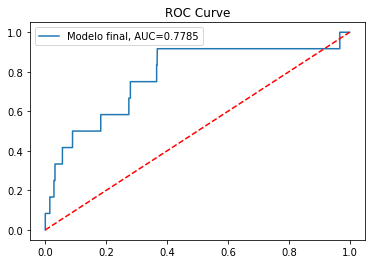

In [93]:
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)

plt.plot(fpr,tpr,label="Modelo final, AUC="+str(round(roc_auc,4)))

plt.title("ROC Curve")
plt.legend()
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)", color = 'red')
plt.show()

In [99]:
y_pred = modelo_final.predict_proba(X_test_pca_selected)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)

y_pred_bin = (modelo_final.predict_proba(X_test_pca_selected)[:, 1] > 0.2).astype(int)
print(classification_report(y_test, y_pred_bin))
print(confusion_matrix(y_test, y_pred_bin))
print("Recall score: ", recall_score(y_test, y_pred_bin))
print("ROC AUC score: ", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      5839
           1       0.01      0.58      0.01        12

    accuracy                           0.78      5851
   macro avg       0.50      0.68      0.44      5851
weighted avg       1.00      0.78      0.88      5851

[[4581 1258]
 [   5    7]]
Recall score:  0.5833333333333334
ROC AUC score:  0.7784723411543072


In [110]:
df_salida = pd.DataFrame(y_pred, columns = ['Probabilidad'])

In [127]:
def final_Control(prob):
    if prob > 0.5:
        return 'Rojo', 3
    elif prob > 0.2:
        return 'Amarillo', 2
    else:
        return 'Verde', 1
    
df_salida['Control'] = [final_Control(i)[0] for i in df_salida['Probabilidad']]
df_salida['Color control'] = [final_Control(i)[1] for i in df_salida['Probabilidad']]
df_salida['Clase Real'] = y_test.tolist()

In [128]:
df_salida.head()

,Probabilidad,Control,Clase Real,Color control
0,0.524853,Rojo,0,3
1,0.094087,Verde,0,1
2,0.027570,Verde,0,1
3,0.083261,Verde,0,1
4,0.017643,Verde,0,1


In [129]:
df_salida.groupby(['Clase Real'])['Clase Real'].count()
df_salida.groupby(['Control'])['Clase Real'].count()

Control
Amarillo    1020
Rojo         245
Verde       4586
Name: Clase Real, dtype: int64

In [130]:
print(confusion_matrix(df_salida['Clase Real'], df_salida['Color control']))

[[   0 4581 1017  241]
 [   0    5    3    4]
 [   0    0    0    0]
 [   0    0    0    0]]
